In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

pd.set_option('display.max_columns', None)

86400 24 3600


The only plot function  left here, all other plotting functions related to the simulations are placed in the ```Simulation``` class of the ```simulation_core.py```

In [2]:
def plot_mints(mitigated_mints: pd.DataFrame, pure_mints: pd.DataFrame, pool_name: str, width: int=10, height: int=10):
    """plot red line of original mints and blue dots of mitigated ones

    Args:
        mitigated_mints (pd.DataFrame): dataset of mitigated mints
        pure_mints (pd.DataFrame): pure dataset of mints without mitigation
        width (int, optional): width. Defaults to 10.
        height (int, optional): height. Defaults to 10.
    """
    fig, ax = plt.subplots(figsize=(width, height))
    ax2 = ax.twinx()

    ax.plot(pd.to_datetime(pure_mints.timestamp, unit='s'), pure_mints.Y_amount, c='red', label='mitigation off')
    ax2.plot_date(pd.to_datetime(mitigated_mints.timestamp, unit='s'), mitigated_mints.Y_amount, linestyle='--', c='blue', label='mitigation on')

    ax.set_title(f'Scatterplot of the mints for {pool_name} pool')
    plt.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('Y token amount')
    ax2.set_ylabel('Y token mitigated amount')
    fig.autofmt_xdate(rotation=25)
    ax.grid(True, linestyle='--')

    plt.show()

Setting up the simulations parameters, with identifying their paths

**cell below is executed ONLY ONCE BECAUSE OF FOUND MINTS TABLE ERROR**

In some unique cases pools set pairs in unexpected order of tokens, meaning that all mints and burns will differ from expected format and therefore it is required to set them back into expected order. Unexpected order can be found if during simulations most of the transactions are blocked by ```NOT_ENOUGH_RESERVES``` status.

In [14]:
# mints_df = pd.read_pickle(f'{os.getcwd()}\data\pair_history\LADY_WETH\lady_weth_mints.pkl')
# lady_series = mints_df.amount1.copy()   # copy placed, because otherwise reference is placed
# weth_series = mints_df.amount0.copy()
# mints_df.amount0 = lady_series
# mints_df.amount1 = weth_series
# mints_df.to_pickle(f'{os.getcwd()}\data\pair_history\LADY_WETH\lady_weth_mints.pkl')

# mints_df = pd.read_pickle(fr'{os.getcwd()}\data\pair_history\NFD_WETH\nfd_weth_mints.pkl')
# nfd_series = mints_df.amount0.copy()   # copy placed, because otherwise reference is placed
# weth_series = mints_df.amount1.copy()
# mints_df.amount1 = nfd_series
# mints_df.amount0 = weth_series
# mints_df.to_pickle(fr"{os.getcwd()}\data\pair_history\NFD_WETH\nfd_weth_mints.pkl")
# mints_df

# mints_df = pd.read_pickle(fr'{os.getcwd()}\data\pair_history\ACAB_WETH\acab_weth_mints.pkl')
# acab_series = mints_df.amount1.copy()   # copy placed, because otherwise reference is placed
# weth_series = mints_df.amount0.copy()
# mints_df.amount1 = acab_series
# mints_df.amount0 = weth_series
# mints_df.to_pickle(fr"{os.getcwd()}\data\pair_history\ACAB_WETH\acab_weth_mints.pkl")
# mints_df

amount0  amount1    amountUSD     liquidity           timestamp
0  75000000.0      5.0  22986.34757  19364.916731 2021-11-30 18:12:21

Each pool has its simulation parameters required to be set up in order to perform correct reading of the pickle files and where to save all simulation results.

In [6]:
acab_weth_sim = Simulation(experiment_id=1, x_name='ACAB', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
cat_weth_sim = Simulation(experiment_id=2, x_name='CAT', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
dog_weth_sim = Simulation(experiment_id=3, x_name='DOG', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
lady_weth_sim = Simulation(experiment_id=4, x_name='LADY', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_')
nfd_weth_sim = Simulation(experiment_id=5, x_name='NFD', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_', x_index='0', y_index='1')
tiara_weth_sim = Simulation(experiment_id=6, x_name='$TIARA', y_name='WETH', window_size=24,
                          base_dir=fr'{os.getcwd()}\data\real_transactions\experiment_', x_index='1', y_index='0')

**IMPORTANT: launch those simulations only if there are no data in package ```data/real_transactions```, otherwise skip this part** 

In [16]:
# # running the simulations through the data
# acab_weth_sim.run_simulation(False, True)
# cat_weth_sim.run_simulation(False, True)
# dog_weth_sim.run_simulation(True, True)
# lady_weth_sim.run_simulation(False, True)
# nfd_weth_sim.run_simulation(True, True)
# tiara_weth_sim.run_simulation(True, True)

17it [00:00, 154.99it/s]

86400 3600 24
mints:  1



17it [00:00, 142.26it/s]

86400 3600 24
mints:  1


Read simulation results into different dataframes considiring their flags (mitigation enabled/disabled)

In [17]:
# ACAB/WETH
acab_weth_swaps_mitigation_off_df, acab_weth_mints_mitigation_off_df, acab_weth_burns_mitigation_off_df = acab_weth_sim.read_simulation(0)
acab_weth_swaps_mitigation_on_df, acab_weth_mints_mitigation_on_df, acab_weth_burns_mitigation_on_df = acab_weth_sim.read_simulation(1)

# CAT/WETH
cat_weth_swaps_mitigation_off_df, cat_weth_mints_mitigation_off_df, cat_weth_burns_mitigation_off_df = cat_weth_sim.read_simulation(0)
cat_weth_swaps_mitigation_on_df, cat_weth_mints_mitigation_on_df, cat_weth_burns_mitigation_on_df = cat_weth_sim.read_simulation(1)

# DOG/WETH
dog_weth_swaps_mitigation_off_df, dog_weth_mints_mitigation_off_df, dog_weth_burns_mitigation_off_df = dog_weth_sim.read_simulation(0)
dog_weth_swaps_mitigation_on_df, dog_weth_mints_mitigation_on_df, dog_weth_burns_mitigation_on_df = dog_weth_sim.read_simulation(1)

# LADY/WETH
lady_weth_swaps_mitigation_off_df, lady_weth_mints_mitigation_off_df, lady_weth_burns_mitigation_off_df = lady_weth_sim.read_simulation(0)
lady_weth_swaps_mitigation_on_df, lady_weth_mints_mitigation_on_df, lady_weth_burns_mitigation_on_df = lady_weth_sim.read_simulation(1)

# NFD/WETH
nfd_weth_swaps_mitigation_off_df, nfd_weth_mints_mitigation_off_df, nfd_weth_burns_mitigation_off_df = nfd_weth_sim.read_simulation(0)
nfd_weth_swaps_mitigation_on_df, nfd_weth_mints_mitigation_on_df, nfd_weth_burns_mitigation_on_df = nfd_weth_sim.read_simulation(1)

# TIARA/WETH
tiara_weth_swaps_mitigation_off_df, tiara_weth_mints_mitigation_off_df, tiara_weth_burns_mitigation_off_df = tiara_weth_sim.read_simulation(0)
tiara_weth_swaps_mitigation_on_df, tiara_weth_mints_mitigation_on_df, tiara_weth_burns_mitigation_on_df = tiara_weth_sim.read_simulation(1)

# ACAB/WETH pool

ACAB/WETH pool contains only 16 transactions. Considering small time covered by those transactions it is possible that further there will be more transactions, but currently pool has too low activity and it is not possible to perform efficient analysis, considering that there is no interest from both traders and attackers.

In [18]:
acab_weth_filtered_swaps_df, acab_weth_mevs_df = acab_weth_sim.extract_filtered_and_mevs_dfs()

initial len = 16, filtered len = 16
txds = 0
out values = 0


In [19]:
acab_weth_swaps_mitigation_on_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0    1     WETH      ACAB     1.084038e+00                   0.0   
1    2     WETH      ACAB     2.167916e-01                   0.0   
2    3     WETH      ACAB     1.062972e-02                   0.0   
3    4     WETH      ACAB     1.900000e-02                   0.0   
4    5     ACAB      WETH     2.115711e+06                   0.0   
5    6     ACAB      WETH     1.773775e+05                   0.0   
6    7     ACAB      WETH     1.333034e+07                   0.0   
7    8     WETH      ACAB     1.000000e-01                   0.0   
8    9     WETH      ACAB     2.000000e-02                   0.0   
9   10     WETH      ACAB     8.200000e-01                   0.0   
10  11     WETH      ACAB     2.100000e-01                   0.0   
11  12     WETH      ACAB     8.652945e-02                   0.0   
12  13     ACAB      WETH     8.415058e+05                   0.0   
13  14     WETH      ACAB     1.025983e-02                   0.0   
14  15     WETH      ACAB     2.200000e-03                   0.0   

    token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0       1.325329e+07    0.004336    CANT_CONSULT_ORACLE                NaN   
1       2.105437e+06    0.000867                CHECKED       2.201781e+06   
2       9.952673e+04    0.000043                CHECKED       1.031193e+05   
3       1.770713e+05    0.000076                CHECKED       1.832825e+05   
4       2.155631e-01    0.000862                CHECKED       2.240164e-01   
5       1.739835e-02    0.000070                CHECKED       1.796492e-02   
6       1.073898e+00         NaN                CHECKED       1.323824e+00   
7       9.860869e+05    0.000400                CHECKED       1.010041e+06   
8       1.934259e+05    0.000080    CANT_CONSULT_ORACLE                NaN   
9       6.991213e+06    0.003280                CHECKED       7.984873e+06   
10      1.536885e+06    0.000840                CHECKED       1.598336e+06   
11      6.077682e+05    0.000346                CHECKED       6.211744e+05   
12      1.169243e-01    0.000468                CHECKED       1.200217e-01   
13      7.345815e+04    0.000041                CHECKED       7.211273e+04   
14      1.572446e+04    0.000009                CHECKED       1.592056e+04   

    out_amount_diff  slice_factor  slice_factor_curve  \
0               NaN           NaN                 NaN   
1               4.0           4.0                 8.0   
2               3.0           1.0                 1.0   
3               3.0           1.0                 1.0   
4               3.0           4.0                 8.0   
5               3.0           1.0                 1.0   
6              20.0          22.0                88.0   
7               2.0           2.0                 2.0   
8               NaN           NaN                 NaN   
9              13.0          14.0                42.0   
10              3.0           3.0                 3.0   
11              2.0           2.0                 2.0   
12              2.0           2.0                 2.0   
13              1.0           1.0                 1.0   
14              1.0           1.0                 1.0   

                              status  block_number     block_timestamp  \
0                            SUCCESS           5.0 2021-11-30 18:13:36   
1                            SUCCESS          15.0 2021-11-30 18:16:06   
2                            SUCCESS          35.0 2021-11-30 18:21:06   
3                            SUCCESS          43.0 2021-11-30 18:23:06   
4                            SUCCESS         164.0 2021-11-30 18:53:21   
5                            SUCCESS         545.0 2021-11-30 20:28:36   
6   BLOCKED_BY_VOLATILITY_MITIGATION        2601.0 2021-12-01 05:02:36   
7                            SUCCESS        5898.0 2021-12-01 18:46:51   
8                            SUCCESS       33174.0 2021-12-06 12:25:51   
9            

In [20]:
acab_weth_swaps_mitigation_on_df[acab_weth_swaps_mitigation_on_df.status == 'NOT_ENOUGH_RESERVES']

Empty DataFrame
Columns: [id, token_in, token_out, token_in_amount, token_out_amount_min, token_out_amount, system_fee, mitigator_check_status, oracle_amount_out, out_amount_diff, slice_factor, slice_factor_curve, status, block_number, block_timestamp, transaction_timestamp, txd, sender, to, transaction_id, reserve_X_before, reserve_Y_before, k_before, price_X_cumulative_before, price_Y_cumulative_before, is_volatility_mitigator_on_before, reserve_X, reserve_Y, k, price_X_cumulative, price_Y_cumulative, is_volatility_mitigator_on, X_price, price_diff]
Index: []

There are only 4 cases of not enough reserves to perform transactions. All other transactions are successful ones.

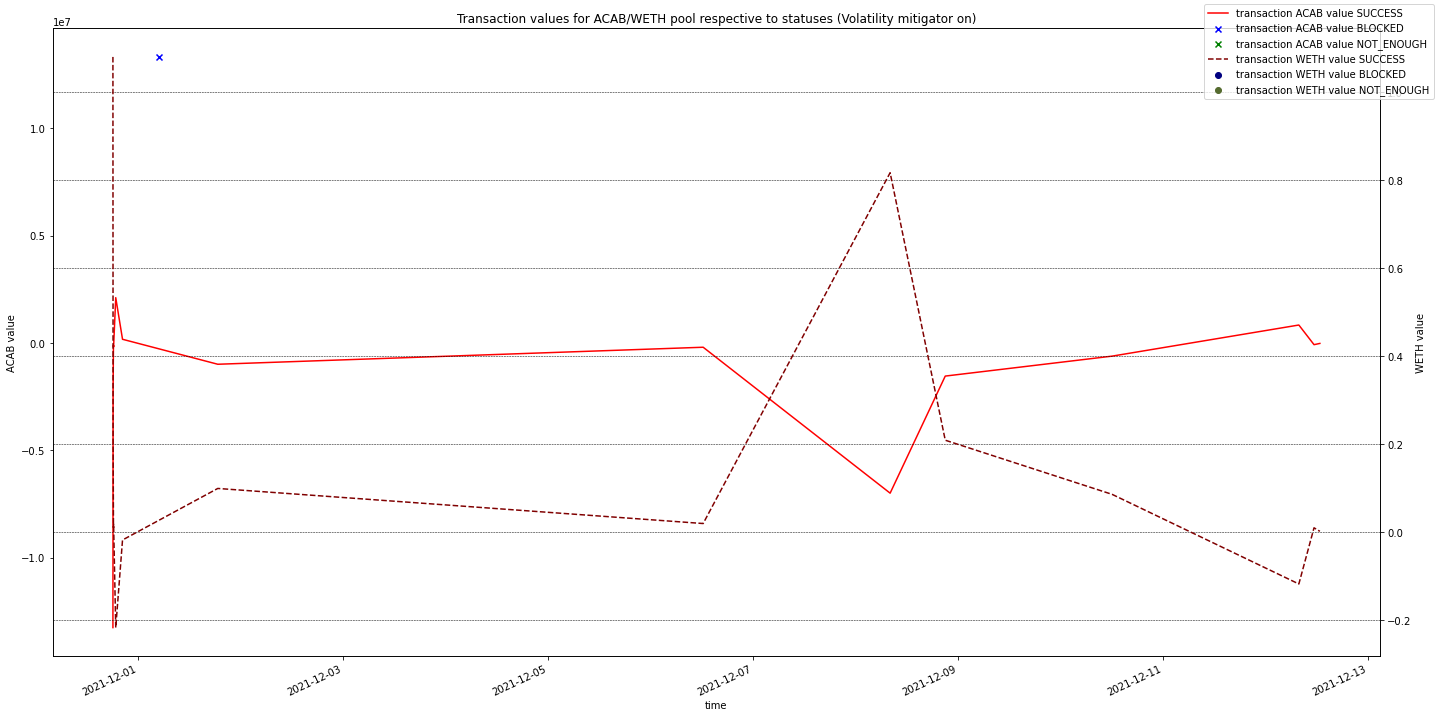

In [23]:
acab_weth_sim.plot_transactions_by_type(acab_weth_swaps_mitigation_on_df, ignore_success=False, width=20, height=10, separate_plots=False)

Original ACAB/WETH pool has next statuses counts:
SUCCESS    15
Name: status, dtype: int64
Mitigated ACAB/WETH dataframe has next statuses counts:
SUCCESS                             14
BLOCKED_BY_VOLATILITY_MITIGATION     1
Name: status, dtype: int64
TWAP unavailability ratio for ACAB/WETH is 0.13333333333333333
Mitigated ACAB/WETH dataframe has next Mitigator statuses:
CHECKED                13
CANT_CONSULT_ORACLE     2
Name: mitigator_check_status, dtype: int64


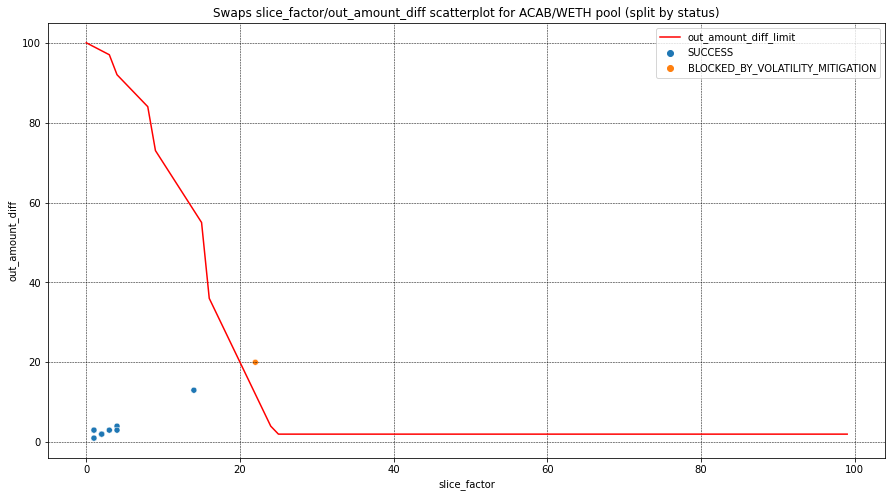

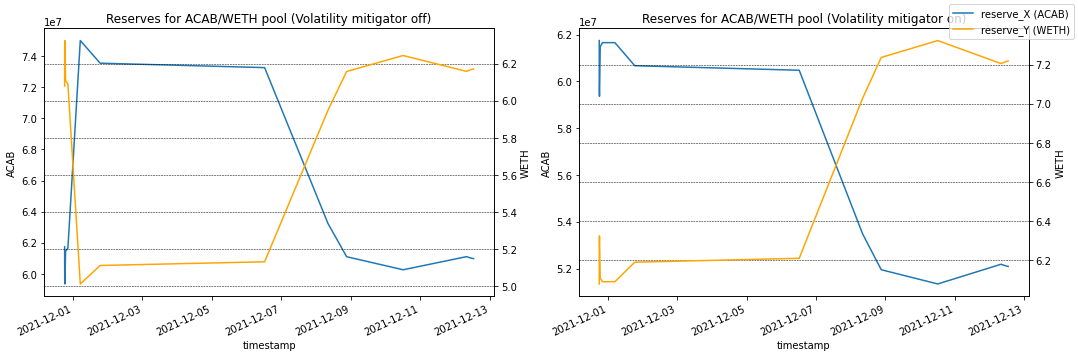

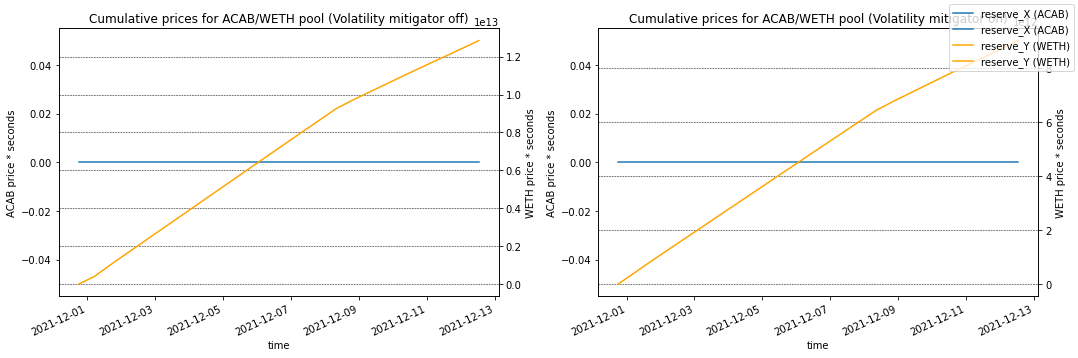

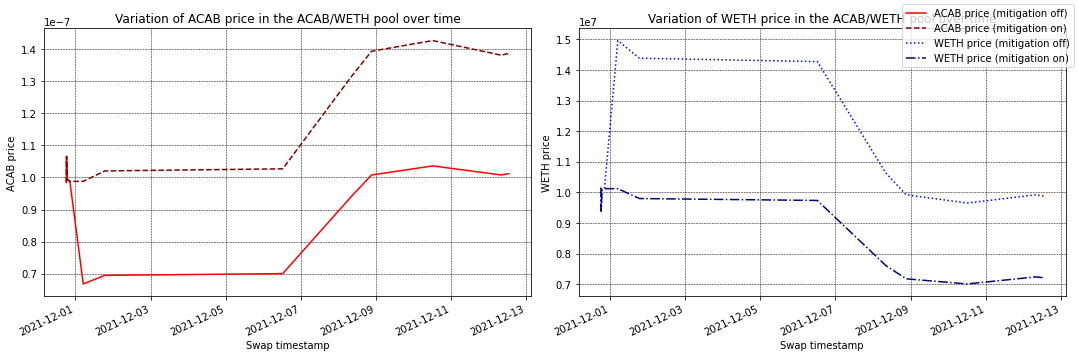

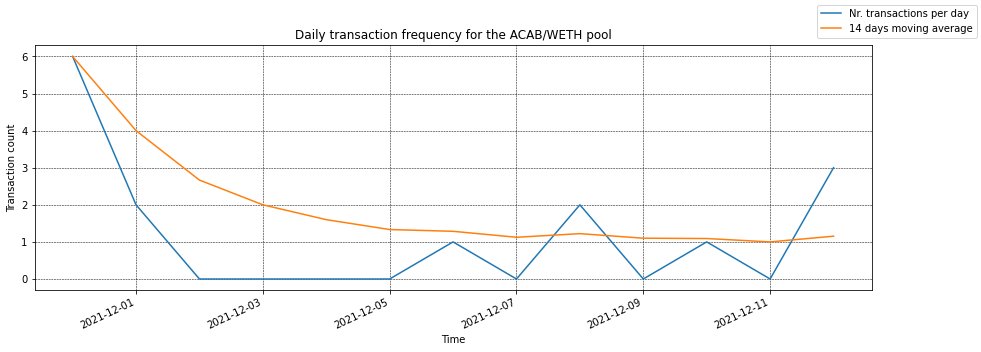

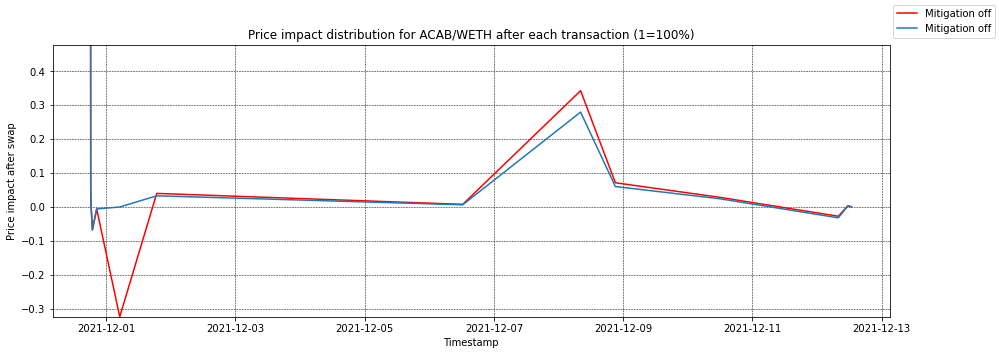

In [22]:
acab_weth_sim.show_mitigation_comparison(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.px_hist_blocked_transactions_slice(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.px_hist_blocked_transactions_difference_from_oracle(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_slice_distribution_and_diff_limit_line(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_reserves_with_and_without_mitigation(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_cumulative_prices_with_and_without_mitigation(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_price_distribution(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df, separate_plots=True)
acab_weth_sim.plot_frequency_distribution(acab_weth_swaps_mitigation_on_df)
acab_weth_sim.plot_price_impact(acab_weth_swaps_mitigation_off_df, acab_weth_swaps_mitigation_on_df, 
                                smallest_y=acab_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=acab_weth_swaps_mitigation_off_df['price_diff'].max())

amount of available mints without mitigation 1
amount of available records in mitigated dataset 1


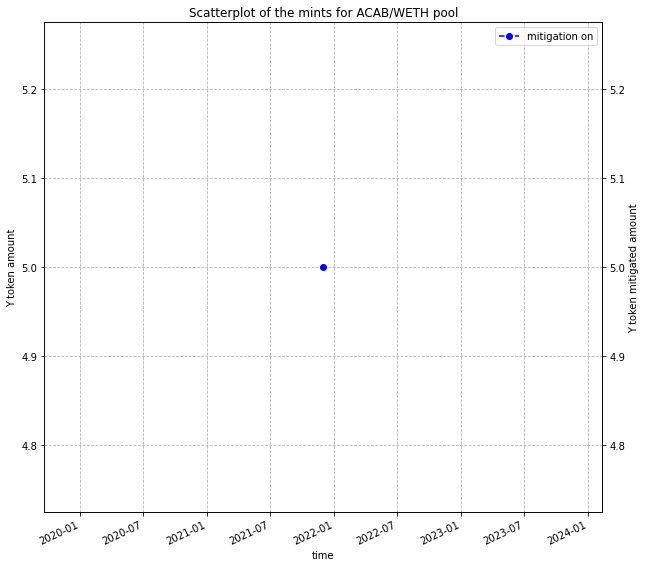

In [24]:
print(f"amount of available mints without mitigation {len(acab_weth_mints_mitigation_off_df)}")
print(f"amount of available records in mitigated dataset {len(acab_weth_mints_mitigation_on_df)}")

plot_mints(acab_weth_mints_mitigation_on_df, acab_weth_mints_mitigation_off_df, pool_name='ACAB/WETH')

Line is covered by the presented dot, meaning that mints are the same in mitigated and non mitigated datasets.

In [25]:
acab_weth_swaps_mitigation_on_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0    1     WETH      ACAB     1.084038e+00                   0.0   
1    2     WETH      ACAB     2.167916e-01                   0.0   
2    3     WETH      ACAB     1.062972e-02                   0.0   
3    4     WETH      ACAB     1.900000e-02                   0.0   
4    5     ACAB      WETH     2.115711e+06                   0.0   
5    6     ACAB      WETH     1.773775e+05                   0.0   
6    7     ACAB      WETH     1.333034e+07                   0.0   
7    8     WETH      ACAB     1.000000e-01                   0.0   
8    9     WETH      ACAB     2.000000e-02                   0.0   
9   10     WETH      ACAB     8.200000e-01                   0.0   
10  11     WETH      ACAB     2.100000e-01                   0.0   
11  12     WETH      ACAB     8.652945e-02                   0.0   
12  13     ACAB      WETH     8.415058e+05                   0.0   
13  14     WETH      ACAB     1.025983e-02                   0.0   
14  15     WETH      ACAB     2.200000e-03                   0.0   

    token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0       1.325329e+07    0.004336    CANT_CONSULT_ORACLE                NaN   
1       2.105437e+06    0.000867                CHECKED       2.201781e+06   
2       9.952673e+04    0.000043                CHECKED       1.031193e+05   
3       1.770713e+05    0.000076                CHECKED       1.832825e+05   
4       2.155631e-01    0.000862                CHECKED       2.240164e-01   
5       1.739835e-02    0.000070                CHECKED       1.796492e-02   
6       1.073898e+00         NaN                CHECKED       1.323824e+00   
7       9.860869e+05    0.000400                CHECKED       1.010041e+06   
8       1.934259e+05    0.000080    CANT_CONSULT_ORACLE                NaN   
9       6.991213e+06    0.003280                CHECKED       7.984873e+06   
10      1.536885e+06    0.000840                CHECKED       1.598336e+06   
11      6.077682e+05    0.000346                CHECKED       6.211744e+05   
12      1.169243e-01    0.000468                CHECKED       1.200217e-01   
13      7.345815e+04    0.000041                CHECKED       7.211273e+04   
14      1.572446e+04    0.000009                CHECKED       1.592056e+04   

    out_amount_diff  slice_factor  slice_factor_curve  \
0               NaN           NaN                 NaN   
1               4.0           4.0                 8.0   
2               3.0           1.0                 1.0   
3               3.0           1.0                 1.0   
4               3.0           4.0                 8.0   
5               3.0           1.0                 1.0   
6              20.0          22.0                88.0   
7               2.0           2.0                 2.0   
8               NaN           NaN                 NaN   
9              13.0          14.0                42.0   
10              3.0           3.0                 3.0   
11              2.0           2.0                 2.0   
12              2.0           2.0                 2.0   
13              1.0           1.0                 1.0   
14              1.0           1.0                 1.0   

                              status  block_number     block_timestamp  \
0                            SUCCESS           5.0 2021-11-30 18:13:36   
1                            SUCCESS          15.0 2021-11-30 18:16:06   
2                            SUCCESS          35.0 2021-11-30 18:21:06   
3                            SUCCESS          43.0 2021-11-30 18:23:06   
4                            SUCCESS         164.0 2021-11-30 18:53:21   
5                            SUCCESS         545.0 2021-11-30 20:28:36   
6   BLOCKED_BY_VOLATILITY_MITIGATION        2601.0 2021-12-01 05:02:36   
7                            SUCCESS        5898.0 2021-12-01 18:46:51   
8                            SUCCESS       33174.0 2021-12-06 12:25:51   
9            

It is not possible to extract any useful data about ACAB/WETH pool.

# CAT/WETH pool

The problem behind this pool is that there are only 45 transactions performed between October 2021 and November 2021. Even with this situation there are only 6 transactions when simulation was not able to consult with Oracle.

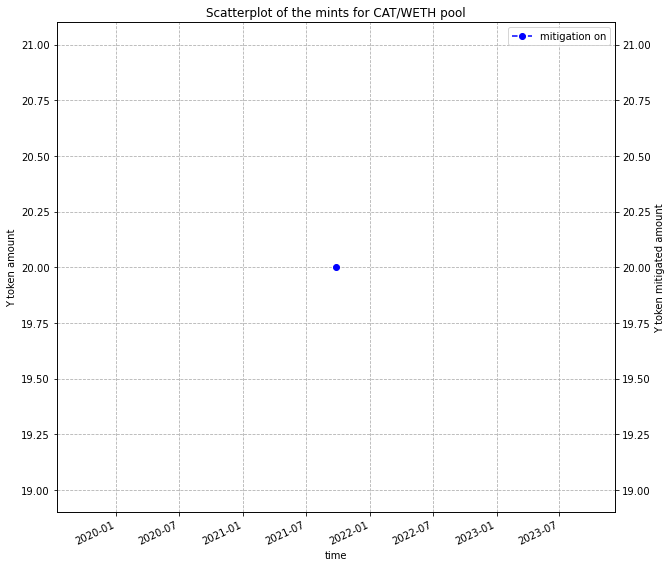

In [26]:
plot_mints(cat_weth_mints_mitigation_on_df, cat_weth_mints_mitigation_off_df, pool_name='CAT/WETH')

In [27]:
cat_weth_filtered_swaps_df, cat_weth_mevs_df = cat_weth_sim.extract_filtered_and_mevs_dfs()

initial len = 46, filtered len = 46
txds = 0
out values = 0


Distribution shape is convex, causing a bi-directional activity present in the pool demonstrating possible further pool popularity and start of active lifecycle. 

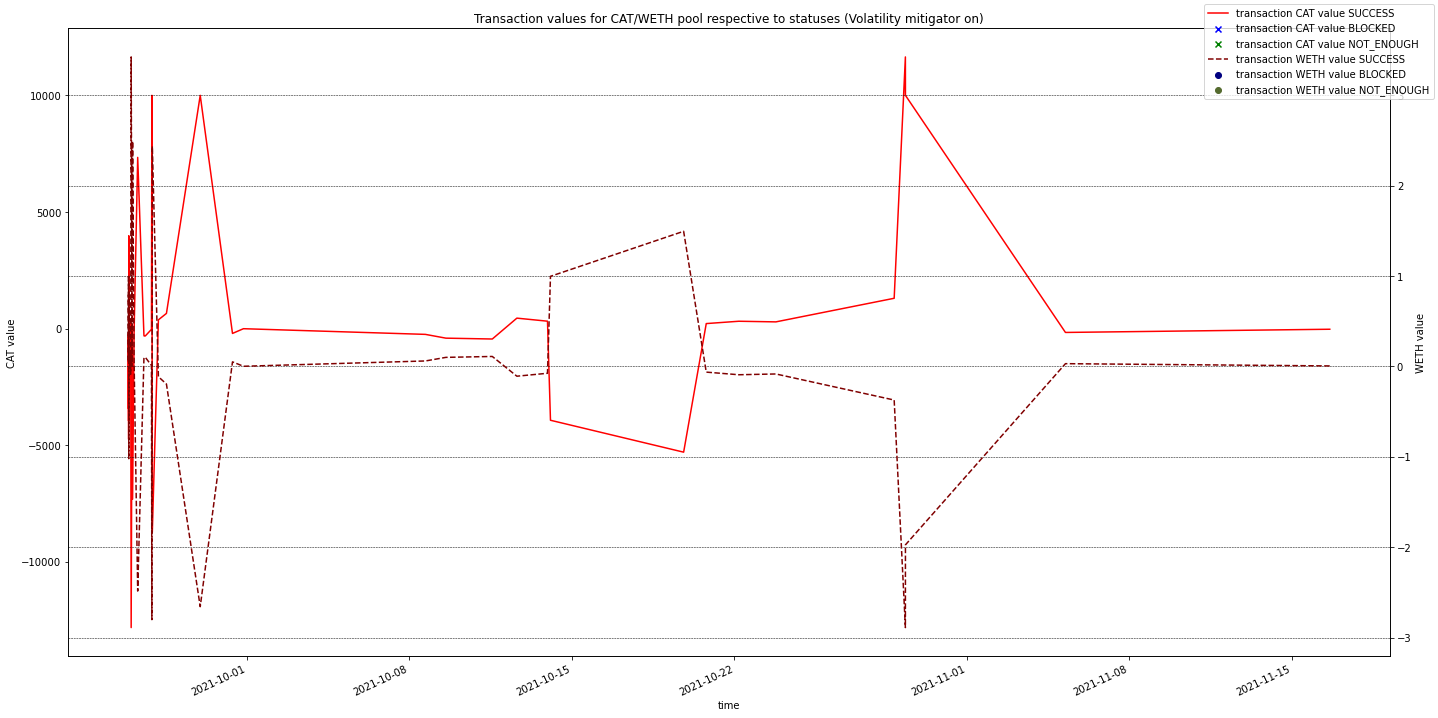

In [28]:
cat_weth_sim.plot_transactions_by_type(cat_weth_swaps_mitigation_on_df, ignore_success=False, width=20, height=10)

There are no blocked transactions, meaning that there were no MEVs registered.

Original CAT/WETH pool has next statuses counts:
SUCCESS    45
Name: status, dtype: int64
Mitigated CAT/WETH dataframe has next statuses counts:
SUCCESS    45
Name: status, dtype: int64
TWAP unavailability ratio for CAT/WETH is 0.13333333333333333
Mitigated CAT/WETH dataframe has next Mitigator statuses:
CHECKED                39
CANT_CONSULT_ORACLE     6
Name: mitigator_check_status, dtype: int64


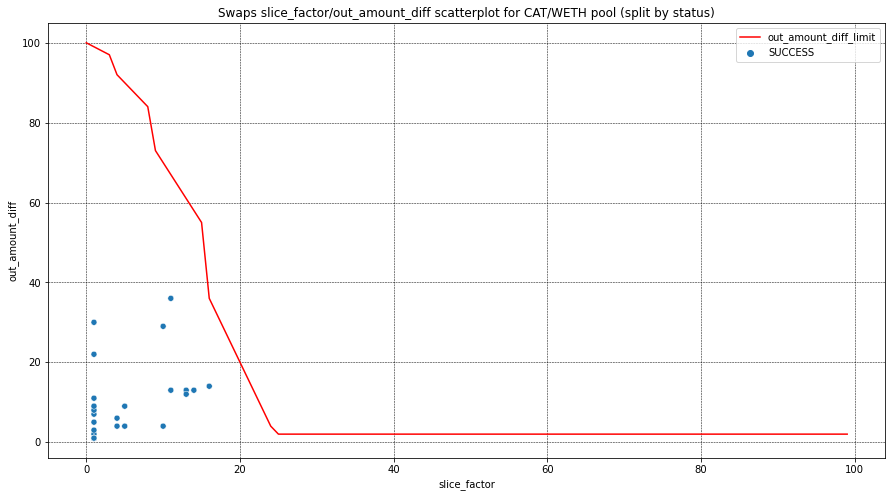

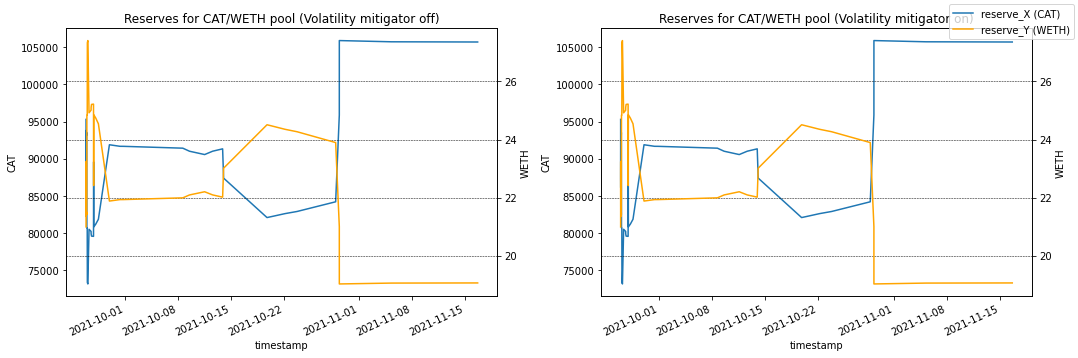

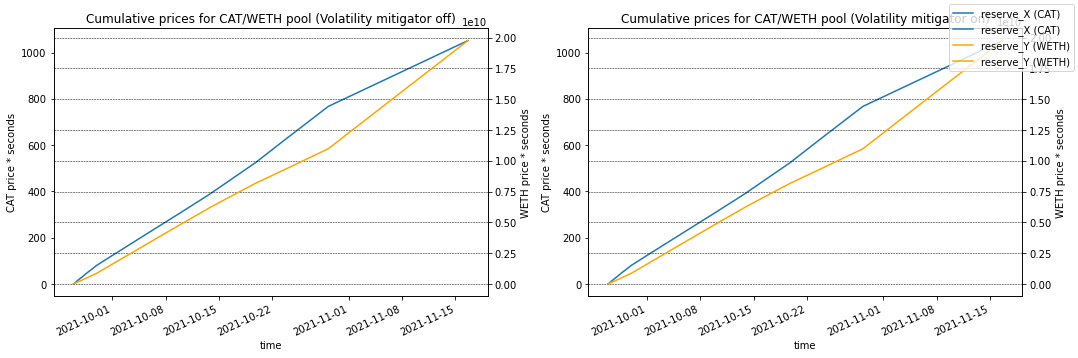

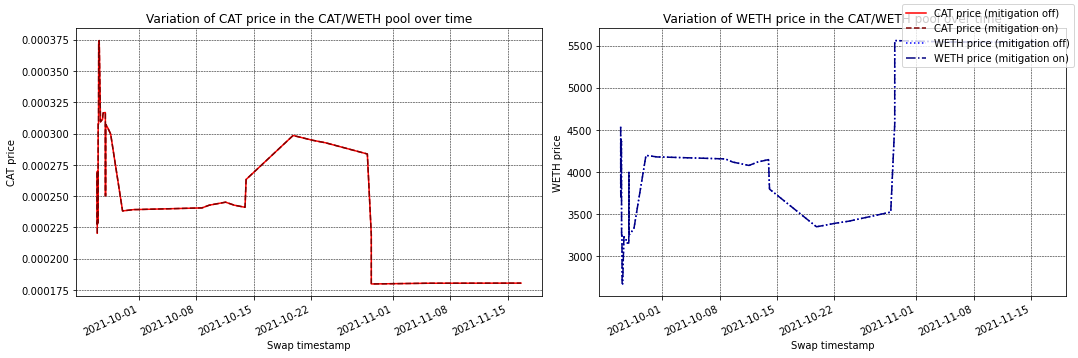

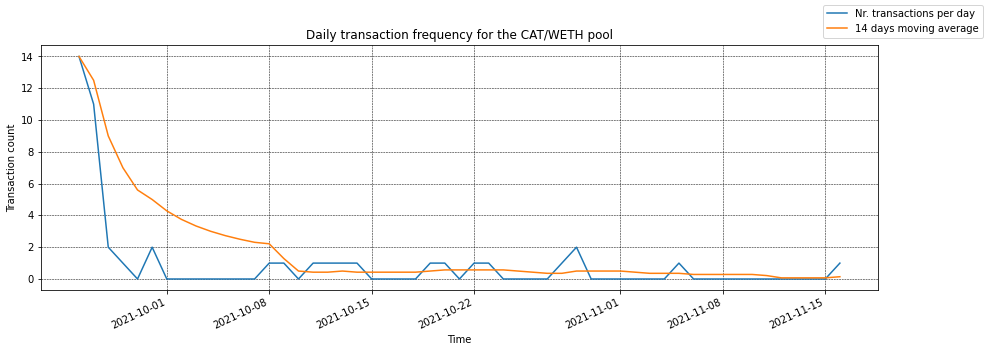

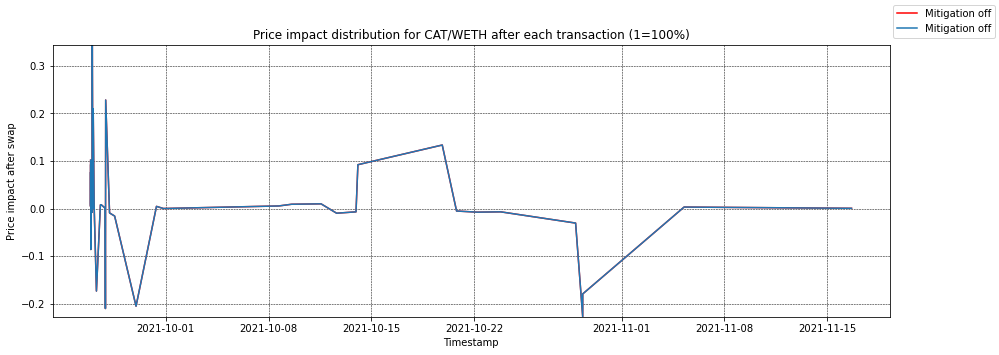

In [29]:
cat_weth_sim.show_mitigation_comparison(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df)
cat_weth_sim.px_hist_blocked_transactions_slice(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.px_hist_blocked_transactions_difference_from_oracle(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_slice_distribution_and_diff_limit_line(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_reserves_with_and_without_mitigation(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_cumulative_prices_with_and_without_mitigation(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_off_df)
cat_weth_sim.plot_price_distribution(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df, separate_plots=True)
cat_weth_sim.plot_frequency_distribution(cat_weth_swaps_mitigation_on_df)
cat_weth_sim.plot_price_impact(cat_weth_swaps_mitigation_off_df, cat_weth_swaps_mitigation_on_df, 
                                smallest_y=cat_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=cat_weth_swaps_mitigation_off_df['price_diff'].max())

# DOG/WETH

In the current pool out of all 18559 transactions there is only one transaction blocked with strange values of incoming and outcoming tokens and only 2 transactions when algorithm was not able to consult Oracle.

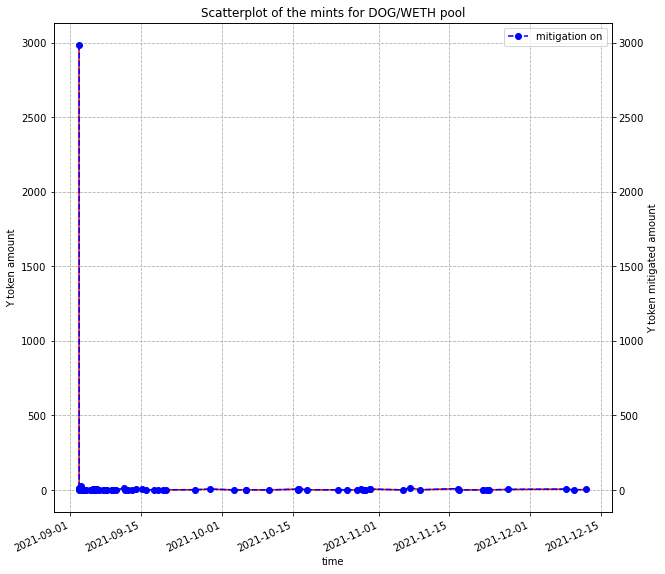

In [30]:
plot_mints(dog_weth_mints_mitigation_on_df, dog_weth_mints_mitigation_off_df, pool_name='DOG/WETH')

The first mint has high WETH token amount, all mints after which are too small to perform efficient plotting.

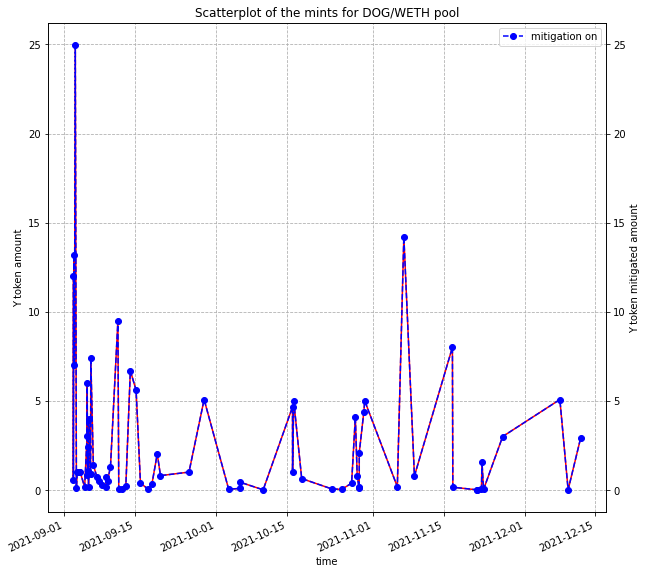

In [31]:
plot_mints(dog_weth_mints_mitigation_on_df.iloc[1:], dog_weth_mints_mitigation_off_df.iloc[1:], pool_name='DOG/WETH')

In [32]:
dog_weth_mints_mitigation_on_df

id      X_amount     Y_amount   timestamp   status  block_number  \
0       0  8.484848e+08  2985.000000  1630609119  SUCCESS             0   
1     145  2.553574e+06    12.000000  1630610037  SUCCESS            62   
2     252  1.131458e+05     0.573058  1630610634  SUCCESS           101   
3     937  2.839083e+06    13.204380  1630617757  SUCCESS           576   
4    1468  1.131999e+06     7.000000  1630628195  SUCCESS          1272   
..    ...           ...          ...         ...      ...           ...   
70  17080  5.454372e+03     0.024963  1637616434  SUCCESS        467155   
71  17583  9.115207e+05     2.993934  1637942884  SUCCESS        488918   
72  18232  2.000000e+06     5.070682  1638919836  SUCCESS        554048   
73  18289  1.584900e+03     0.003875  1639060852  SUCCESS        563449   
74  18452  1.487774e+06     2.900000  1639273935  SUCCESS        577655   

    block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0        1630609119             1630609119               0      0.000000e+00   
1        1630610049             1630610037             145      7.375062e+08   
2        1630610634             1630610634             252      7.102555e+08   
3        1630617759             1630617757             937      7.425601e+08   
4        1630628199             1630628195            1468      6.466771e+08   
..              ...                    ...             ...               ...   
70       1637616444             1637616434           17080      8.231838e+08   
71       1637942889             1637942884           17583      9.761662e+08   
72       1638919839             1638919836           18232      1.111557e+09   
73       1639060854             1639060852           18289      1.129705e+09   
74       1639273944             1639273935           18452      6.624406e+08   

    reserve_Y_before      k_before  price_X_cumulative_before  \
0           0.000000  0.000000e+00                          0   
1        3441.823575  2.538366e+12                          0   
2        3603.148206  2.559156e+12                          0   
3        3484.085008  2.587142e+12                          0   
4        4023.391341  2.601835e+12                          0   
..               ...           ...                        ...   
70       3849.624629  3.168949e+12                         27   
71       3257.983513  3.180333e+12                         28   
72       2869.968493  3.190133e+12                         31   
73       2816.022887  3.181274e+12                         32   
74       1357.807136  8.994666e+11                         32   

    price_Y_cumulative_before  is_volatility_mitigator_on_before  \
0                           0                               True   
1                   220907404                               True   
2                   336903324                               True   
3                  1947781422                               True   
4                  3767095093                               True   
..                        ...                                ...   
70              1999406076676                               True   
71              2082816343279                               True   
72              2390852936774                               True   
73              2445745921965                               True   
74              2536824726862                               True   

       reserve_X    reserve_Y             k  price_X_cumulative  \
0   8.484848e+08  2985.000000  2.532727e+12                   0   
1   7.400598e+08  3453.823575  2.556036e+12                   0   
2   7.103687e+08  3603.721264  2.559971e+12                   0   
3   7.453992e+08  3497.289387  2.606877e+12                   0   
4   6.478091e+08  4030.391341  2.610924e+12                   0   
..           ...          ...           ...                 ...   
70  8.231892e+08  3849.649591  3.168990e+12                  27   
71  9.77077

There are 960 MEV transaction and 480 MEV attacks performed on the pool demonstrating attackers interest in the current pool. Considering amount of all swaps each 19-th or 20-th transaction is connected to the MEV. Amount of MEV attacks gives opportunity to see some patterns in the MEV behavior:

* MEV attack transaction values have either big values for both token sides or big value for one of the sides;
* Attacks are happening in the high-activity periods, meaning that attackers wait for the pool activity rises;
* There is rise of MEV transactions with rise of swaps, meaning that amount of attacks depend from amount of swaps, but MEV to swaps ratio distributions do not show direct dependency.

To ensure that those moments are estimated correctly it is required to review another pools with big transaction history.

In [33]:
dog_weth_filtered_swaps_df, dog_weth_mevs_df = dog_weth_sim.extract_filtered_and_mevs_dfs()

initial len = 18560, filtered len = 17600
txds = 960
out values = 480


In [34]:
dog_weth_suspicious_filtered_swaps_df, dog_weth_possible_mevs_df = dog_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 18560, filtered len = 17432
txds = 1128
out values = 564.0


Swaps filtered from MEV transactions and MEV transactions plots.

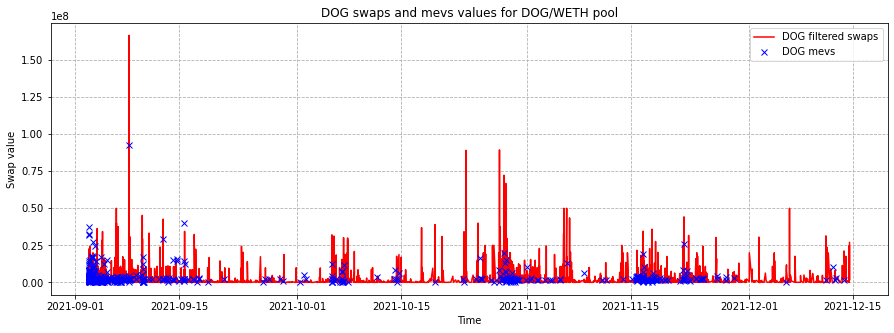

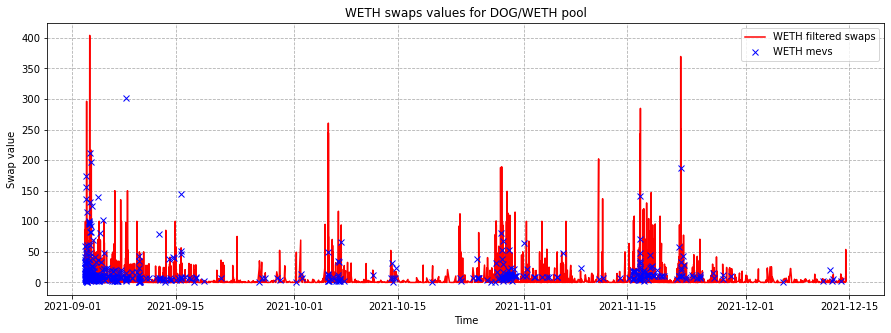

In [35]:
dog_weth_sim.show_swaps_and_mevs_by_token(dog_weth_filtered_swaps_df, dog_weth_mevs_df, width=15, height=5)

Swaps filtered from all suspicious transactions looking like MEV ones, where suspicious transactions form "MEV sandwich" where incoming and outcoming transaction values in one block have difference smaller than 5%.

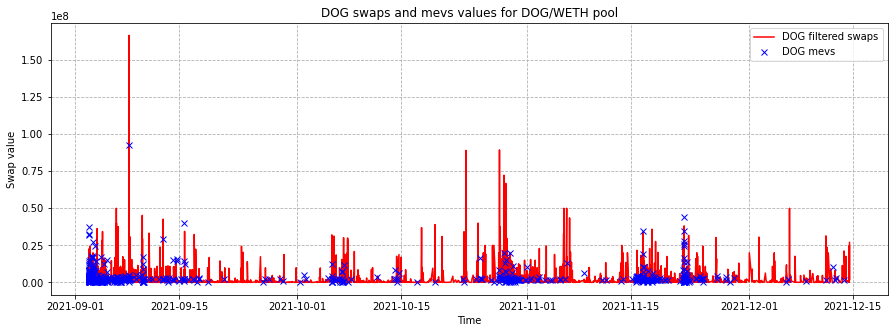

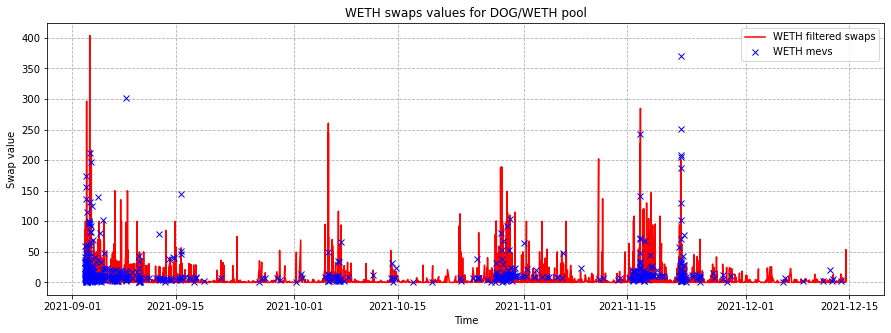

In [36]:
dog_weth_sim.show_swaps_and_mevs_by_token(dog_weth_suspicious_filtered_swaps_df, dog_weth_possible_mevs_df, width=15, height=5)

MEV transactions count distrubution shape is similar to the swaps count distribution shape.

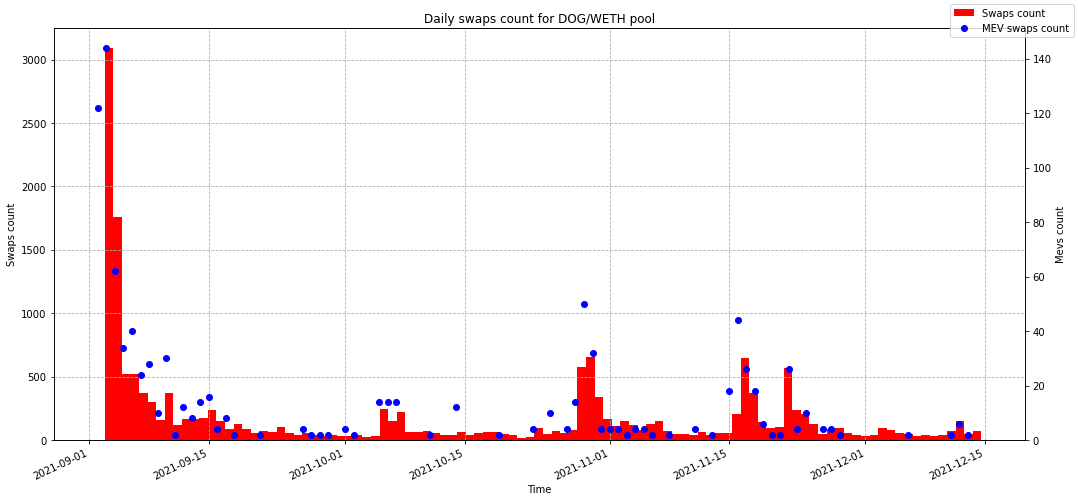

In [37]:
dog_weth_sim.show_swaps_and_mevs_daily_count_by_token(dog_weth_filtered_swaps_df, dog_weth_mevs_df, mevs_alter_axis=True)

Suspicious transactions count distribution has bigger peaks compared to the previous chart.

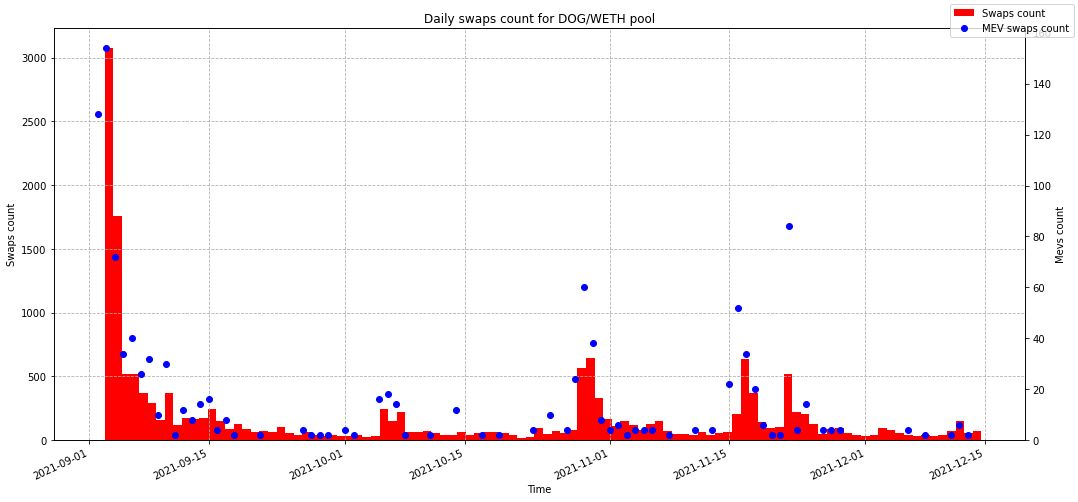

In [38]:
dog_weth_sim.show_swaps_and_mevs_daily_count_by_token(dog_weth_suspicious_filtered_swaps_df, dog_weth_possible_mevs_df, mevs_alter_axis=True)

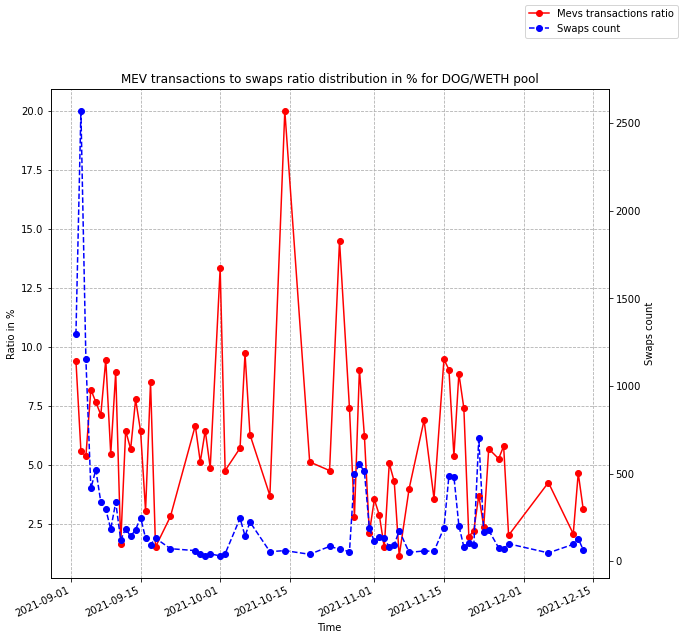

In [39]:
dog_weth_sim.show_mevs_to_swaps_ratio(dog_weth_filtered_swaps_df, dog_weth_mevs_df)

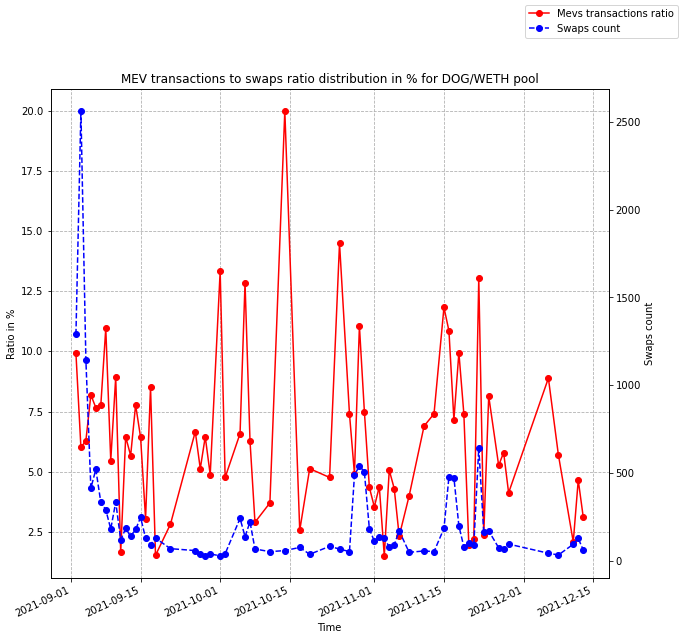

In [40]:
dog_weth_sim.show_mevs_to_swaps_ratio(dog_weth_suspicious_filtered_swaps_df, dog_weth_possible_mevs_df)

In [41]:
dog_weth_mevs_df

token_in token_out     amount_in    amount_out     amount_usd  \
8         WETH       DOG  4.107820e+01  1.145766e+07  154975.938652   
9          DOG      WETH  1.145766e+07  4.118914e+01  155425.647200   
49         DOG      WETH  6.417723e+06  2.436087e+01   91896.269596   
50        WETH       DOG  2.420991e+01  6.417723e+06   91326.803139   
70        WETH       DOG  7.970386e+00  2.039068e+06   30078.067533   
...        ...       ...           ...           ...            ...   
18430     WETH       DOG  2.802026e+00  1.450873e+06   11313.734501   
18434      DOG      WETH  3.062890e+06  6.008031e+00   24458.215681   
18436     WETH       DOG  5.944225e+00  3.062890e+06   24198.465549   
18513      DOG      WETH  1.652450e+06  2.806694e+00   10522.167438   
18514     WETH       DOG  2.766868e+00  1.652450e+06   10372.860403   

                timestamp                                      sender  \
8     2021-09-02 18:59:30  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
9     2021-09-02 18:59:30  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
49    2021-09-02 19:04:21  0x000000000027d2efc283613d0c3e24a8b430c4d8   
50    2021-09-02 19:04:21  0x000000000027d2efc283613d0c3e24a8b430c4d8   
70    2021-09-02 19:06:48  0x1315c6c26123383a2eb369a53fb72c4b9f227eec   
...                   ...                                         ...   
18430 2021-12-12 14:55:23  0xc1dfd16259c2530e57aea8a2cf106db5671616b0   
18434 2021-12-12 17:40:29  0x0000000000d41c96294ccdac8612bdfe29c641af   
18436 2021-12-12 17:40:29  0x0000000000d41c96294ccdac8612bdfe29c641af   
18513 2021-12-13 21:36:13  0x000000000035b5e5ad9019092c665357240f594e   
18514 2021-12-13 21:36:13  0x000000000035b5e5ad9019092c665357240f594e   

                                               to  \
8      0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
9      0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   
49     0x000000000027d2efc283613d0c3e24a8b430c4d8   
50     0x000000000027d2efc283613d0c3e24a8b430c4d8   
70     0x1315c6c26123383a2eb369a53fb72c4b9f227eec   
...                                           ...   
18430  0xc1dfd16259c2530e57aea8a2cf106db5671616b0   
18434  0x0000000000d41c96294ccdac8612bdfe29c641af   
18436  0x0000000000d41c96294ccdac8612bdfe29c641af   
18513  0x000000000035b5e5ad9019092c665357240f594e   
18514  0x000000000035b5e5ad9019092c665357240f594e   

                                                     txd  
8      0xcd88b1e53242f1d14bf9c2ccf95e1acd1ff2b542d1e1...  
9      0xe18fc8c20f70b9e5fa7b5753bd962176c2b568a68a89...  
49     0x926094a82c774464036996340b7b8d66b8f017ac7b2a...  
50     0xa0bc8aaf976d870d1bc68b8e1445802c4b4304492298...  
70     0x7837e6086d8a3f443ce4f99f025227bdb82449142fbe...  
...                                                  ...  
18430  0xd17a564bfa8dc63554ea13856e8dc8b8ab6cfe4771fc...  
18434  0x1fdd8f0d549d3999b360ac9367716b6990452c3aaff1...  
18436  0xb099f53230ae880d5a619c5703e16e4b34d73a6c6c66...  
18513  0x170de44b524772af66947b5bd873a1c85490216caea1...  
18514  0x613ab2d6592706dffa4abf7be130f738aec1955103fd...  

[960 rows x 9 columns]

In [42]:
dog_weth_swaps_mitigation_on_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0          1     WETH       DOG     1.440000e+00                   0.0   
1          2     WETH       DOG     2.000000e+00                   0.0   
2          3      DOG      WETH     1.145766e+07                   0.0   
3          4     WETH       DOG     4.107820e+01                   0.0   
4          5     WETH       DOG     3.000000e-01                   0.0   
...      ...      ...       ...              ...                   ...   
18554  18684      DOG      WETH     2.499294e+07                   0.0   
18555  18685     WETH       DOG     5.500000e+00                   0.0   
18556  18686      DOG      WETH     1.500000e+06                   0.0   
18557  18687      DOG      WETH     2.694889e+07                   0.0   
18558  18688     WETH       DOG     5.500000e+00                   0.0   

       token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0          4.050327e+05    0.005760    CANT_CONSULT_ORACLE                NaN   
1          5.619027e+05    0.008000    CANT_CONSULT_ORACLE                NaN   
2          3.946853e+01    0.157874                CHECKED       4.040078e+01   
3          1.168513e+07    0.164313                CHECKED       1.164978e+07   
4          8.416199e+04    0.001200                CHECKED       8.508002e+04   
...                 ...         ...                    ...                ...   
18554      4.711838e+01    0.188474                CHECKED       4.608121e+01   
18555      2.952735e+06    0.022000                CHECKED       2.997557e+06   
18556      2.744221e+00    0.010977                CHECKED       2.765888e+00   
18557      4.739325e+01    0.189573                CHECKED       4.969174e+01   
18558      3.169627e+06    0.022000                CHECKED       2.997089e+06   

       out_amount_diff  slice_factor  slice_factor_curve   status  \
0                  NaN           NaN                 NaN  SUCCESS   
1                  NaN           NaN                 NaN  SUCCESS   
2                  2.0           2.0                 2.0  SUCCESS   
3                  NaN           NaN                 NaN  SUCCESS   
4                  1.0           1.0                 1.0  SUCCESS   
...                ...           ...                 ...      ...   
18554              2.0           4.0                 8.0  SUCCESS   
18555              1.0           1.0                 1.0  SUCCESS   
18556              NaN           NaN                 NaN  SUCCESS   
18557              4.0           4.0                 8.0  SUCCESS   
18558              5.0           1.0                 1.0  SUCCESS   

       block_number     block_timestamp transaction_timestamp  \
0               3.0 2021-09-02 18:59:24   2021-09-02 18:59:20   
1               3.0 2021-09-02 18:59:24   2021-09-02 18:59:20   
2               4.0 2021-09-02 18:59:39   2021-09-02 18:59:30   
3               4.0 2021-09-02 18:59:39   2021-09-02 18:59:30   
4               4.0 2021-09-02 18:59:39   2021-09-02 18:59:30   
...             ...                 ...                   ...   
18554      591951.0 2021-12-14 13:26:24   2021-12-14 13:26:19   
18555      591954.0 2021-12-14 13:27:09   2021-12-14 13:26:55   
18556      592065.0 2021-12-14 13:54:54   2021-12-14 13:54:53   
18557      592081.0 2021-12-14 13:58:54   2021-12-14 13:58:40   
18558      592084.0 2021-12-14 13:59:39   2021-12-14 13:59:33   

                                                     txd  \
0      0x2de5e4aae100353ad9e50cbe4e66367db72fa24a2898...   
1      0xe4a0042c1dd34ff86009ec7a821031002e4bc7d56064...   
2      0xe18fc8c20f70b9e5fa7b5753bd962176c2b568a68a89...   
3      0xcd88b1e53242f1d14bf9c2ccf95e1acd1ff2b542d1e1...   
4      0xc2416ce1fe7e1fb840b978755dd7050247def425183b...   
...                                                  ...   
18554  0xf82f299bc4602d570d6bfe86386b40676c8f7bd12a96...   
18555  0x86cd09686eee085b7d2d859d75646c0dbb42aabb4be9...  

In [43]:
dog_weth_swaps_mitigation_on_df[dog_weth_swaps_mitigation_on_df.status == 'BLOCKED_BY_VOLATILITY_MITIGATION']

id token_in token_out  token_in_amount  token_out_amount_min  \
6765  6801      DOG      WETH      166600000.0                   0.0   

      token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
6765        583.972499         NaN                CHECKED         782.688985   

      out_amount_diff  slice_factor  slice_factor_curve  \
6765             29.0          21.0                84.0   

                                status  block_number     block_timestamp  \
6765  BLOCKED_BY_VOLATILITY_MITIGATION       31497.0 2021-09-08 06:12:54   

     transaction_timestamp                                                txd  \
6765   2021-09-08 06:12:46  0x8663245b797280b19ab1c6e8b5fc41159179973ef34e...   

                                          sender  \
6765  0x27239549dd40e1d60f5b80b0c4196923745b1fd2   

                                              to  transaction_id  \
6765  0x27239549dd40e1d60f5b80b0c4196923745b1fd2            6801   

      reserve_X_before  reserve_Y_before      k_before  \
6765      8.014858e+08       3421.747899  2.742482e+12   

      price_X_cumulative_before  price_Y_cumulative_before  \
6765                          3                77430218708   

      is_volatility_mitigator_on_before     reserve_X    reserve_Y  \
6765                               True  8.014858e+08  3421.747899   

                 k  price_X_cumulative  price_Y_cumulative  \
6765  2.742482e+12                   3         77454813157   

      is_volatility_mitigator_on   X_price  price_diff  
6765                        True  0.000004         0.0

Distribution is convex and contains bi-directional activity in the pool, which considering amount of transaction leads to extreme pool popularity and further good activity. Intersesting moment is that there are many MEVs and mitigation mechanism blocked only 1 transaction.

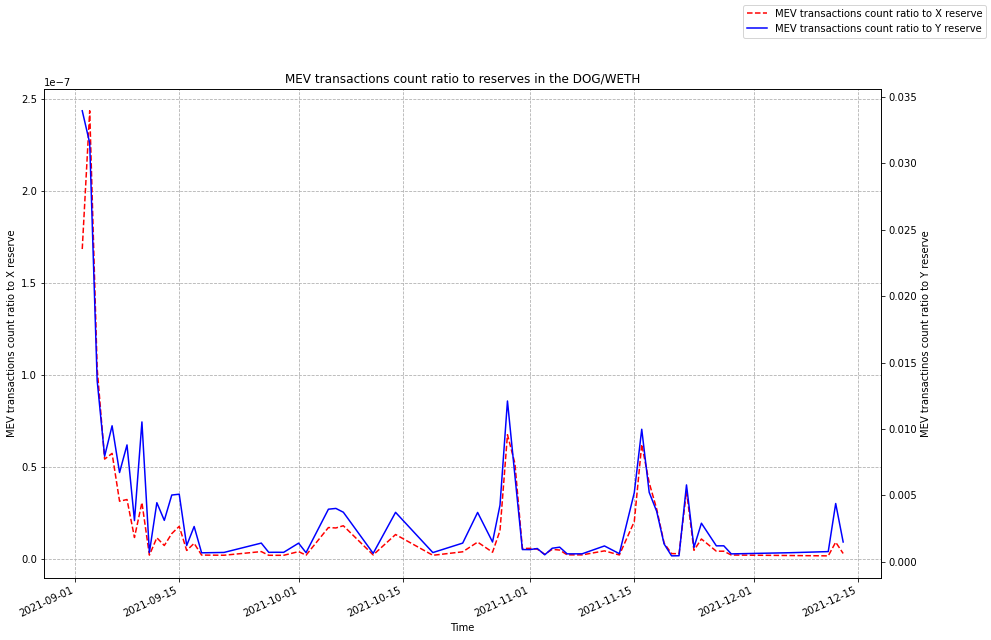

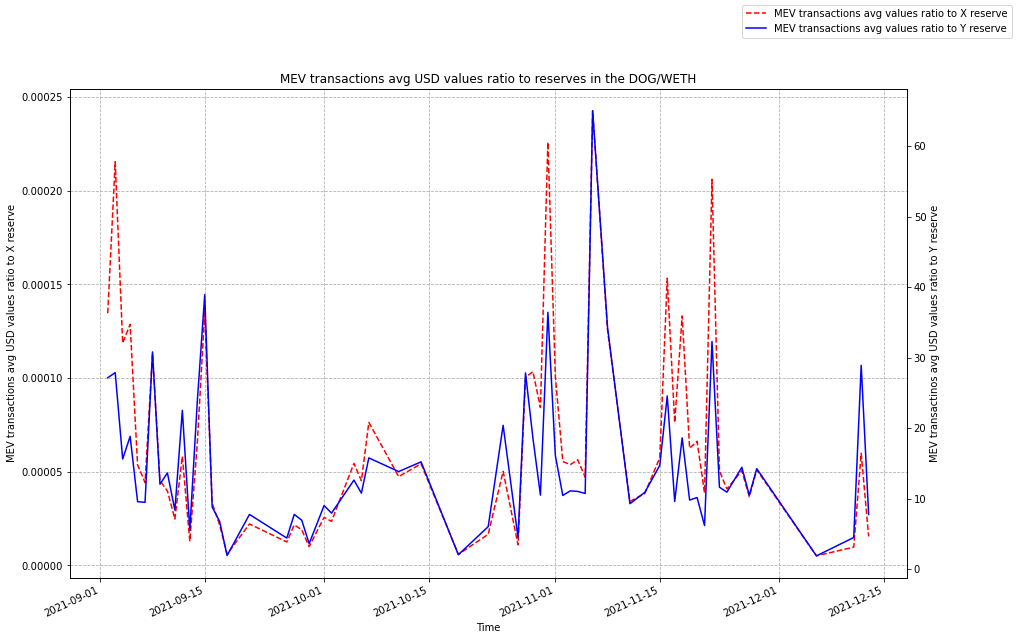

In [44]:
dog_weth_sim.show_mevs_to_reserves_ratio(dog_weth_swaps_mitigation_off_df, dog_weth_mevs_df, width=15, height=10)
dog_weth_sim.show_mevs_values_to_reserves_ratio(dog_weth_swaps_mitigation_off_df, dog_weth_mevs_df, width=15, height=10)

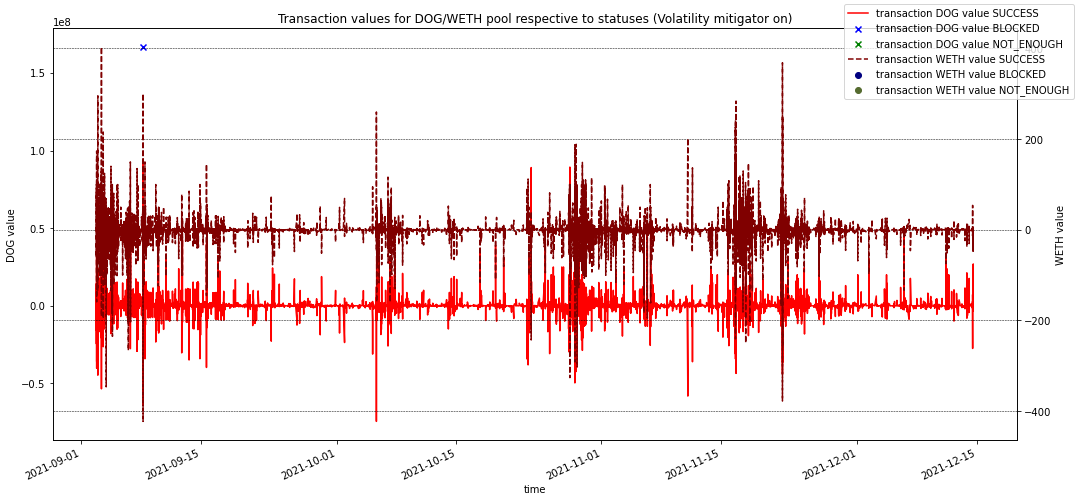

In [45]:
dog_weth_sim.plot_transactions_by_type(dog_weth_swaps_mitigation_on_df, ignore_success=False, width=15, height=7)

Original DOG/WETH pool has next statuses counts:
SUCCESS    18559
Name: status, dtype: int64
Mitigated DOG/WETH dataframe has next statuses counts:
SUCCESS                             18558
BLOCKED_BY_VOLATILITY_MITIGATION        1
Name: status, dtype: int64
TWAP unavailability ratio for DOG/WETH is 0.00010776442696265962
Mitigated DOG/WETH dataframe has next Mitigator statuses:
CHECKED                18557
CANT_CONSULT_ORACLE        2
Name: mitigator_check_status, dtype: int64


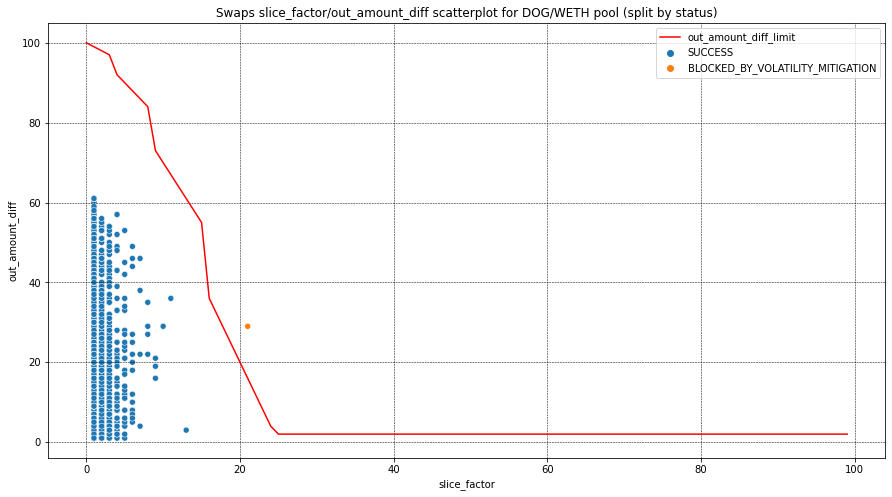

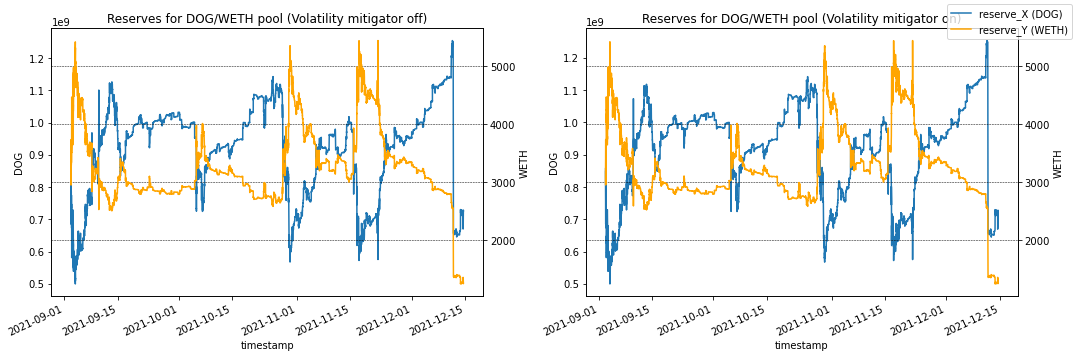

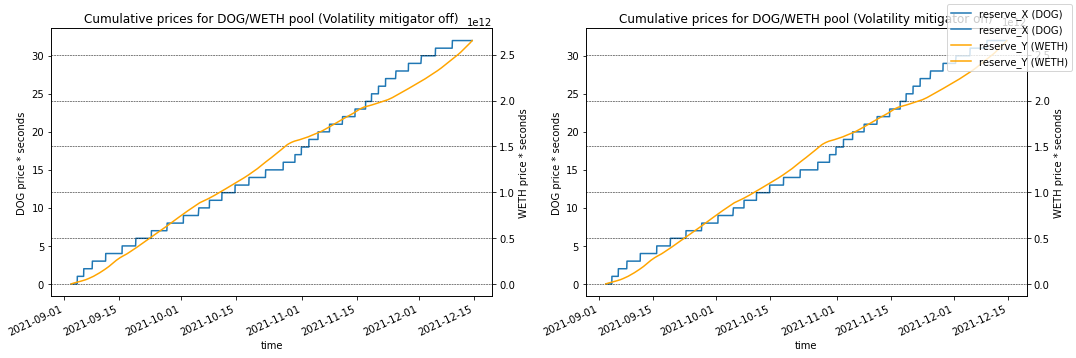

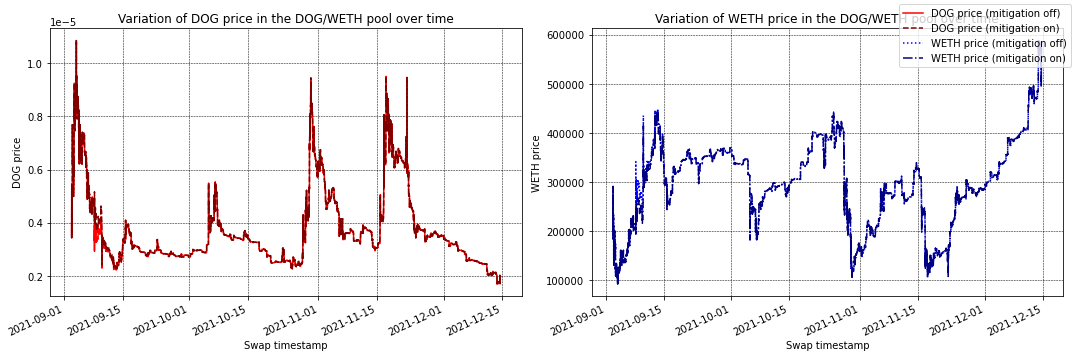

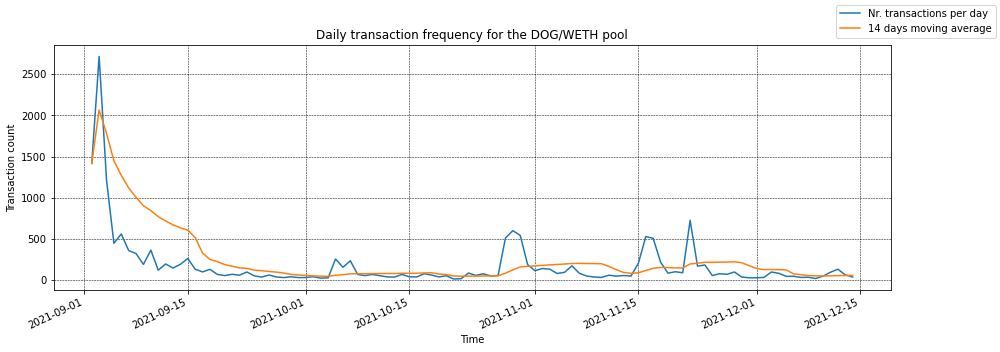

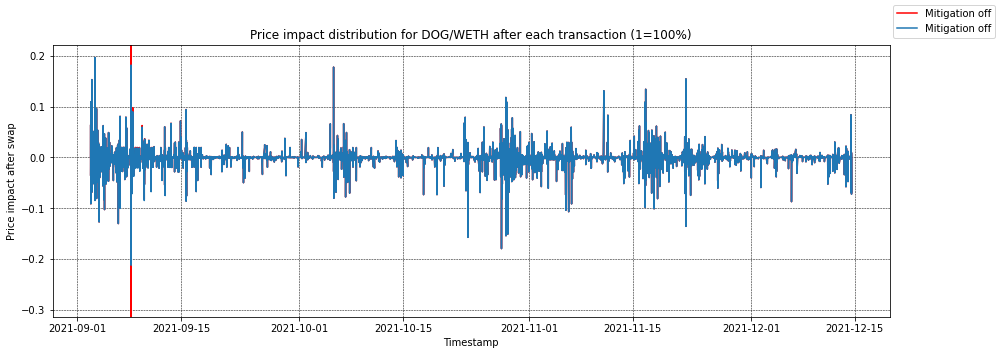

In [46]:
dog_weth_sim.show_mitigation_comparison(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df)
dog_weth_sim.px_hist_blocked_transactions_slice(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.px_hist_blocked_transactions_difference_from_oracle(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_slice_distribution_and_diff_limit_line(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_reserves_with_and_without_mitigation(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_cumulative_prices_with_and_without_mitigation(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_off_df)
dog_weth_sim.plot_price_distribution(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df, separate_plots=True)
dog_weth_sim.plot_frequency_distribution(dog_weth_swaps_mitigation_on_df)
dog_weth_sim.plot_price_impact(dog_weth_swaps_mitigation_off_df, dog_weth_swaps_mitigation_on_df, 
                                smallest_y=dog_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=dog_weth_swaps_mitigation_off_df['price_diff'].max())

In [47]:
dog_weth_blocked_df = dog_weth_swaps_mitigation_on_df[dog_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
dog_weth_blocked_mevs_df = pd.merge(dog_weth_blocked_df, dog_weth_mevs_df, on='txd')
dog_weth_blocked_mevs_df

Empty DataFrame
Columns: [id, token_in_x, token_out_x, token_in_amount, token_out_amount_min, token_out_amount, system_fee, mitigator_check_status, oracle_amount_out, out_amount_diff, slice_factor, slice_factor_curve, status, block_number, block_timestamp, transaction_timestamp, txd, sender_x, to_x, transaction_id, reserve_X_before, reserve_Y_before, k_before, price_X_cumulative_before, price_Y_cumulative_before, is_volatility_mitigator_on_before, reserve_X, reserve_Y, k, price_X_cumulative, price_Y_cumulative, is_volatility_mitigator_on, X_price, price_diff, token_in_y, token_out_y, amount_in, amount_out, amount_usd, timestamp, sender_y, to_y]
Index: []

# LADY/WETH



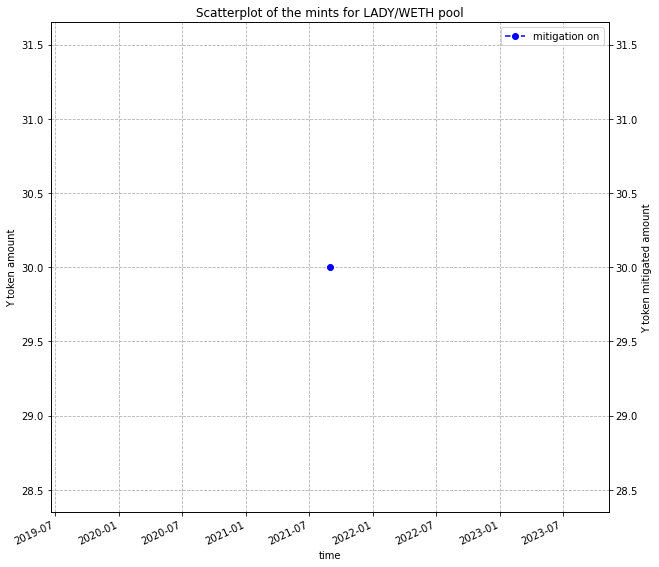

In [48]:
plot_mints(lady_weth_mints_mitigation_on_df, lady_weth_mints_mitigation_off_df, pool_name='LADY/WETH')

Out of 1737 transactions 62 are MEV related, meaning that there are 31 MEV attacks performed on the pool. Each 28-th transaction is MEV related.

In [49]:
lady_weth_filtered_swaps_df, lady_weth_mevs_df = lady_weth_sim.extract_filtered_and_mevs_dfs()
lady_weth_suspicious_filtered_swaps_df, lady_weth_possible_mevs_df = lady_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 1737, filtered len = 1675
txds = 62
out values = 31
initial len = 1737, filtered len = 1671
txds = 66
out values = 33.0


Attacks were happening only at the beginning of the pool lifecycle meaning that after drop of transaction activity attackers lost their interest in the pool.

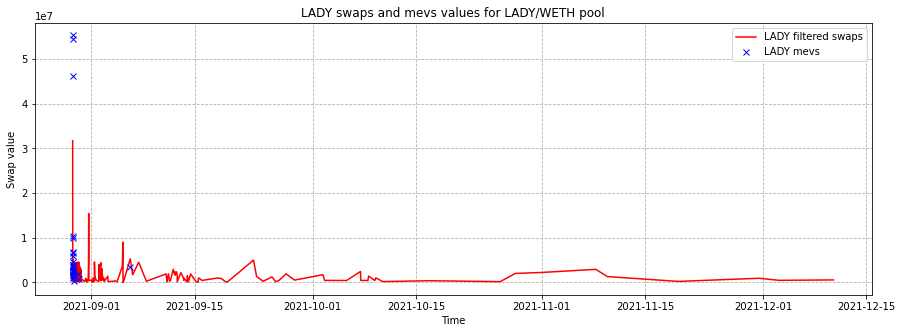

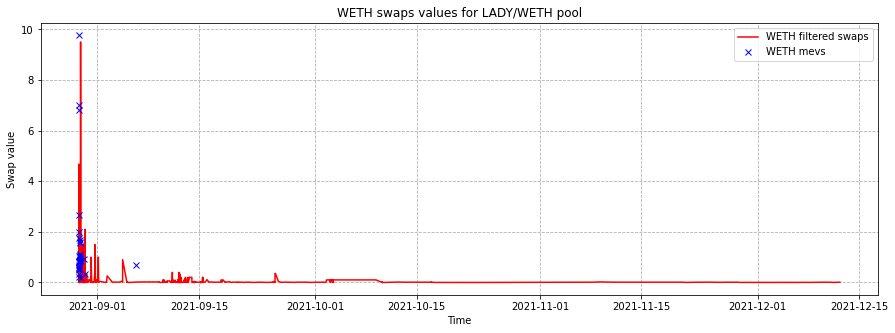

In [50]:
lady_weth_sim.show_swaps_and_mevs_by_token(lady_weth_filtered_swaps_df, lady_weth_mevs_df, width=15, height=5)

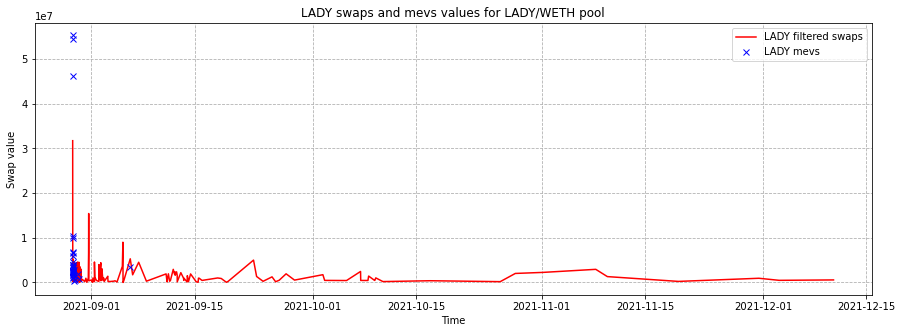

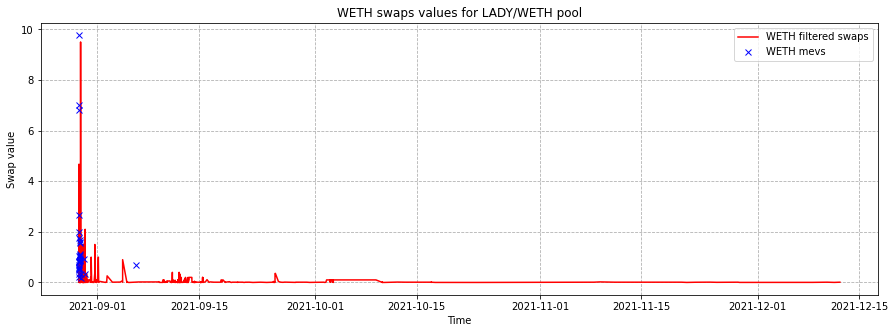

In [51]:
lady_weth_sim.show_swaps_and_mevs_by_token(lady_weth_suspicious_filtered_swaps_df, lady_weth_possible_mevs_df, width=15, height=5)

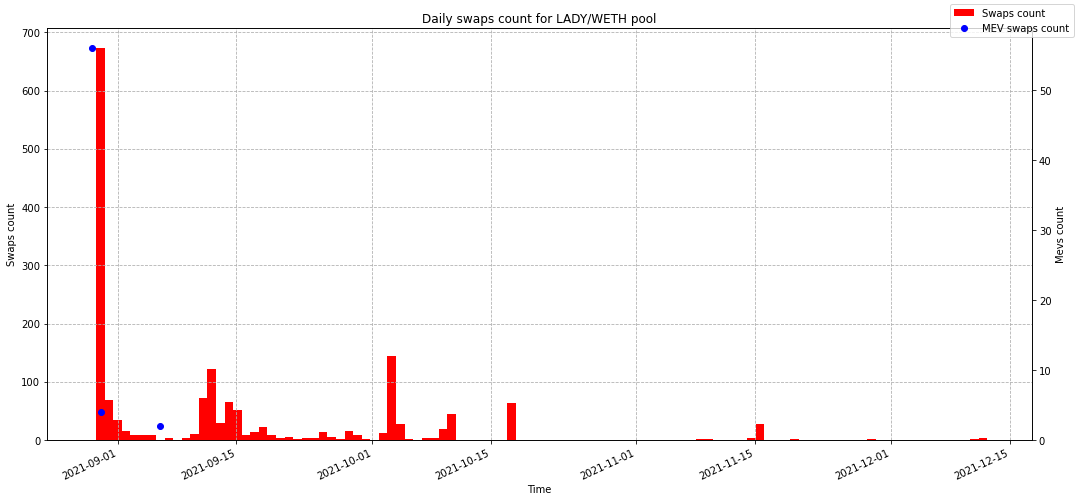

In [52]:
lady_weth_sim.show_swaps_and_mevs_daily_count_by_token(lady_weth_filtered_swaps_df, lady_weth_mevs_df, mevs_alter_axis=True)

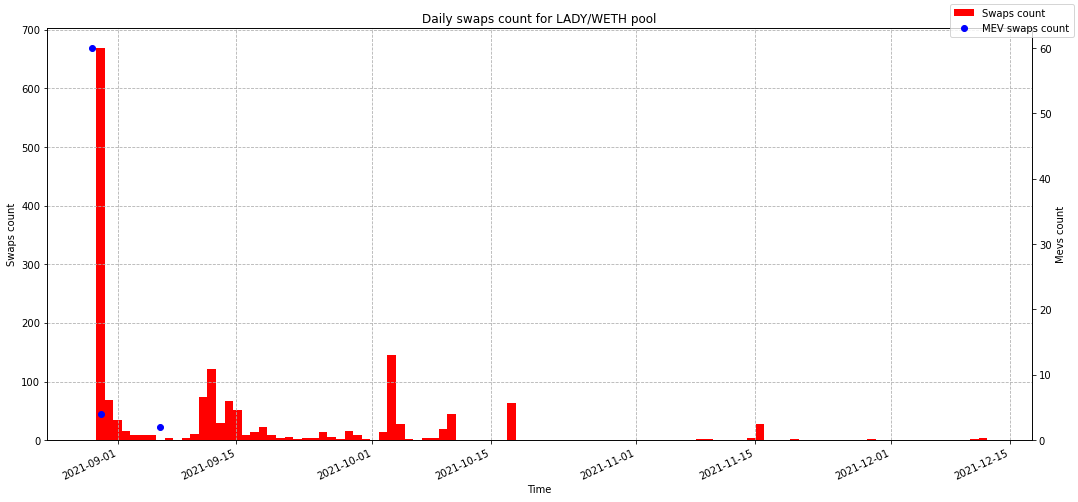

In [53]:
lady_weth_sim.show_swaps_and_mevs_daily_count_by_token(lady_weth_suspicious_filtered_swaps_df, lady_weth_possible_mevs_df, mevs_alter_axis=True)

In [54]:
lady_weth_swaps_mitigation_on_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0        1     WETH      LADY     1.000000e+00                   0.0   
1        2     LADY      WETH     5.525459e+07                   0.0   
2        3     WETH      LADY     6.793286e+00                   0.0   
3        4     LADY      WETH     5.438918e+07                   0.0   
4        5     WETH      LADY     1.500000e+00                   0.0   
...    ...      ...       ...              ...                   ...   
1731  1732     WETH      LADY     3.000000e-03                   0.0   
1732  1733     LADY      WETH     5.697393e+05                   0.0   
1733  1734     WETH      LADY     1.000000e-02                   0.0   
1734  1735     WETH      LADY     1.883020e-03                   0.0   
1735  1736     WETH      LADY     1.000000e-02                   0.0   

      token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0         9.583737e+06    0.004000    CANT_CONSULT_ORACLE                NaN   
1         4.912937e+00    0.019652    CANT_CONSULT_ORACLE                NaN   
2         7.090107e+07    0.027173    CANT_CONSULT_ORACLE                NaN   
3         5.379288e+00    0.021517                CHECKED       6.498425e+00   
4         1.690551e+07    0.006000                CHECKED       1.255439e+07   
...                ...         ...                    ...                ...   
1731      1.589900e+04    0.000012    CANT_CONSULT_ORACLE                NaN   
1732      1.051085e-01    0.000420                CHECKED       1.064373e-01   
1733      5.324907e+04    0.000040                CHECKED       5.379968e+04   
1734      1.002407e+04    0.000008                CHECKED       1.012578e+04   
1735      5.321902e+04    0.000040                CHECKED       5.377199e+04   

      out_amount_diff  slice_factor  slice_factor_curve   status  \
0                 NaN           NaN                 NaN  SUCCESS   
1                 NaN           NaN                 NaN  SUCCESS   
2                 NaN           NaN                 NaN  SUCCESS   
3                18.0          20.0                80.0  SUCCESS   
4                29.0           6.0                12.0  SUCCESS   
...               ...           ...                 ...      ...   
1731              NaN           NaN                 NaN  SUCCESS   
1732              1.0           1.0                 1.0  SUCCESS   
1733              1.0           1.0                 1.0  SUCCESS   
1734              1.0           1.0                 1.0  SUCCESS   
1735              1.0           1.0                 1.0  SUCCESS   

      block_number     block_timestamp transaction_timestamp  \
0              4.0 2021-08-29 11:25:27   2021-08-29 11:25:18   
1              4.0 2021-08-29 11:25:27   2021-08-29 11:25:18   
2              4.0 2021-08-29 11:25:27   2021-08-29 11:25:18   
3              9.0 2021-08-29 11:26:42   2021-08-29 11:26:29   
4              9.0 2021-08-29 11:26:42   2021-08-29 11:26:29   
...            ...                 ...                   ...   
1731      582269.0 2021-12-08 13:31:42   2021-12-08 13:31:33   
1732      593710.0 2021-12-10 13:11:57   2021-12-10 13:11:51   
1733      593941.0 2021-12-10 14:09:42   2021-12-10 14:09:35   
1734      599585.0 2021-12-11 13:40:42   2021-12-11 13:40:42   
1735      604085.0 2021-12-12 08:25:42   2021-12-12 08:25:37   

                                                    txd  \
0     0xc7766d3f939528928028325146a18b153f2f928a9871...   
1     0x590f5bf59376aa63f199320d56b6559bb80790884e35...   
2     0xbf2bab3504a6fffbe17c5fbc1a5721f0110a16eb3c3d...   
3     0xec452cd5330f8d9005ceb56ba18a4132a3c178cf1665...   
4     0x74cc84de7e23a6a4d8d9e6b7b5c5cbb651aae2fe62ec...   
...                                                 ...   
1731  0x65f4e0b897bf8d1755febb36798ec5fc5abf770c4d1a...   
1732  0x64b8d3da0c2327a0a2125963e2e3d7ada5b4527b09c5...   
1733  0xcc48a5316bf2f41d02fa0e52f118b42bd8a323219286...   
1734  

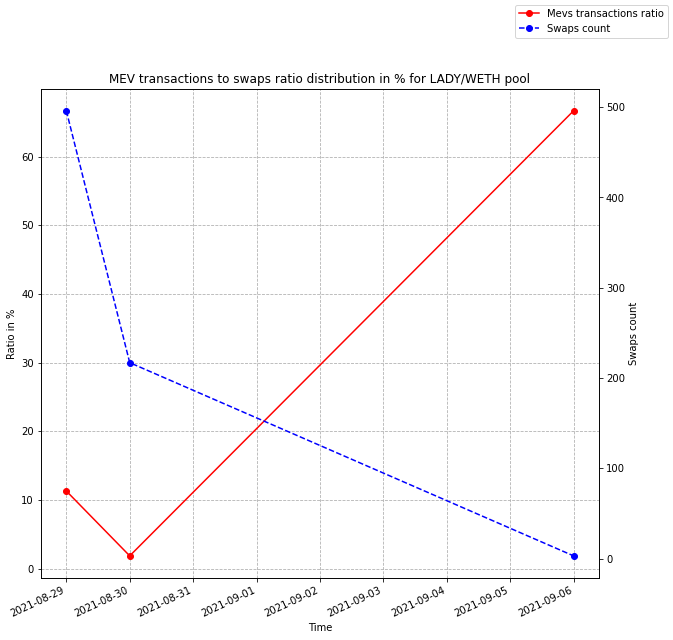

In [55]:
lady_weth_sim.show_mevs_to_swaps_ratio(lady_weth_filtered_swaps_df, lady_weth_mevs_df)

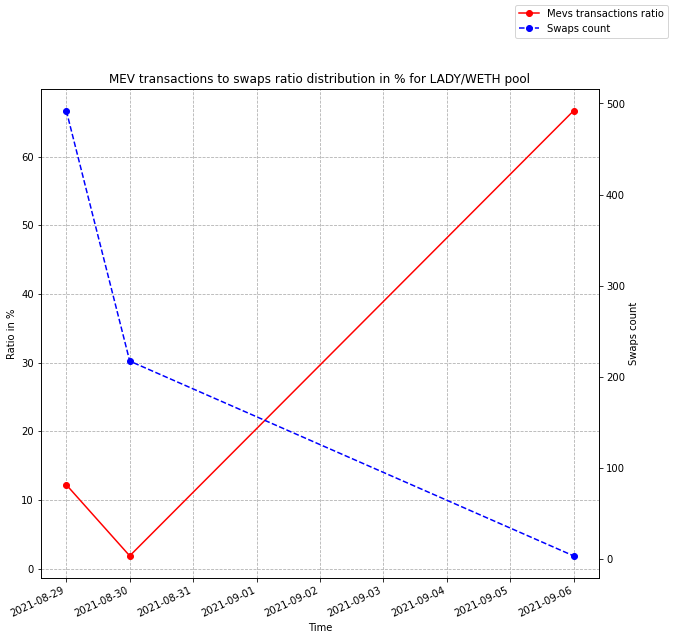

In [56]:
lady_weth_sim.show_mevs_to_swaps_ratio(lady_weth_suspicious_filtered_swaps_df, lady_weth_possible_mevs_df)

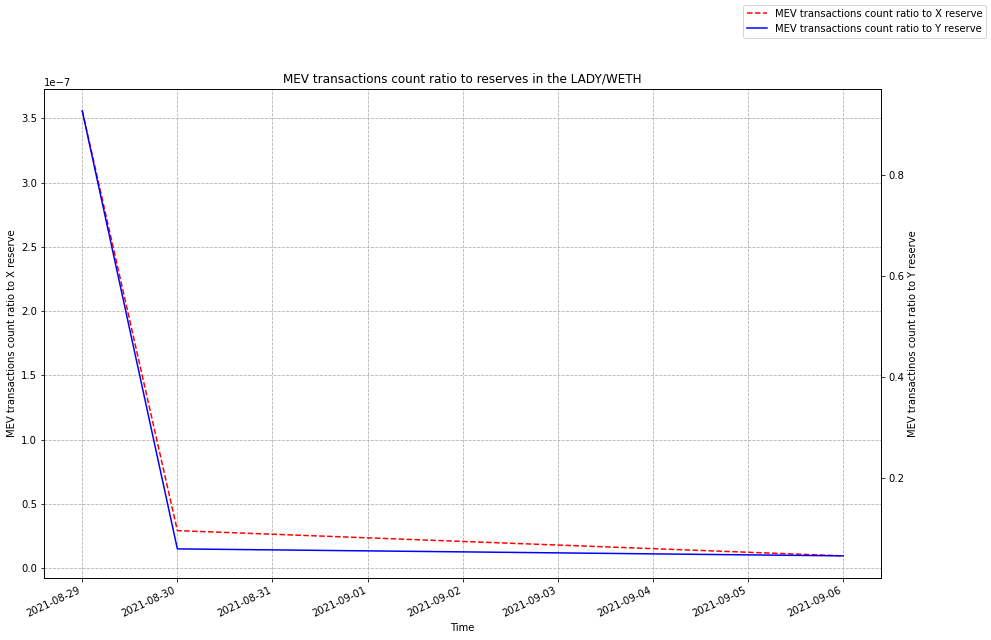

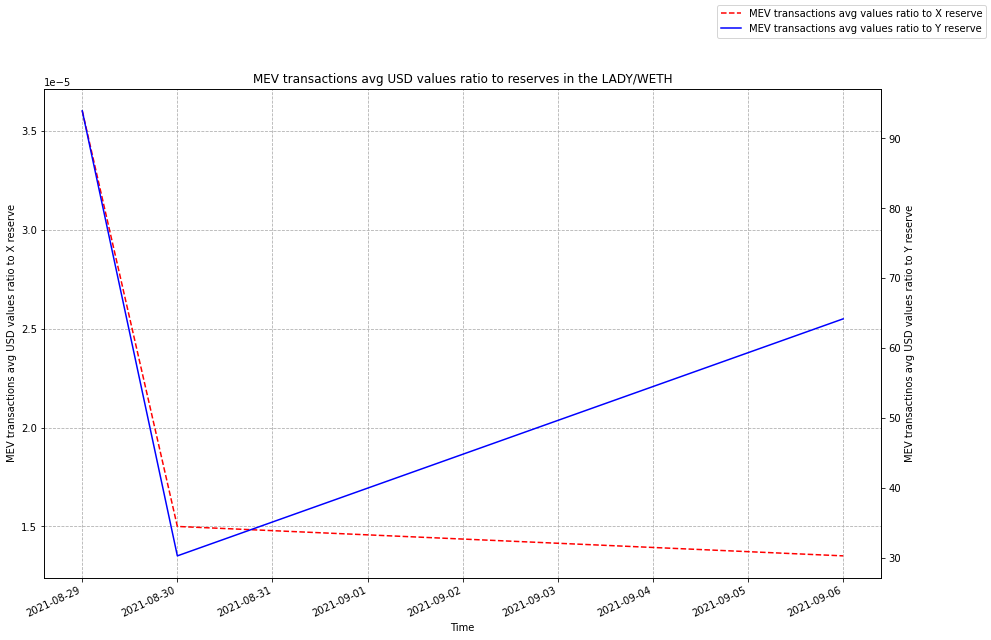

In [57]:
lady_weth_sim.show_mevs_to_reserves_ratio(lady_weth_swaps_mitigation_off_df, lady_weth_mevs_df, width=15, height=10)
lady_weth_sim.show_mevs_values_to_reserves_ratio(lady_weth_swaps_mitigation_off_df, lady_weth_mevs_df, width=15, height=10)

In [58]:
lady_weth_mints_mitigation_on_df

id     X_amount  Y_amount   timestamp   status  block_number  \
0   0  300000000.0      30.0  1630236267  SUCCESS             0   

   block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0       1630236267             1630236267               0               0.0   

   reserve_Y_before  k_before  price_X_cumulative_before  \
0               0.0       0.0                          0   

   price_Y_cumulative_before  is_volatility_mitigator_on_before    reserve_X  \
0                          0                               True  300000000.0   

   reserve_Y             k  price_X_cumulative  price_Y_cumulative  \
0       30.0  9.000000e+09                   0                   0   

   is_volatility_mitigator_on  
0                        True

In [59]:
lady_weth_burns_mitigation_on_df

Empty DataFrame
Columns: [id, X_amount, Y_amount, timestamp, status, block_number, block_timestamp, transaction_timestamp, reserve_X_before, reserve_Y_before, k_before, price_X_cumulative_before, price_Y_cumulative_before, is_volatility_mitigator_on_before, transaction_id, reserve_X, reserve_Y, k, price_X_cumulative, price_Y_cumulative, is_volatility_mitigator_on]
Index: []

Swaps values distribution is convex, meaning that there is a bi-directional activity in the pool with great **drop in swaps after first week of October 2021**

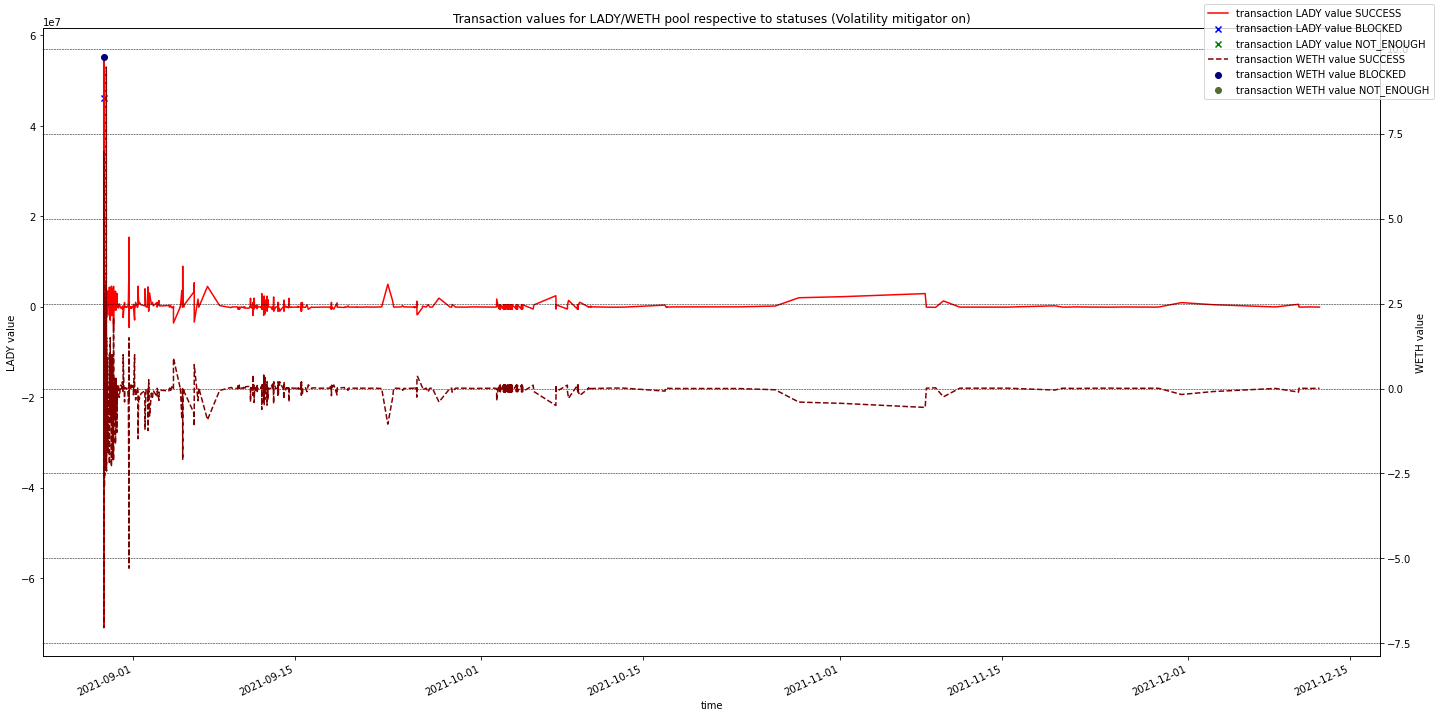

In [60]:
lady_weth_sim.plot_transactions_by_type(lady_weth_swaps_mitigation_on_df, ignore_success=False, width=20, height=10)

There are only 62 MEV transactions and mitigator blocked only two transactions

Original LADY/WETH pool has next statuses counts:
SUCCESS    1736
Name: status, dtype: int64
Mitigated LADY/WETH dataframe has next statuses counts:
SUCCESS                             1734
BLOCKED_BY_VOLATILITY_MITIGATION       2
Name: status, dtype: int64
TWAP unavailability ratio for LADY/WETH is 0.008064516129032258
Mitigated LADY/WETH dataframe has next Mitigator statuses:
CHECKED                1722
CANT_CONSULT_ORACLE      14
Name: mitigator_check_status, dtype: int64


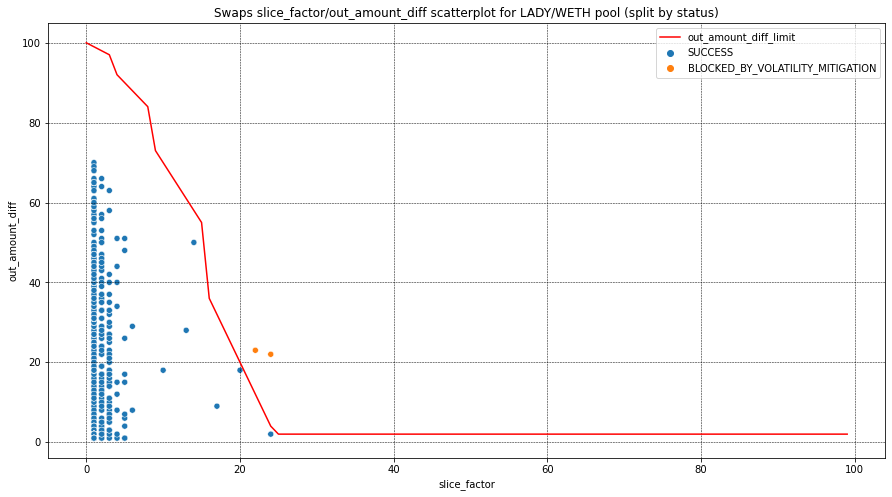

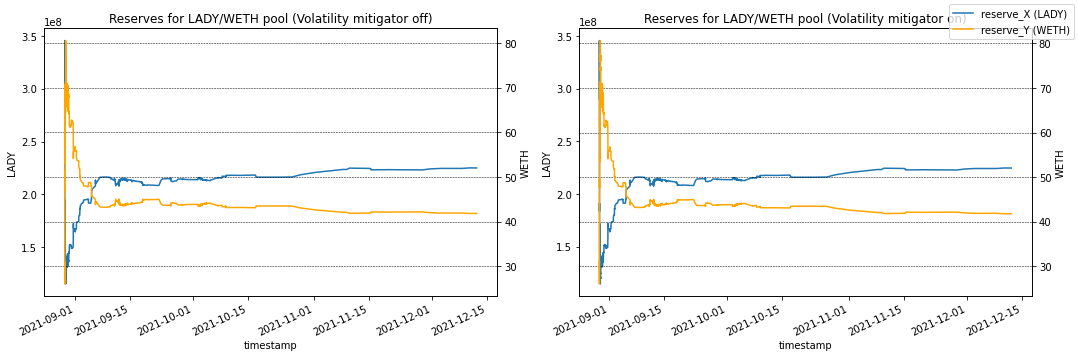

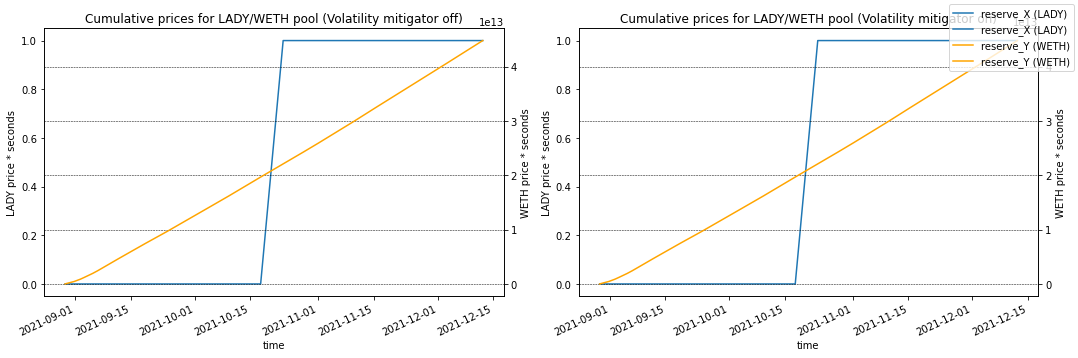

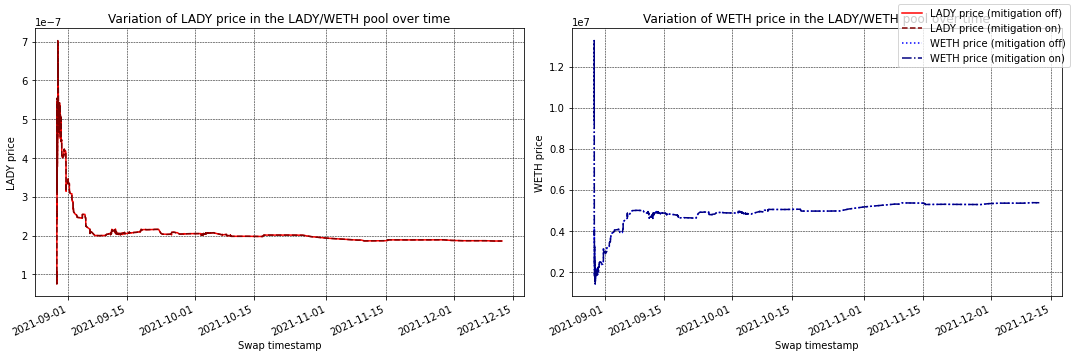

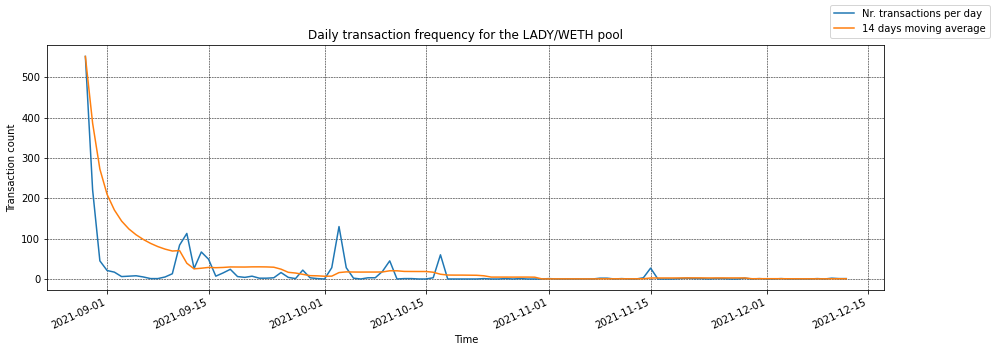

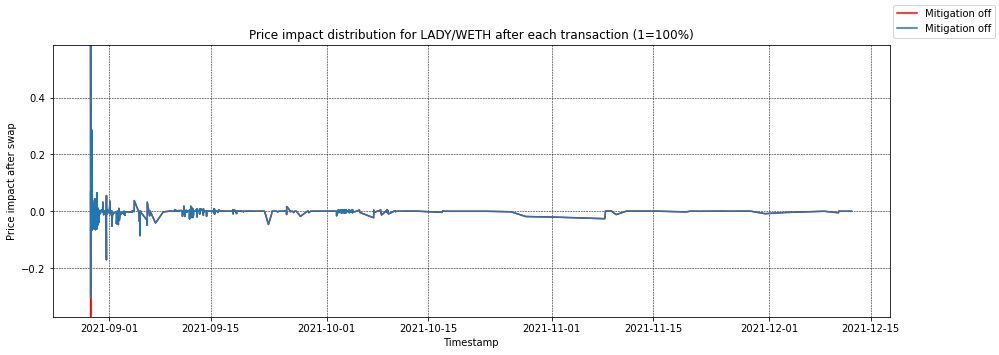

In [61]:
lady_weth_sim.show_mitigation_comparison(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df)
lady_weth_sim.px_hist_blocked_transactions_slice(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.px_hist_blocked_transactions_difference_from_oracle(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_slice_distribution_and_diff_limit_line(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_reserves_with_and_without_mitigation(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_cumulative_prices_with_and_without_mitigation(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_off_df)
lady_weth_sim.plot_price_distribution(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df, separate_plots=True)
lady_weth_sim.plot_frequency_distribution(lady_weth_swaps_mitigation_on_df)
lady_weth_sim.plot_price_impact(lady_weth_swaps_mitigation_off_df, lady_weth_swaps_mitigation_on_df, 
                                smallest_y=lady_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=lady_weth_swaps_mitigation_off_df['price_diff'].max())

# NFD/WETH

In [62]:
nfd_weth_mints_mitigation_on_df

id      X_amount    Y_amount   timestamp   status  block_number  \
0       0  5.000000e+09   25.000000  1629388020  SUCCESS             0   
1     431  5.000000e+09   77.939140  1629407285  SUCCESS          1285   
2     805  8.762175e+06    0.350000  1629441713  SUCCESS          3580   
3     912  1.015455e+10  100.000000  1629489764  SUCCESS          6783   
4    1042  2.749563e+06    0.081010  1629492196  SUCCESS          6946   
..    ...           ...         ...         ...      ...           ...   
60  16309  5.102248e+07    3.419492  1633864226  SUCCESS        298414   
61  16779  3.562631e+05    0.035895  1635192601  SUCCESS        386973   
62  17265  1.570025e+07    2.590341  1635465655  SUCCESS        405176   
63  17314  2.796319e+07    3.700190  1635484944  SUCCESS        406462   
64  17541  1.000000e+06    0.150408  1635615970  SUCCESS        415197   

    block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0        1629388020             1629388020               0      0.000000e+00   
1        1629407295             1629407285             431      2.295260e+09   
2        1629441720             1629441713             805      4.958824e+09   
3        1629489765             1629489764             912      6.389343e+09   
4        1629492210             1629492196            1042      1.200222e+10   
..              ...                    ...             ...               ...   
60       1633864230             1633864226           16309      1.354185e+10   
61       1635192615             1635192601           16779      1.244743e+10   
62       1635465660             1635465655           17265      9.994140e+09   
63       1635484950             1635484944           17314      1.031115e+10   
64       1635615975             1635615970           17541      9.669924e+09   

    reserve_Y_before      k_before  price_X_cumulative_before  \
0           0.000000  0.000000e+00                          0   
1          56.578566  1.298625e+11                          0   
2         201.277777  9.981010e+11                          0   
3         157.393099  1.005639e+12                          0   
4         356.594851  4.279930e+12                          0   
..               ...           ...                        ...   
60        902.731588  1.222466e+13                          0   
61        987.485903  1.229166e+13                          0   
62       1236.626582  1.235902e+13                          0   
63       1203.764274  1.241219e+13                          0   
64       1294.611893  1.251880e+13                          0   

   price_Y_cumulative_before  is_volatility_mitigator_on_before     reserve_X  \
0                          0                               True  5.000000e+09   
1               705249622682                               True  7.295260e+09   
2              1596818068278                               True  4.967586e+09   
3              3042360214778                               True  1.654389e+10   
4              3153825143787                               True  1.200497e+10   
..                       ...                                ...           ...   
60            61387895374018                               True  1.359287e+10   
61            81722006451458                               True  1.244779e+10   
62            84714839226506                               True  1.000984e+10   
63            84872196121310                               True  1.033911e+10   
64            85931249950754                               True  9.670924e+09   

      reserve_Y             k  price_X_cumulative price_Y_cumulative  \
0     25.000000  1.250000e+11                   0                  0   
1    134.517706  9.813416e+11                   0       705249622682   
2    201.627777  1.001603e+12                   0      1596818068278   
3    257.393099  4.258284e+12                   0      3042360214778   
4    356.675861  4.281883e+12              

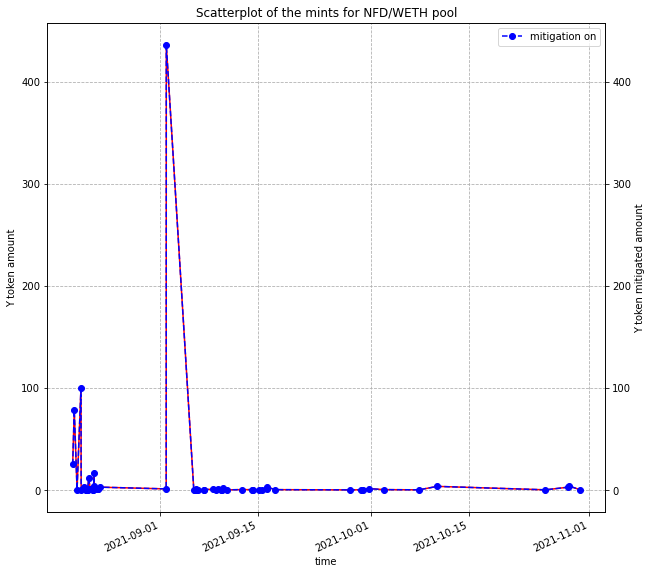

In [63]:
plot_mints(nfd_weth_mints_mitigation_on_df, nfd_weth_mints_mitigation_off_df, pool_name='NFD/WETH')

There are 1026 MEV transactions and 513 MEV attacks, meaning that around each 19-th transaction is related to MEV attack. MEV activity directly depends on the amount of "honest" swaps.

In [64]:
nfd_weth_filtered_swaps_df, nfd_weth_mevs_df = nfd_weth_sim.extract_filtered_and_mevs_dfs()
nfd_weth_suspicious_filtered_swaps_df, nfd_weth_possible_mevs_df = nfd_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 18779, filtered len = 17753
txds = 1026
out values = 513
initial len = 18779, filtered len = 17657
txds = 1122
out values = 561.0


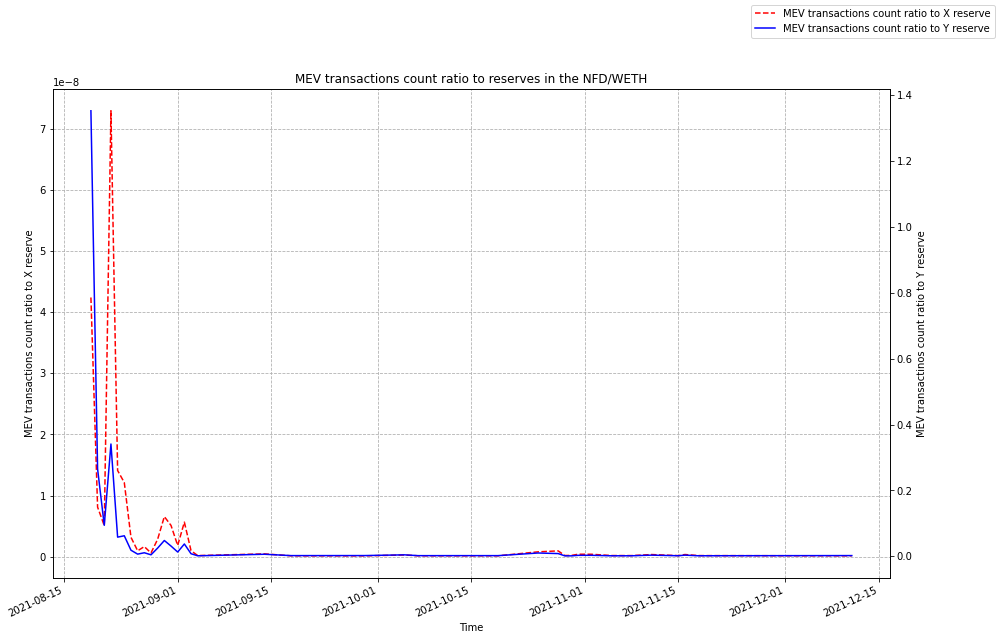

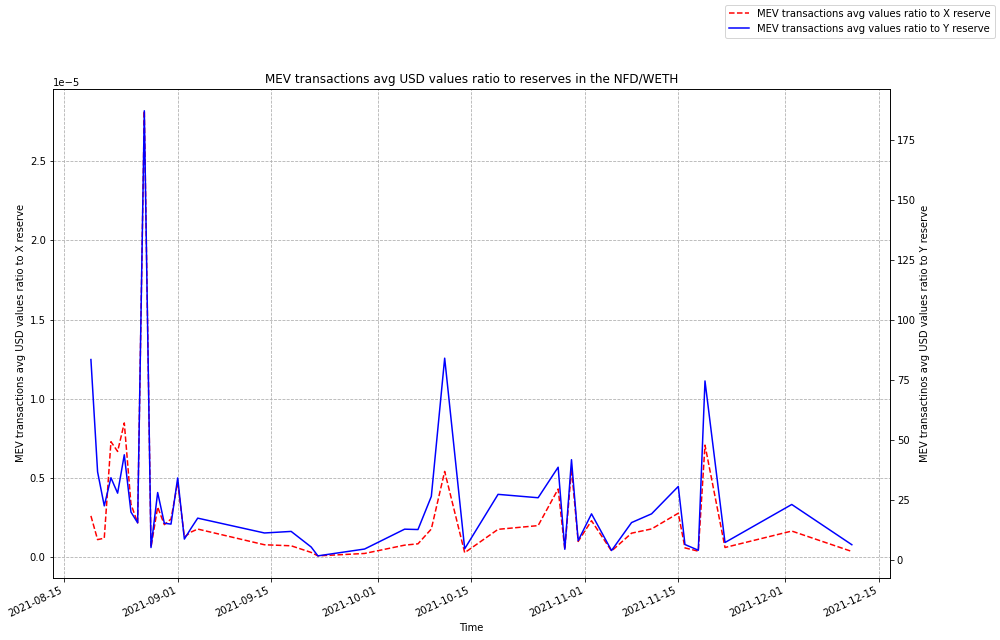

In [65]:
nfd_weth_sim.show_mevs_to_reserves_ratio(nfd_weth_swaps_mitigation_off_df, nfd_weth_mevs_df, width=15, height=10)
nfd_weth_sim.show_mevs_values_to_reserves_ratio(nfd_weth_swaps_mitigation_off_df, nfd_weth_mevs_df, width=15, height=10)

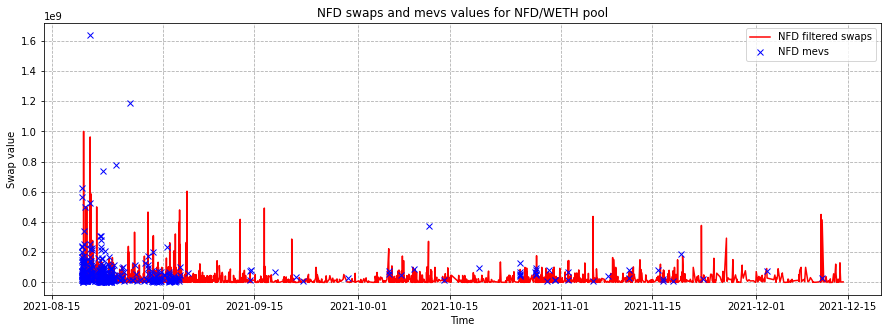

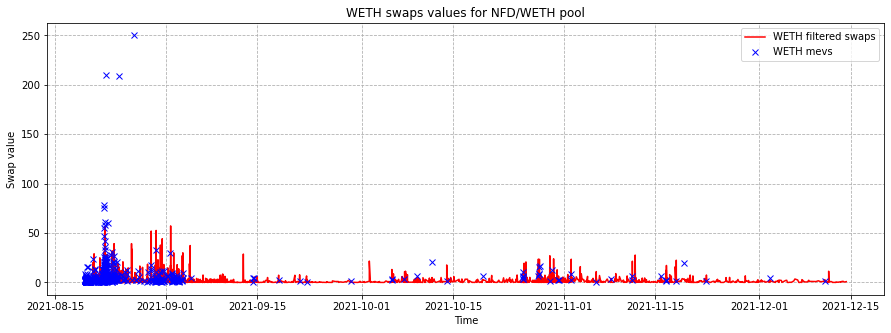

In [66]:
nfd_weth_sim.show_swaps_and_mevs_by_token(nfd_weth_filtered_swaps_df, nfd_weth_mevs_df, width=15, height=5)

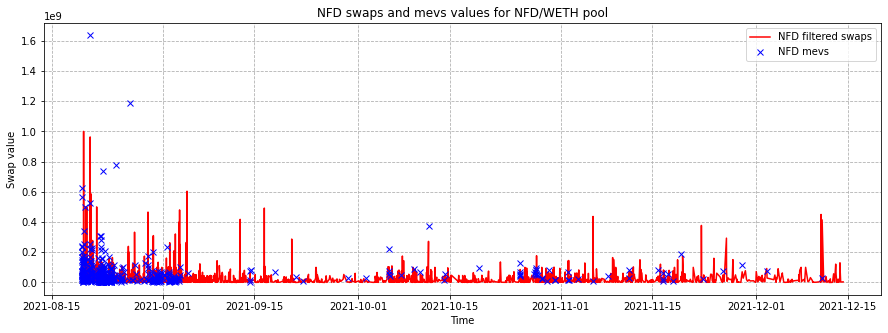

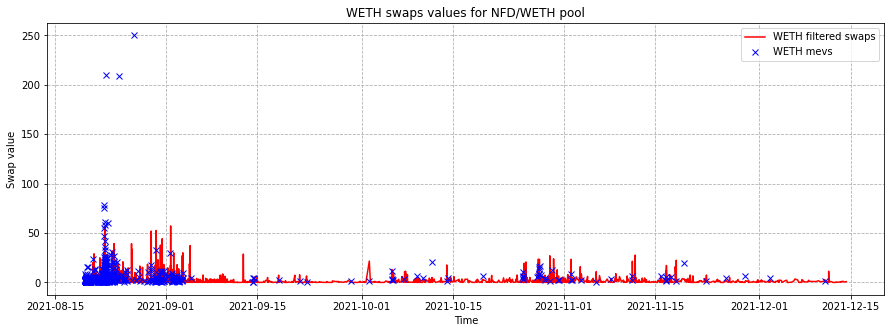

In [67]:
nfd_weth_sim.show_swaps_and_mevs_by_token(nfd_weth_suspicious_filtered_swaps_df, nfd_weth_possible_mevs_df, width=15, height=5)

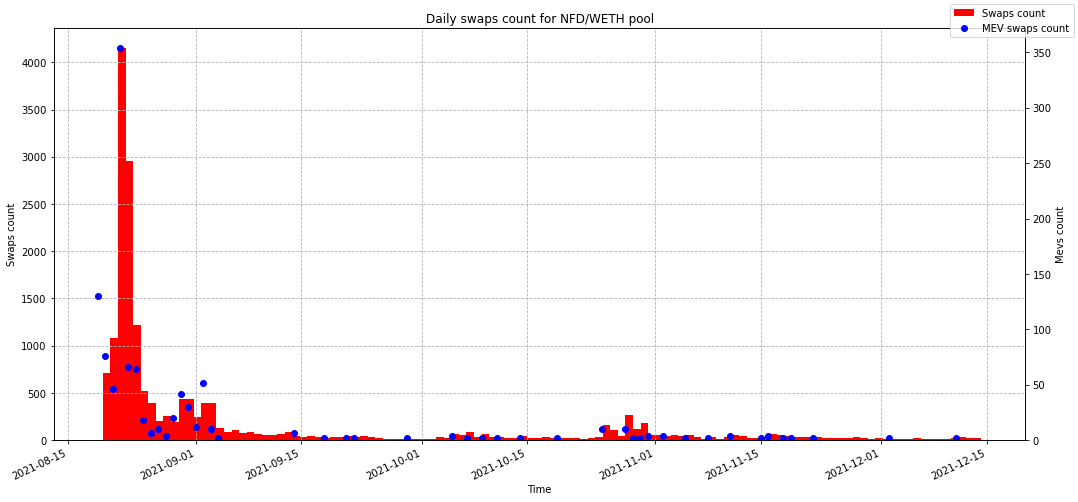

In [68]:
nfd_weth_sim.show_swaps_and_mevs_daily_count_by_token(nfd_weth_filtered_swaps_df, nfd_weth_mevs_df, mevs_alter_axis=True)

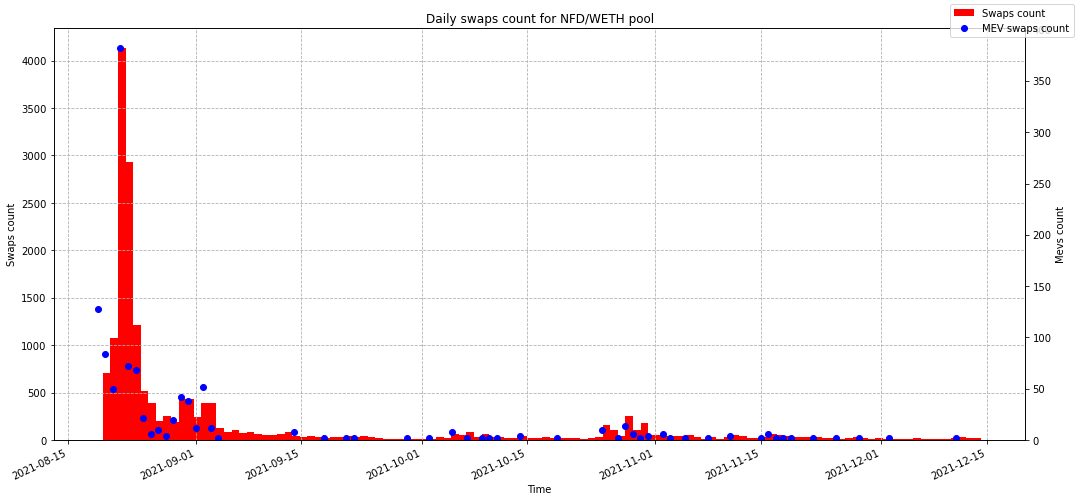

In [69]:
nfd_weth_sim.show_swaps_and_mevs_daily_count_by_token(nfd_weth_suspicious_filtered_swaps_df, nfd_weth_possible_mevs_df, mevs_alter_axis=True)

In [70]:
nfd_weth_mints_mitigation_on_df

id      X_amount    Y_amount   timestamp   status  block_number  \
0       0  5.000000e+09   25.000000  1629388020  SUCCESS             0   
1     431  5.000000e+09   77.939140  1629407285  SUCCESS          1285   
2     805  8.762175e+06    0.350000  1629441713  SUCCESS          3580   
3     912  1.015455e+10  100.000000  1629489764  SUCCESS          6783   
4    1042  2.749563e+06    0.081010  1629492196  SUCCESS          6946   
..    ...           ...         ...         ...      ...           ...   
60  16309  5.102248e+07    3.419492  1633864226  SUCCESS        298414   
61  16779  3.562631e+05    0.035895  1635192601  SUCCESS        386973   
62  17265  1.570025e+07    2.590341  1635465655  SUCCESS        405176   
63  17314  2.796319e+07    3.700190  1635484944  SUCCESS        406462   
64  17541  1.000000e+06    0.150408  1635615970  SUCCESS        415197   

    block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0        1629388020             1629388020               0      0.000000e+00   
1        1629407295             1629407285             431      2.295260e+09   
2        1629441720             1629441713             805      4.958824e+09   
3        1629489765             1629489764             912      6.389343e+09   
4        1629492210             1629492196            1042      1.200222e+10   
..              ...                    ...             ...               ...   
60       1633864230             1633864226           16309      1.354185e+10   
61       1635192615             1635192601           16779      1.244743e+10   
62       1635465660             1635465655           17265      9.994140e+09   
63       1635484950             1635484944           17314      1.031115e+10   
64       1635615975             1635615970           17541      9.669924e+09   

    reserve_Y_before      k_before  price_X_cumulative_before  \
0           0.000000  0.000000e+00                          0   
1          56.578566  1.298625e+11                          0   
2         201.277777  9.981010e+11                          0   
3         157.393099  1.005639e+12                          0   
4         356.594851  4.279930e+12                          0   
..               ...           ...                        ...   
60        902.731588  1.222466e+13                          0   
61        987.485903  1.229166e+13                          0   
62       1236.626582  1.235902e+13                          0   
63       1203.764274  1.241219e+13                          0   
64       1294.611893  1.251880e+13                          0   

   price_Y_cumulative_before  is_volatility_mitigator_on_before     reserve_X  \
0                          0                               True  5.000000e+09   
1               705249622682                               True  7.295260e+09   
2              1596818068278                               True  4.967586e+09   
3              3042360214778                               True  1.654389e+10   
4              3153825143787                               True  1.200497e+10   
..                       ...                                ...           ...   
60            61387895374018                               True  1.359287e+10   
61            81722006451458                               True  1.244779e+10   
62            84714839226506                               True  1.000984e+10   
63            84872196121310                               True  1.033911e+10   
64            85931249950754                               True  9.670924e+09   

      reserve_Y             k  price_X_cumulative price_Y_cumulative  \
0     25.000000  1.250000e+11                   0                  0   
1    134.517706  9.813416e+11                   0       705249622682   
2    201.627777  1.001603e+12                   0      1596818068278   
3    257.393099  4.258284e+12                   0      3042360214778   
4    356.675861  4.281883e+12              

In [71]:
nfd_weth_burns_mitigation_on_df

id      X_amount    Y_amount   timestamp   status  block_number  \
0   14224  2.840204e+06   13.199229  1630618029  SUCCESS         82001   
1   14262  5.464182e+04    0.298246  1630622882  SUCCESS         82325   
2   14523  1.183244e+05    1.012607  1630683931  SUCCESS         86395   
3   14641  1.173057e+05    0.869720  1630754815  SUCCESS         91120   
4   14671  1.303380e+06    8.239186  1630777314  SUCCESS         92620   
5   14687  7.341154e+06   48.075311  1630783830  SUCCESS         93054   
6   14737  2.115522e+05    1.494807  1630829980  SUCCESS         96131   
7   14833  1.677401e+05    0.957953  1630928987  SUCCESS        102732   
8   14839  4.871057e+05    2.610115  1630936218  SUCCESS        103214   
9   14878  2.230418e+05    1.097538  1630950878  SUCCESS        104191   
10  14966  1.702873e+05    0.828761  1631045479  SUCCESS        110498   
11  15049  2.090491e+05    0.690186  1631127455  SUCCESS        115963   
12  15324  9.716537e+05    2.275879  1631501145  SUCCESS        140875   
13  15356  8.944415e+04    0.198295  1631535875  SUCCESS        143191   
14  15388  2.210903e+05    0.531681  1631585158  SUCCESS        146476   
15  15428  2.310871e+06    6.393584  1631646269  SUCCESS        150550   
16  15461  2.286285e+05    0.844297  1631736449  SUCCESS        156562   
17  15534  5.077210e+05    1.567452  1631879641  SUCCESS        166109   
18  15624  4.314979e+05    1.202936  1632158220  SUCCESS        184680   
19  15686  2.019336e+05    0.578453  1632306749  SUCCESS        194582   
20  15909  3.351307e+04    0.099080  1633169846  SUCCESS        252122   
21  16291  3.186916e+05    1.113799  1633844895  SUCCESS        297125   
22  16381  1.991259e+05    0.680959  1634025299  SUCCESS        309152   
23  16472  3.520613e+05    1.154934  1634334611  SUCCESS        329773   
24  16480  1.022019e+06    3.322371  1634373293  SUCCESS        332352   
25  16481  3.013257e+05    0.977379  1634373829  SUCCESS        332388   
26  16644  4.327454e+04    0.108545  1635021439  SUCCESS        375562   
27  17542  3.751761e+05    2.572252  1635616034  SUCCESS        415201   
28  17604  9.865583e+05    6.022213  1635679925  SUCCESS        419461   
29  17621  1.706247e+05    0.973005  1635710104  SUCCESS        421473   
30  17706  4.100634e+06   24.131530  1635830420  SUCCESS        429494   
31  17720  6.359163e+05    3.508977  1635853140  SUCCESS        431008   
32  17735  7.971605e+05    3.798526  1635882281  SUCCESS        432951   
33  17831  6.086271e+04    0.286285  1636082451  SUCCESS        446296   
34  17921  1.011408e+04    0.036182  1636289068  SUCCESS        460070   
35  18073  3.943475e+06   15.057097  1636696562  SUCCESS        487237   
36  18148  1.852223e+04    0.056320  1636897441  SUCCESS        500629   
37  18169  2.452939e+04    0.078071  1636968635  SUCCESS        505375   
38  18210  1.967087e+05    0.850846  1637041534  SUCCESS        510235   
39  18291  1.099127e+05    0.977789  1637140553  SUCCESS        516836   
40  18319  2.207519e+04    0.149283  1637194293  SUCCESS        520419   
41  18402  2.163156e+06   13.653156  1637369884  SUCCESS        532125   
42  18416  1.294486e+06    8.669866  1637404679  SUCCESS        534444   
43  18461  7.803006e+01    0.000473  1637510831  SUCCESS        541521   
44  18550  1.147911e+06    4.243900  1637831611  SUCCESS        562907   
45  18568  7.011828e+04    0.254107  1637905111  SUCCESS        567807   
46  18595  8.892240e+05    3.069568  1637986690  SUCCESS        573245   
47  18649  1.269820e+04    0.045030  1638186401  SUCCESS        586559   
48  18650  4.585626e+05    1.626130  1638187694  SUCCESS        586645   
49  18651  1.474614e+05    0.521308  1638193998  SUCCESS        587066   
50  18790  2.016453e+06    5.029553  1639002806  SUCCESS        640986   
51  18794  1.301068e+06    3.214035  1639047402  SUCCESS        643959   
52  18795  4.248889e+05    1.047308  1639056775  SUCCESS        644584   
53  18801  

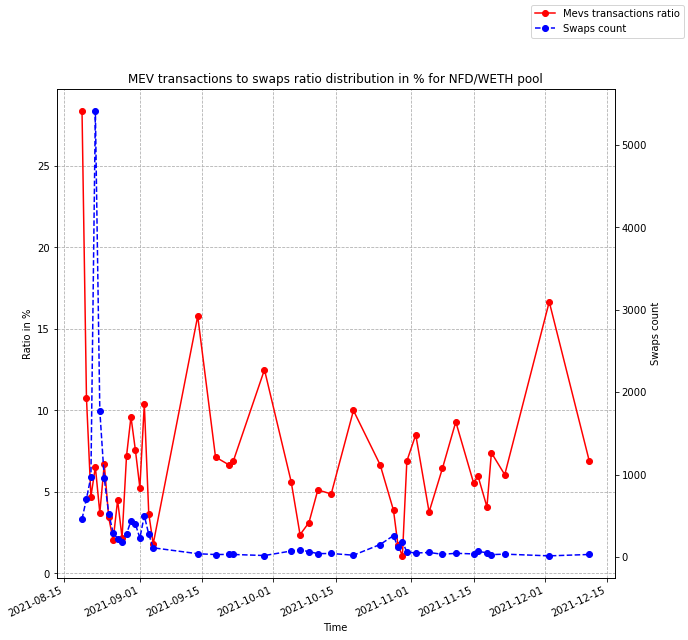

In [72]:
nfd_weth_sim.show_mevs_to_swaps_ratio(nfd_weth_filtered_swaps_df, nfd_weth_mevs_df)

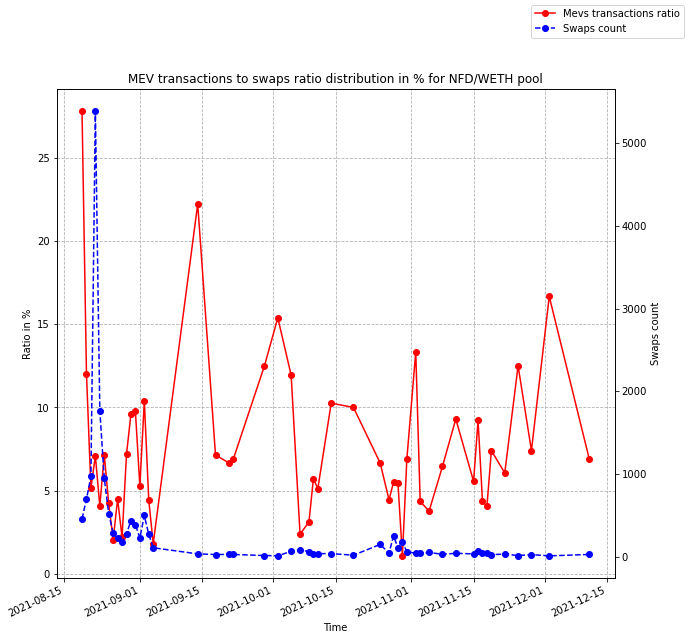

In [73]:
nfd_weth_sim.show_mevs_to_swaps_ratio(nfd_weth_suspicious_filtered_swaps_df, nfd_weth_possible_mevs_df)

There are 97 transactions blocked by the mitigation mechanism and blocked transactions are located in the beginning and in the end of the pool history.

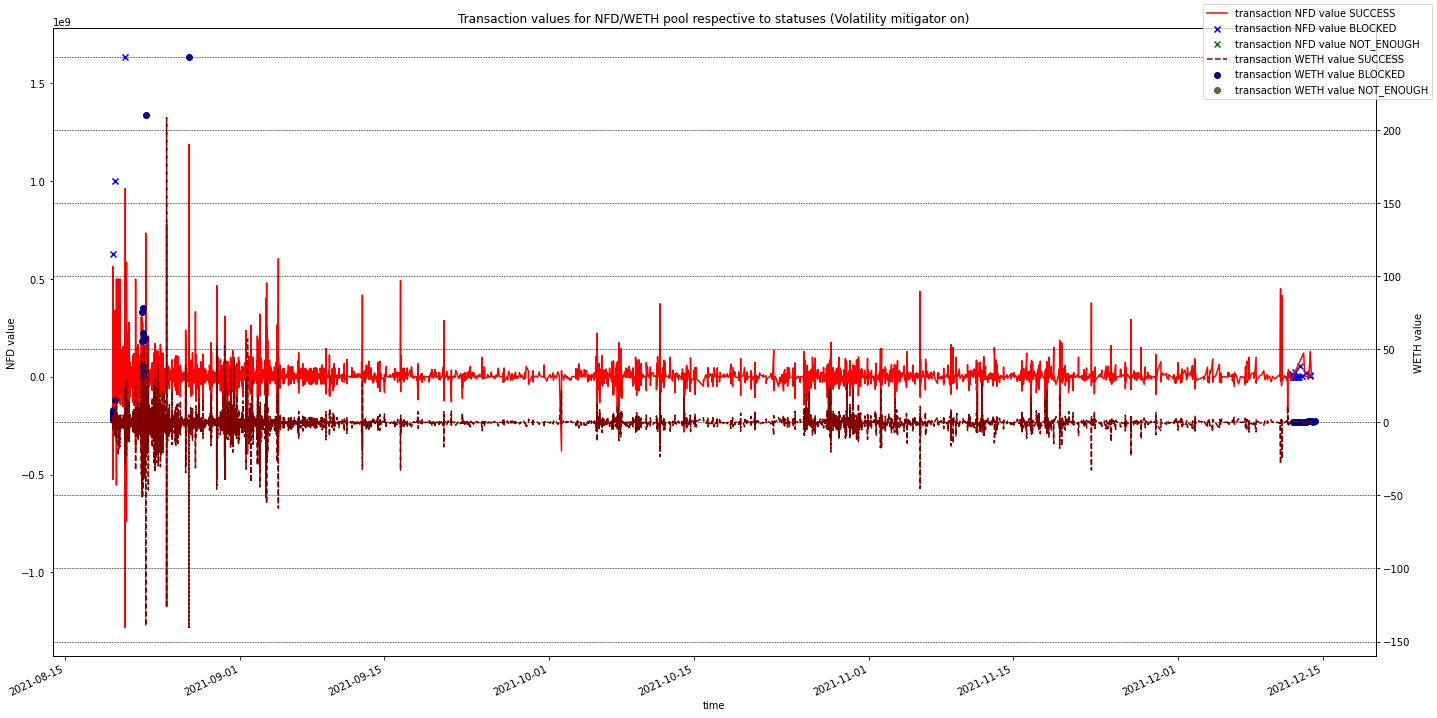

In [74]:
nfd_weth_sim.plot_transactions_by_type(nfd_weth_swaps_mitigation_on_df, ignore_success=False, width=20, height=10)

In [75]:
nfd_weth_swaps_mitigation_on_df

id token_in token_out  token_in_amount  token_out_amount_min  \
0          1     WETH       NFD     1.500000e-01                   0.0   
1          2     WETH       NFD     1.000000e-01                   0.0   
2          3     WETH       NFD     1.000000e+00                   0.0   
3          4     WETH       NFD     1.370000e+00                   0.0   
4          5     WETH       NFD     1.000000e+00                   0.0   
...      ...      ...       ...              ...                   ...   
18773  18893     WETH       NFD     8.096322e-01                   0.0   
18774  18894      NFD      WETH     5.682729e+06                   0.0   
18775  18895      NFD      WETH     2.690847e+06                   0.0   
18776  18896     WETH       NFD     4.302870e-01                   0.0   
18777  18897     WETH       NFD     8.000000e-01                   0.0   

       token_out_amount    system_fee mitigator_check_status  \
0          2.952462e+07  6.000000e-04    CANT_CONSULT_ORACLE   
1          1.948944e+07  4.000000e-04                CHECKED   
2          1.868012e+08  4.000000e-03                CHECKED   
3          2.341072e+08  5.480000e-03                CHECKED   
4          1.568130e+08  4.000000e-03                CHECKED   
...                 ...           ...                    ...   
18773      1.365436e+10           NaN                CHECKED   
18774      3.980000e-16  1.000000e-18                CHECKED   
18775      1.880000e-16  0.000000e+00                CHECKED   
18776      1.366274e+10           NaN                CHECKED   
18777      1.366274e+10           NaN                CHECKED   

       oracle_amount_out  out_amount_diff  slice_factor  slice_factor_curve  \
0                    NaN              NaN           NaN                 NaN   
1           1.976379e+07              1.0           1.0                 1.0   
2           1.969656e+08              5.0           4.0                 8.0   
3           2.673546e+08             13.0           6.0                12.0   
4           1.926299e+08             20.0           4.0                 8.0   
...                  ...              ...           ...                 ...   
18773       1.090133e+22            199.0         100.0                98.0   
18774       4.240000e-16              6.0           1.0                 1.0   
18775       1.980000e-16              5.0           1.0                 1.0   
18776       5.876281e+21            199.0         100.0                98.0   
18777       1.084687e+22            199.0         100.0                98.0   

                                 status  block_number     block_timestamp  \
0                               SUCCESS          47.0 2021-08-19 15:58:45   
1                               SUCCESS          64.0 2021-08-19 16:03:00   
2                               SUCCESS          77.0 2021-08-19 16:06:15   
3                               SUCCESS          81.0 2021-08-19 16:07:15   
4                               SUCCESS          84.0 2021-08-19 16:08:00   
...                                 ...           ...                 ...   
18773  BLOCKED_BY_VOLATILITY_MITIGATION      669132.0 2021-12-13 19:50:00   
18774                           SUCCESS      669613.0 2021-12-13 21:50:15   
18775                           SUCCESS      669694.0 2021-12-13 22:10:30   
18776  BLOCKED_BY_VOLATILITY_MITIGATION      670327.0 2021-12-14 00:48:45   
18777  BLOCKED_BY_VOLATILITY_MITIGATION      671877.0 2021-12-14 07:16:15   

      transaction_timestamp  \
0       2021-08-19 15:58:34   
1       2021-08-19 16:02:52   
2       2021-08-19 16:06:08   
3       2021-08-19 16:07:04   
4       2021-08-19 16:07:49   
...                     ...   
18773   2021-12-13 19:49:52   
18774   2021-12-13 21:50:05   
18775   2021-12-13 22:10:25   
18776   2021-12-14 00:48:37   
18777   2021-12-14 07:16:02   

                                                     txd  \
0      0x4f7b97ebaa78233ebd9945c8bba75f2d8370

Original NFD/WETH pool has next statuses counts:
SUCCESS                18751
NOT_ENOUGH_RESERVES       27
Name: status, dtype: int64
Mitigated NFD/WETH dataframe has next statuses counts:
SUCCESS                             18681
BLOCKED_BY_VOLATILITY_MITIGATION       97
Name: status, dtype: int64
TWAP unavailability ratio for NFD/WETH is 5.3253807647246777e-05
Mitigated NFD/WETH dataframe has next Mitigator statuses:
CHECKED                18777
CANT_CONSULT_ORACLE        1
Name: mitigator_check_status, dtype: int64


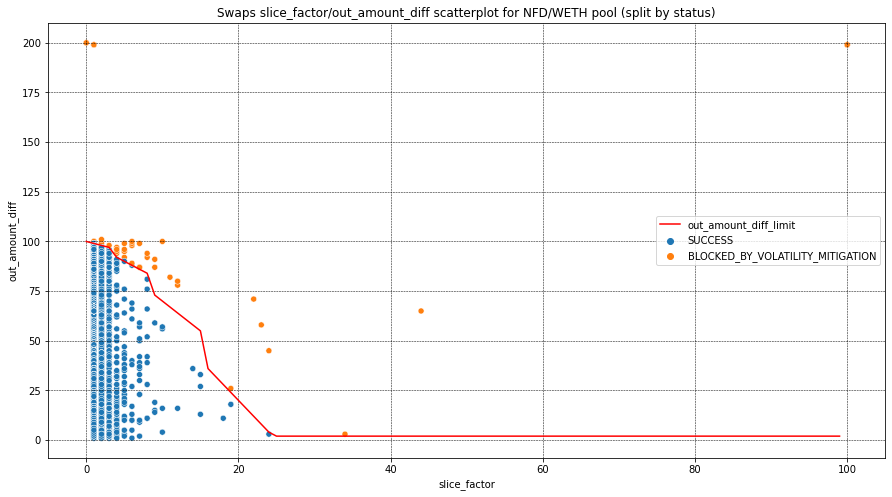

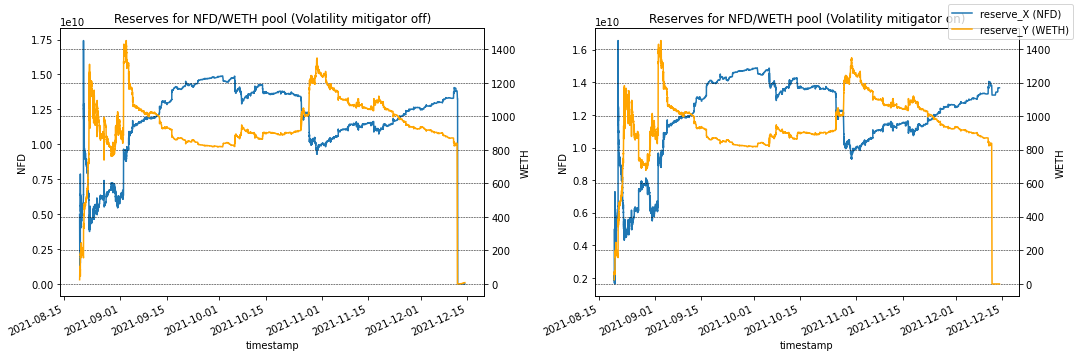

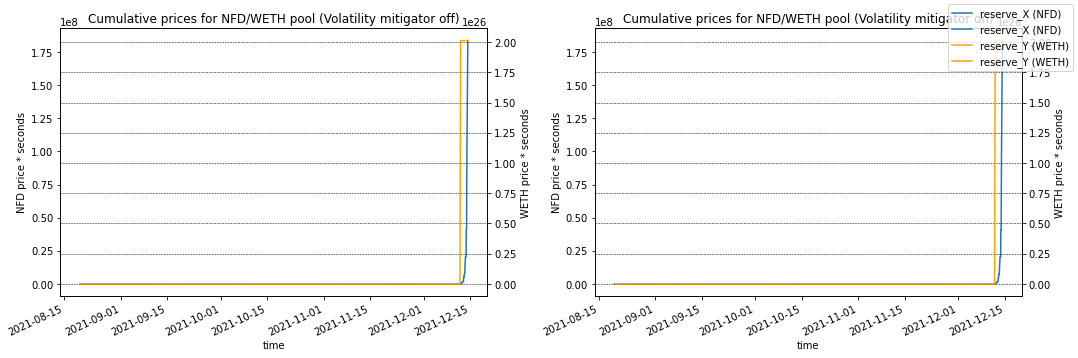

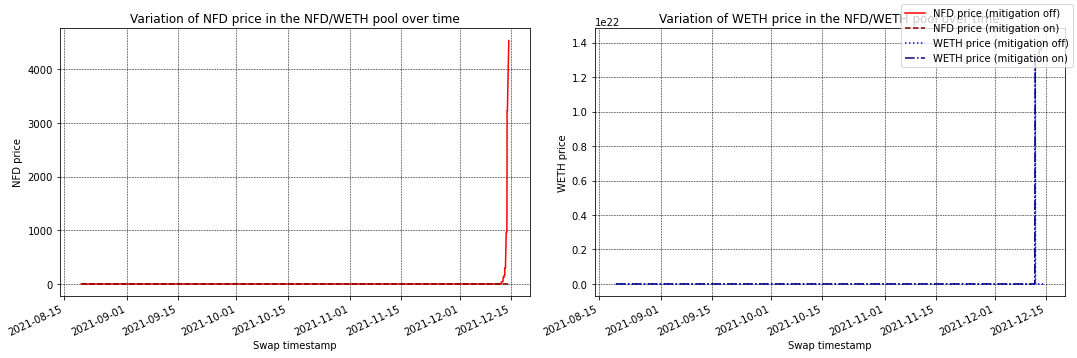

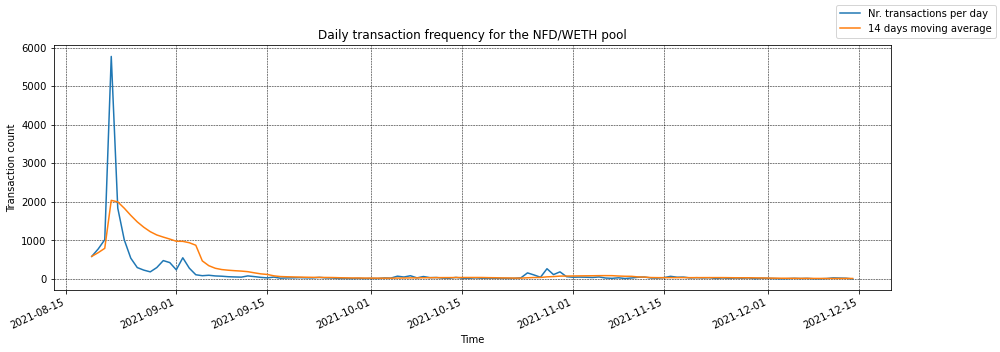

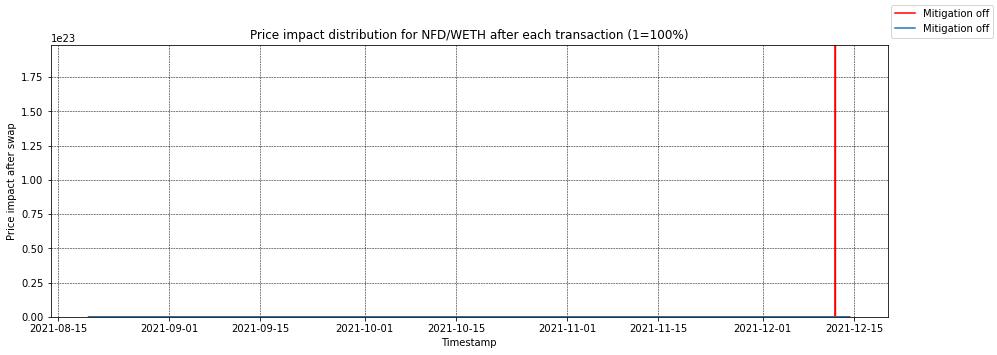

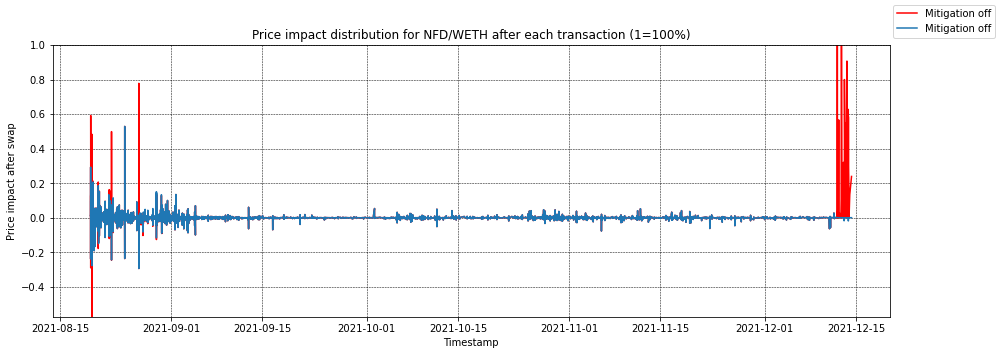

In [76]:
nfd_weth_sim.show_mitigation_comparison(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.px_hist_blocked_transactions_slice(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.px_hist_blocked_transactions_difference_from_oracle(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_slice_distribution_and_diff_limit_line(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_reserves_with_and_without_mitigation(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_cumulative_prices_with_and_without_mitigation(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_off_df, make_big_num_convert=True)
nfd_weth_sim.plot_price_distribution(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df, separate_plots=True)
nfd_weth_sim.plot_frequency_distribution(nfd_weth_swaps_mitigation_on_df)
nfd_weth_sim.plot_price_impact(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df,   # original max value is too big 
                                smallest_y=nfd_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=nfd_weth_swaps_mitigation_off_df['price_diff'].max())

nfd_weth_sim.plot_price_impact(nfd_weth_swaps_mitigation_off_df, nfd_weth_swaps_mitigation_on_df, 
                                smallest_y=nfd_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=1)

In [77]:
nfd_weth_blocked_df = nfd_weth_swaps_mitigation_on_df[nfd_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
nfd_weth_blocked_mevs_df = pd.merge(nfd_weth_blocked_df, nfd_weth_mevs_df, on='txd')
print(f"there are {len(nfd_weth_mevs_df)} MEV transactions and {len(nfd_weth_blocked_mevs_df)} were blocked out of them")
nfd_weth_blocked_mevs_df

there are 1026 MEV transactions and 21 were blocked out of them


id token_in_x token_out_x  token_in_amount  token_out_amount_min  \
0      31        NFD        WETH     6.279385e+08                   0.0   
1      32       WETH         NFD     8.349930e+00                   0.0   
2     118       WETH         NFD     6.137282e+00                   0.0   
3     162       WETH         NFD     2.721214e+00                   0.0   
4     182       WETH         NFD     4.169077e+00                   0.0   
5     194       WETH         NFD     6.879918e+00                   0.0   
6     242       WETH         NFD     2.630239e+00                   0.0   
7     288       WETH         NFD     4.824743e+00                   0.0   
8     425       WETH         NFD     1.543720e+01                   0.0   
9     922        NFD        WETH     1.635696e+09                   0.0   
10   3766       WETH         NFD     5.535690e+01                   0.0   
11   3868       WETH         NFD     7.535141e+01                   0.0   
12   4325       WETH         NFD     7.789688e+01                   0.0   
13   5258       WETH         NFD     3.276079e+01                   0.0   
14   5339       WETH         NFD     6.102944e+01                   0.0   
15   5966       WETH         NFD     2.495400e+00                   0.0   
16   5971       WETH         NFD     1.630029e+01                   0.0   
17   5979       WETH         NFD     3.539472e+01                   0.0   
18   6195       WETH         NFD     5.856621e+01                   0.0   
19   7778       WETH         NFD     2.100000e+02                   0.0   
20  11900       WETH         NFD     2.500000e+02                   0.0   

    token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0       5.896108e+00         NaN                CHECKED       4.497943e+00   
1       6.025004e+08         NaN                CHECKED       1.273802e+09   
2       2.448410e+08         NaN                CHECKED       5.581309e+08   
3       8.056602e+07         NaN                CHECKED       2.184528e+08   
4       1.254269e+08         NaN                CHECKED       3.219361e+08   
5       2.218642e+08         NaN                CHECKED       5.238115e+08   
6       6.301732e+07         NaN                CHECKED       1.798405e+08   
7       1.142347e+08         NaN                CHECKED       2.931307e+08   
8       3.698537e+08         NaN                CHECKED       5.888630e+08   
9       2.506837e+01         NaN                CHECKED       6.017560e+01   
10      2.796565e+08         NaN                CHECKED       7.337580e+08   
11      3.901740e+08         NaN                CHECKED       9.950144e+08   
12      3.672129e+08         NaN                CHECKED       9.896746e+08   
13      1.363809e+08         NaN                CHECKED       3.984105e+08   
14      2.518213e+08         NaN                CHECKED       7.401152e+08   
15      9.604919e+06         NaN                CHECKED       2.884784e+07   
16      6.178501e+07         NaN                CHECKED       1.883721e+08   
17      1.418598e+08         NaN                CHECKED       4.088922e+08   
18      2.232147e+08         NaN                CHECKED       6.713979e+08   
19      1.026378e+09         NaN                CHECKED       1.871012e+09   
20      1.836255e+09         NaN                CHECKED       1.768031e+09   

    out_amount_diff  slice_factor  slice_factor_curve  \
0              26.0          19.0                76.0   
1              71.0          22.0                88.0   
2              78.0          12.0                36.0   
3              92.0           5.0                10.0   
4              87.0           7.0                14.0   
5              80.0          12.0                36.0   
6              96.0           4.0                 8.0   
7              87.0           7.0                14.0   
8              45.0          24.0                96.0   
9              82.0          11.0                33.0   
10          

# TIARA/WETH

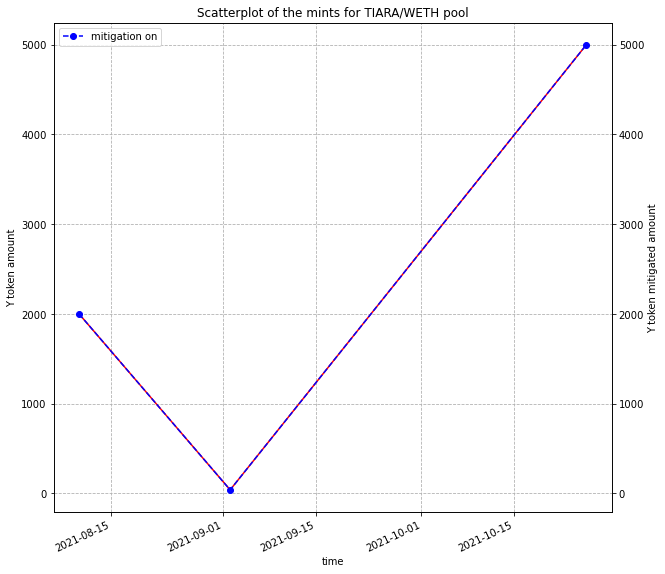

In [78]:
plot_mints(tiara_weth_mints_mitigation_on_df, tiara_weth_mints_mitigation_off_df, pool_name='TIARA/WETH')

In [79]:
tiara_weth_filtered_swaps_df, tiara_weth_mevs_df = tiara_weth_sim.extract_filtered_and_mevs_dfs()
tiara_weth_suspicious_filtered_swaps_df, tiara_weth_possible_mevs_df = tiara_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 178, filtered len = 156
txds = 22
out values = 11
initial len = 178, filtered len = 154
txds = 24
out values = 12.0


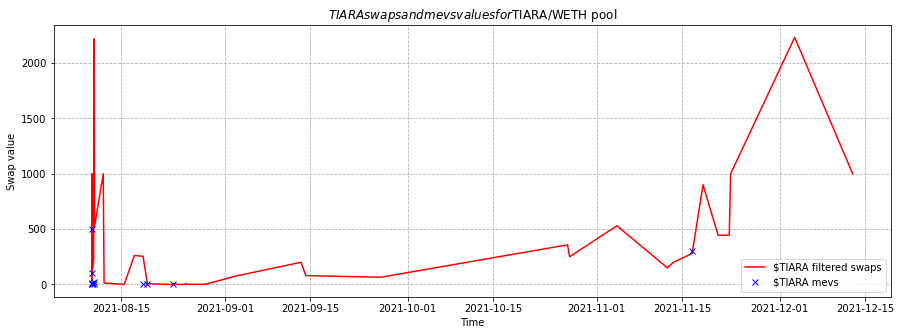

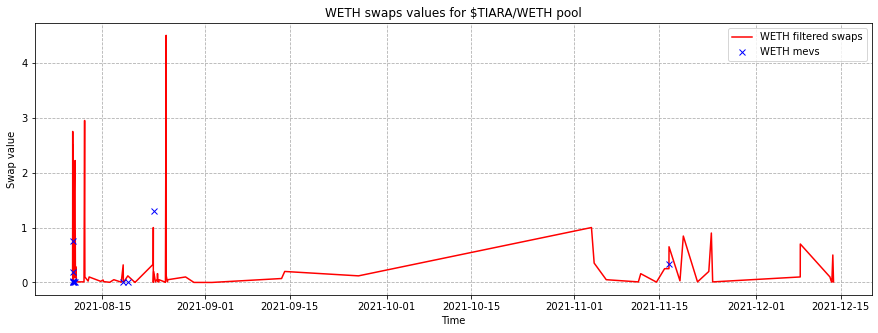

In [80]:
tiara_weth_sim.show_swaps_and_mevs_by_token(tiara_weth_filtered_swaps_df, tiara_weth_mevs_df, width=15, height=5)

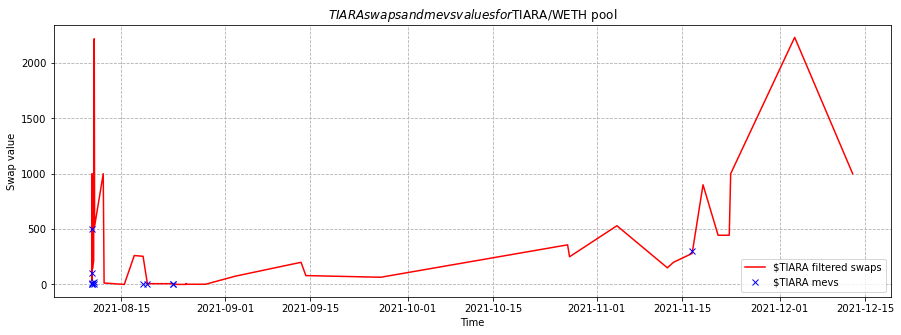

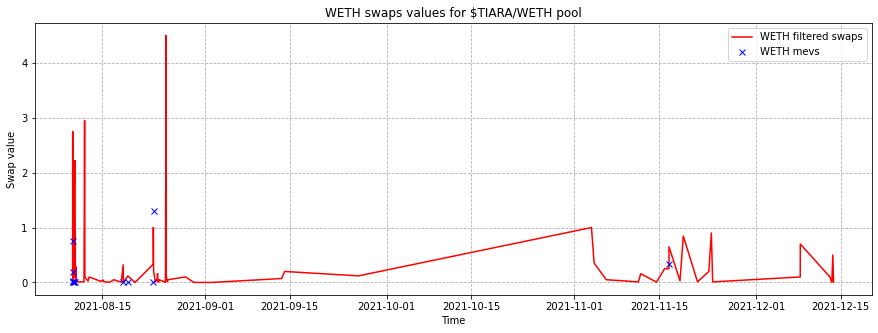

In [81]:
tiara_weth_sim.show_swaps_and_mevs_by_token(tiara_weth_suspicious_filtered_swaps_df, tiara_weth_possible_mevs_df, width=15, height=5)

In [82]:
tiara_weth_filtered_swaps_df

token_in token_out   amount_in  amount_out   amount_usd  \
0       WETH    $TIARA    0.150000  139.145403   467.867088   
1     $TIARA      WETH  139.984047    0.150000   467.865376   
2     $TIARA      WETH  139.145403    0.129679   404.454167   
3       WETH    $TIARA    1.626809  983.947909  5065.407271   
7       WETH    $TIARA    2.750000  505.595708  8562.696214   
..       ...       ...         ...         ...          ...   
173     WETH    $TIARA    0.100000  184.654628   401.773435   
174     WETH    $TIARA    0.028952   51.557341   115.800626   
175     WETH    $TIARA    0.005000    8.820658    20.005172   
176     WETH    $TIARA    0.500000  774.351894  1895.099683   
177     WETH    $TIARA    0.010000   13.576843    37.678652   

              timestamp                                      sender  \
0   2021-08-10 03:42:19  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
1   2021-08-10 03:53:53  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
2   2021-08-10 03:58:16  0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
3   2021-08-10 04:04:08  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
7   2021-08-10 04:05:12  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
..                  ...                                         ...   
173 2021-12-13 05:13:27  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
174 2021-12-13 09:43:30  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
175 2021-12-13 12:44:43  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
176 2021-12-13 16:38:11  0xdef1c0ded9bec7f1a1670819833240f027b25eff   
177 2021-12-13 19:25:04  0xdef1c0ded9bec7f1a1670819833240f027b25eff   

                                             to  \
0    0x7c25bb0ac944691322849419df917c0acc1d379b   
1    0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
2    0xd9e1ce17f2641f24ae83637ab66a2cca9c378b9f   
3    0xb375d3ee45c7289e1cbc8778eb3a6ba947d9fda3   
7    0xb375d3ee45c7289e1cbc8778eb3a6ba947d9fda3   
..                                          ...   
173  0x0000000000488b7147b38452e686b41c4fa8bedc   
174  0x6e0f19c2d538c2123b73b710c0bef48bd05bb040   
175  0x2afed66c9dd77a8371820e84f30e247a5aee7f06   
176  0x0000000000488b7147b38452e686b41c4fa8bedc   
177  0x0000000000488b7147b38452e686b41c4fa8bedc   

                                                   txd  
0    0x56fee8054d29044f5dd15d5b01549312efa423685685...  
1    0x8ad8c1aa0c95c2161c4a7bd8cb31a7e1a0dbf611aff8...  
2    0xc62a4f438b1ec4eaba4cd942397222456e0fe49103c0...  
3    0x0e680f5e01754e528d73434ca2aa8c5aa24bcd38e901...  
7    0xa3e099ff023a13c9d1553ee4e261143fabd3a0354b02...  
..                                                 ...  
173  0x65b1b0ffab75f42a563ddd4197705825bbeb06b1d1b2...  
174  0x08408b401c8df1277c541abd5bb32f69e2e32584f130...  
175  0xd65657cf949bbaa92f9dd8c2d788f33e589c14aa860f...  
176  0x2c40ad5738fa40e7bcb3fef2ab183f03307ca8d58269...  
177  0xc3d8c7a2cab5d2ae8ca22c43f031f745079baaf55c9c...  

[156 rows x 9 columns]

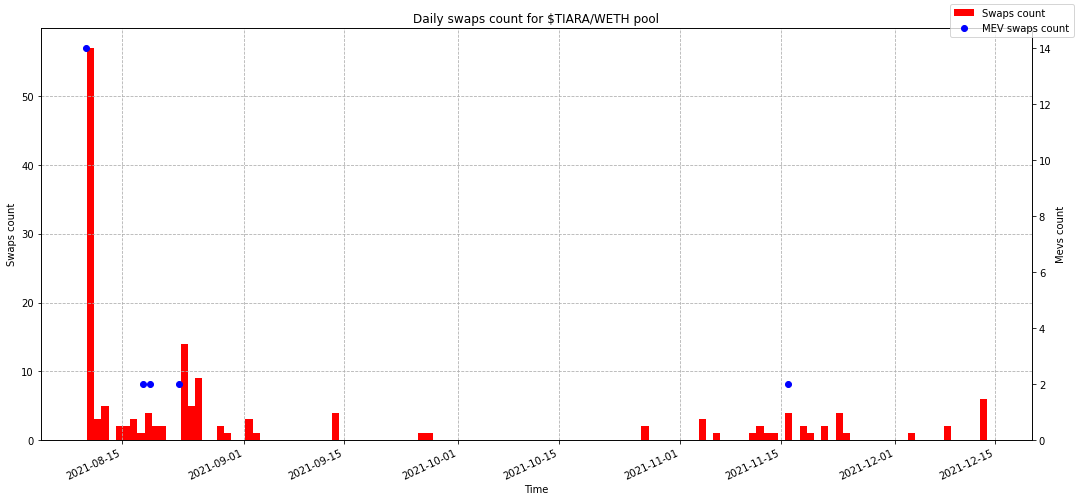

In [83]:
tiara_weth_sim.show_swaps_and_mevs_daily_count_by_token(tiara_weth_filtered_swaps_df, tiara_weth_mevs_df, mevs_alter_axis=True)

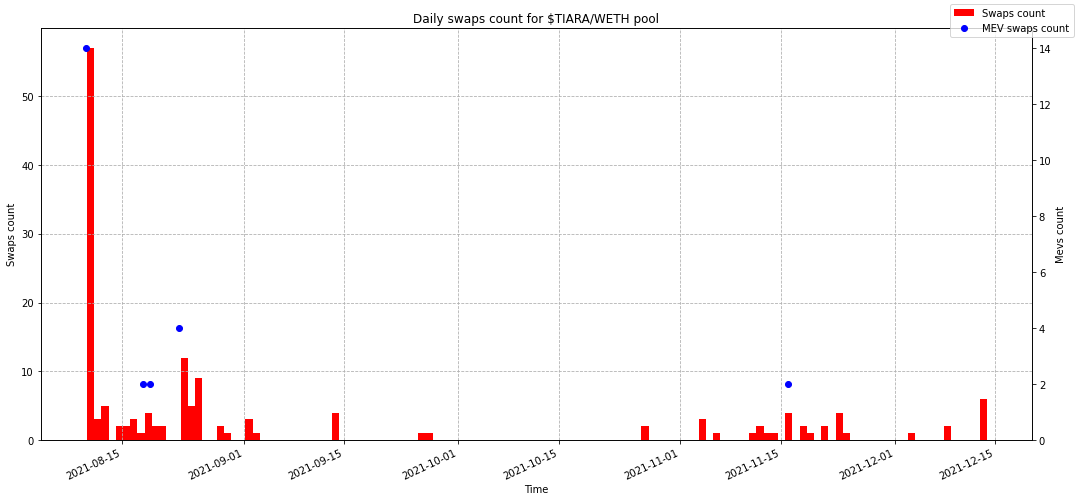

In [84]:
tiara_weth_sim.show_swaps_and_mevs_daily_count_by_token(tiara_weth_suspicious_filtered_swaps_df, tiara_weth_possible_mevs_df, mevs_alter_axis=True)

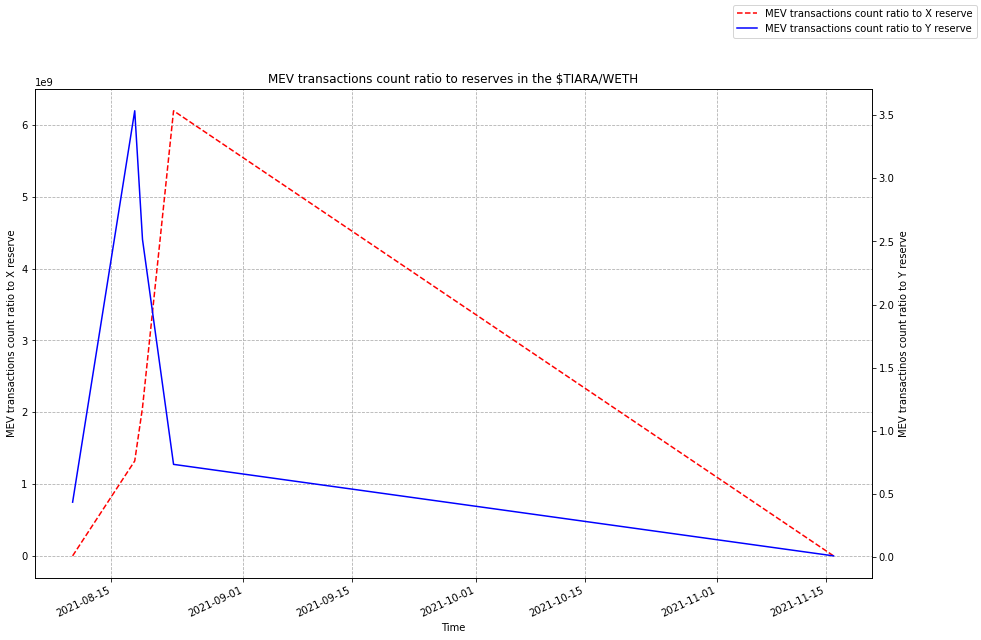

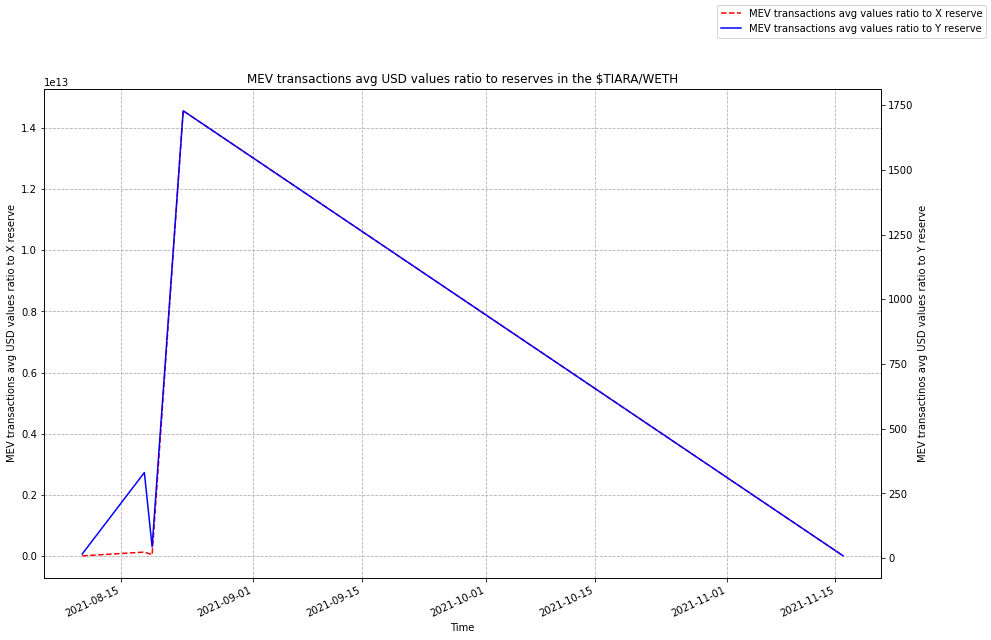

In [85]:
tiara_weth_sim.show_mevs_to_reserves_ratio(tiara_weth_swaps_mitigation_off_df, tiara_weth_mevs_df, width=15, height=10)
tiara_weth_sim.show_mevs_values_to_reserves_ratio(tiara_weth_swaps_mitigation_off_df, tiara_weth_mevs_df, width=15, height=10)

In [86]:
tiara_weth_swaps_mitigation_on_df[tiara_weth_swaps_mitigation_on_df.status == 'BLOCKED_BY_VOLATILITY_MITIGATION']

id token_in token_out  token_in_amount  token_out_amount_min  \
1      2   $TIARA      WETH       139.984047                   0.0   
2      3   $TIARA      WETH       139.145403                   0.0   
5      6   $TIARA      WETH        13.938633                   0.0   
6      7   $TIARA      WETH         7.097912                   0.0   
9     10   $TIARA      WETH       100.000000                   0.0   
11    12   $TIARA      WETH       100.000000                   0.0   
12    13   $TIARA      WETH       100.000000                   0.0   
13    14   $TIARA      WETH       100.000000                   0.0   
14    15   $TIARA      WETH       100.000000                   0.0   
15    16   $TIARA      WETH       100.000000                   0.0   
16    17   $TIARA      WETH       100.000000                   0.0   
17    18   $TIARA      WETH       100.000000                   0.0   
18    19   $TIARA      WETH       100.000000                   0.0   
19    20   $TIARA      WETH       107.519003                   0.0   
22    23   $TIARA      WETH       100.000000                   0.0   
23    24   $TIARA      WETH       100.000000                   0.0   
24    25   $TIARA      WETH       200.000000                   0.0   
25    26   $TIARA      WETH       250.000000                   0.0   
27    28   $TIARA      WETH       500.000000                   0.0   
28    29   $TIARA      WETH       503.248072                   0.0   
31    32   $TIARA      WETH       300.000000                   0.0   
34    35   $TIARA      WETH        31.978571                   0.0   
35    36   $TIARA      WETH       100.000000                   0.0   
36    37   $TIARA      WETH       100.000000                   0.0   
37    38   $TIARA      WETH       100.000000                   0.0   
38    39   $TIARA      WETH       200.000000                   0.0   
39    40   $TIARA      WETH       200.000000                   0.0   
40    41   $TIARA      WETH       200.000000                   0.0   
41    42   $TIARA      WETH       225.182046                   0.0   
43    44   $TIARA      WETH         7.838707                   0.0   
47    48   $TIARA      WETH       200.000000                   0.0   
49    50   $TIARA      WETH       200.000000                   0.0   
50    51   $TIARA      WETH       200.000000                   0.0   
51    52   $TIARA      WETH       193.512838                   0.0   
55    56   $TIARA      WETH       143.179540                   0.0   
56    57   $TIARA      WETH         7.939504                   0.0   
59    60   $TIARA      WETH       214.850163                   0.0   
63    64   $TIARA      WETH        23.793047                   0.0   
74    76     WETH    $TIARA         0.100000                   0.0   
76    78     WETH    $TIARA         0.025000                   0.0   
77    79     WETH    $TIARA         0.100000                   0.0   
135  138   $TIARA      WETH        75.000000                   0.0   
141  144   $TIARA      WETH        65.000000                   0.0   
143  147   $TIARA      WETH       250.000000                   0.0   
146  150   $TIARA      WETH       530.000000                   0.0   
150  154   $TIARA      WETH       150.000000                   0.0   
151  155   $TIARA      WETH       200.000000                   0.0   
155  159   $TIARA      WETH       280.000000                   0.0   
156  160   $TIARA      WETH       299.939739                   0.0   
159  163   $TIARA      WETH       900.000000                   0.0   
162  166   $TIARA      WETH       444.000000                   0.0   
164  168   $TIARA      WETH       444.800000                   0.0   
165  169   $TIARA      WETH      1000.000000                   0.0   

     token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
1        1.971697e+03         NaN                CHECKED      140004.898352   
2        1.971528e+03         NaN                CHECKED      13916

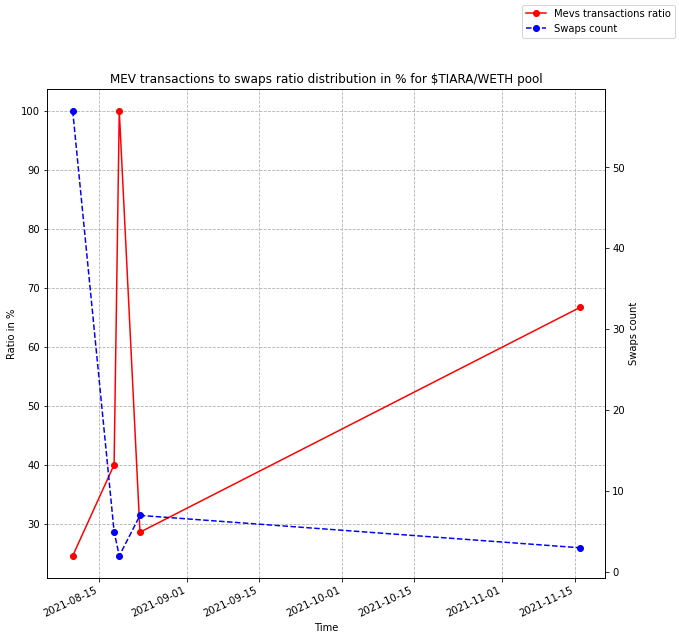

In [87]:
tiara_weth_sim.show_mevs_to_swaps_ratio(tiara_weth_filtered_swaps_df, tiara_weth_mevs_df)

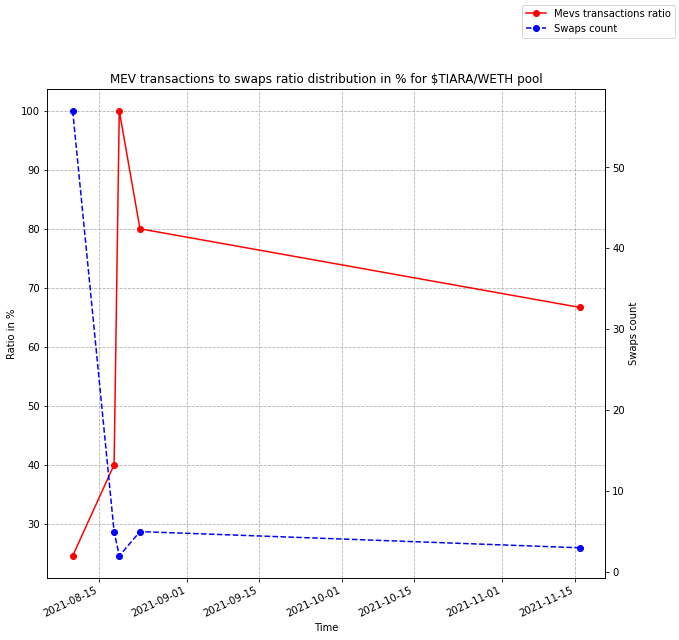

In [88]:
tiara_weth_sim.show_mevs_to_swaps_ratio(tiara_weth_suspicious_filtered_swaps_df, tiara_weth_possible_mevs_df)

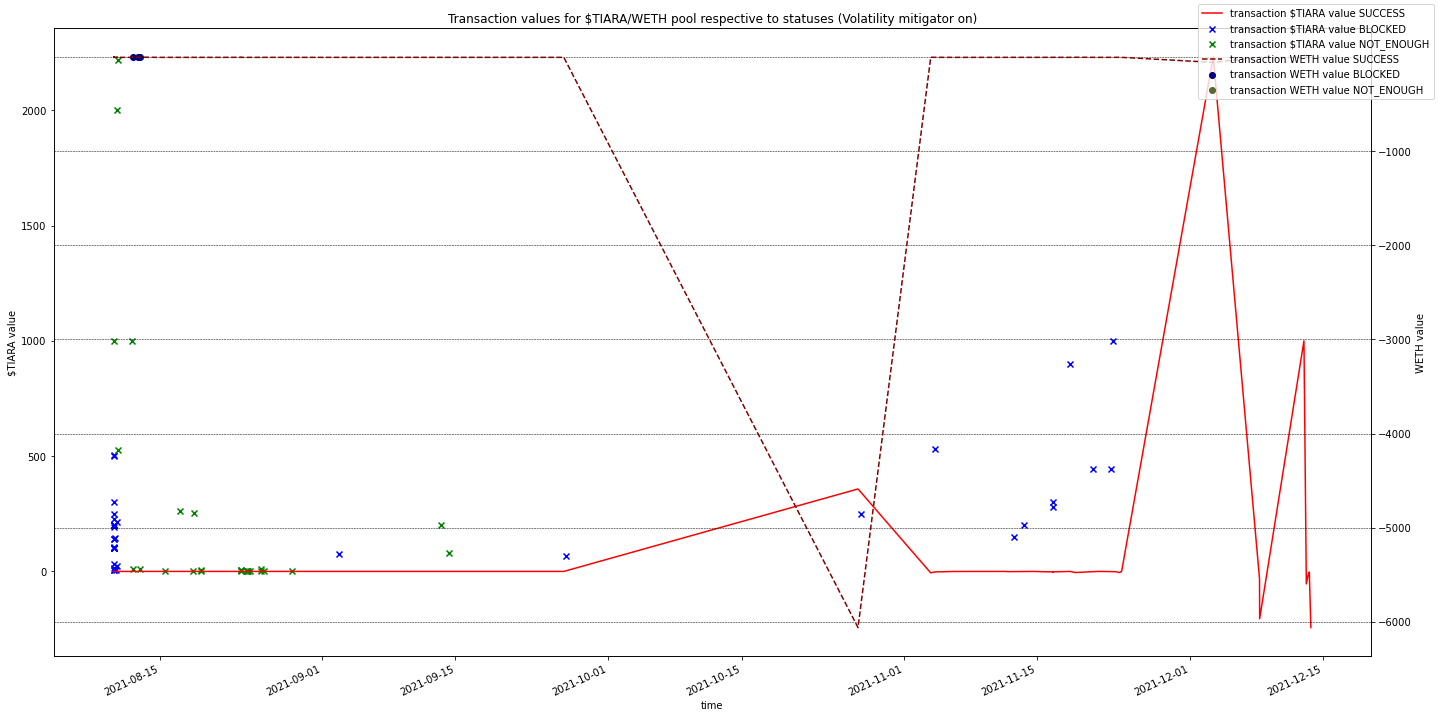

In [89]:
tiara_weth_sim.plot_transactions_by_type(tiara_weth_swaps_mitigation_on_df, ignore_success=False, width=20, height=10)

In [90]:
tiara_weth_mints_mitigation_on_df

id  X_amount     Y_amount   timestamp   status  block_number  \
0    0  2.000000  2000.000000  1628566513  SUCCESS             0   
1  134  0.300000    39.088231  1630543432  SUCCESS        131795   
2  145  4.387672  5000.000000  1635203952  SUCCESS        442496   

   block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0       1628566513             1628566513               0      0.000000e+00   
1       1630543438             1630543432             134      9.919830e-13   
2       1635203953             1635203952             145      2.998961e-01   

   reserve_Y_before      k_before price_X_cumulative_before  \
0          0.000000  0.000000e+00                         0   
1       1079.949055  1.071291e-09    1679903614855631347374   
2       1119.427492  3.357119e+02    1679903614864456023339   

   price_Y_cumulative_before  is_volatility_mitigator_on_before  reserve_X  \
0                          0                               True   2.000000   
1                        167                               True   0.300000   
2                        801                               True   4.687568   

     reserve_Y             k      price_X_cumulative  price_Y_cumulative  \
0  2000.000000   4000.000000                       0                   0   
1  1119.037286    335.711186  1679903614855631347374                 167   
2  6119.427492  28685.232399  1679903614864456023339                 801   

   is_volatility_mitigator_on  
0                        True  
1                        True  
2                        True

In [91]:
tiara_weth_burns_mitigation_on_df

id  X_amount    Y_amount   timestamp   status  block_number  \
0  75  1.978661  950.479833  1628741492  CLIPPED         11666   

   block_timestamp  transaction_timestamp  transaction_id  reserve_X_before  \
0       1628741503             1628741492              75          1.978661   

   reserve_Y_before     k_before price_X_cumulative_before  \
0       2021.700238  4000.259926                 173906039   

   price_Y_cumulative_before  is_volatility_mitigator_on_before     reserve_X  \
0                        167                               True  1.000000e-12   

     reserve_Y             k price_X_cumulative  price_Y_cumulative  \
0  1071.220405  1.071220e-09          173906039                 167   

   is_volatility_mitigator_on  
0                        True

In [92]:
print(f"max X reserve {tiara_weth_swaps_mitigation_on_df.reserve_X.max()}")
print(f"min X reserve {tiara_weth_swaps_mitigation_on_df.reserve_X.min()}")
print(f"max Y reserve {tiara_weth_swaps_mitigation_on_df.reserve_Y.max()}")
print(f"min Y reserve {tiara_weth_swaps_mitigation_on_df.reserve_Y.min()}")
print(f"initial reserves for X {tiara_weth_swaps_mitigation_on_df.loc[0].reserve_X_before} and for Y {tiara_weth_swaps_mitigation_on_df.loc[0].reserve_Y_before}")

max X reserve 3326.0097953745067
min X reserve 9.91983e-13
max Y reserve 2021.700238381267
min Y reserve 5.983525628635689
initial reserves for X 2.0 and for Y 2000.0


In [93]:
tiara_weth_swaps_mitigation_on_df[tiara_weth_swaps_mitigation_on_df.token_in == '$TIARA']

id token_in token_out  token_in_amount  token_out_amount_min  \
1      2   $TIARA      WETH       139.984047                   0.0   
2      3   $TIARA      WETH       139.145403                   0.0   
5      6   $TIARA      WETH        13.938633                   0.0   
6      7   $TIARA      WETH         7.097912                   0.0   
9     10   $TIARA      WETH       100.000000                   0.0   
..   ...      ...       ...              ...                   ...   
162  166   $TIARA      WETH       444.000000                   0.0   
164  168   $TIARA      WETH       444.800000                   0.0   
165  169   $TIARA      WETH      1000.000000                   0.0   
169  173   $TIARA      WETH      2231.227912                   0.0   
172  176   $TIARA      WETH      1000.000000                   0.0   

     token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
1         1971.696659         NaN                CHECKED      140004.898352   
2         1971.527625         NaN                CHECKED      139166.129006   
5         1748.575596         NaN                CHECKED       13940.708742   
6         1558.574276         NaN                CHECKED        7099.476956   
9         1964.936082         NaN                CHECKED      100068.568906   
..                ...         ...                    ...                ...   
162         33.727694         NaN                CHECKED          78.281175   
164         33.762178         NaN                CHECKED          78.441945   
165         44.503421         NaN                CHECKED         176.367592   
169         52.872766    0.211491    CANT_CONSULT_ORACLE                NaN   
172          2.551061    0.010204    CANT_CONSULT_ORACLE                NaN   

     out_amount_diff  slice_factor  slice_factor_curve  \
1              194.0         100.0                98.0   
2              194.0         100.0                98.0   
5              155.0         100.0                98.0   
6              127.0         100.0                98.0   
9              192.0         100.0                98.0   
..               ...           ...                 ...   
162             79.0         100.0                98.0   
164             79.0         100.0                98.0   
165            119.0         100.0                98.0   
169              NaN           NaN                 NaN   
172              NaN           NaN                 NaN   

                               status  block_number     block_timestamp  \
1    BLOCKED_BY_VOLATILITY_MITIGATION          75.0 2021-08-10 03:53:58   
2    BLOCKED_BY_VOLATILITY_MITIGATION          93.0 2021-08-10 03:58:28   
5    BLOCKED_BY_VOLATILITY_MITIGATION         116.0 2021-08-10 04:04:13   
6    BLOCKED_BY_VOLATILITY_MITIGATION         120.0 2021-08-10 04:05:13   
9    BLOCKED_BY_VOLATILITY_MITIGATION         131.0 2021-08-10 04:07:58   
..                                ...           ...                 ...   
162  BLOCKED_BY_VOLATILITY_MITIGATION      591856.0 2021-11-20 21:39:13   
164  BLOCKED_BY_VOLATILITY_MITIGATION      602376.0 2021-11-22 17:29:13   
165  BLOCKED_BY_VOLATILITY_MITIGATION      603720.0 2021-11-22 23:05:13   
169                           SUCCESS      664186.0 2021-12-03 11:01:43   
172                           SUCCESS      718961.0 2021-12-12 23:15:28   

    transaction_timestamp                                                txd  \
1     2021-08-10 03:53:53  0x8ad8c1aa0c95c2161c4a7bd8cb31a7e1a0dbf611aff8...   
2     2021-08-10 03:58:16  0xc62a4f438b1ec4eaba4cd942397222456e0fe49103c0...   
5     2021-08-10 04:04:08  0xca9370cbfda2d7cd74c62eed2545bdf4917e8c789d2a...   
6     2021-08-10 04:05:12  0x75b2df96180509439595d2eb032fe84f44921b0738dc...   
9     2021-08-10 04:07:52  0xd39489198f1d9f0a754b6ffc4476a3c52b928aae4ba9...   
..                    ...                                                ...   
162   2021-11-20 21:39:01  0xbb68d48867b4348e577e63a36b471

Original $TIARA/WETH pool has next statuses counts:
SUCCESS                157
NOT_ENOUGH_RESERVES     20
Name: status, dtype: int64
Mitigated $TIARA/WETH dataframe has next statuses counts:
SUCCESS                             97
BLOCKED_BY_VOLATILITY_MITIGATION    53
NOT_ENOUGH_RESERVES                 27
Name: status, dtype: int64
TWAP unavailability ratio for $TIARA/WETH is 0.06779661016949153
Mitigated $TIARA/WETH dataframe has next Mitigator statuses:
CHECKED                138
NOT_REACHED             27
CANT_CONSULT_ORACLE     12
Name: mitigator_check_status, dtype: int64


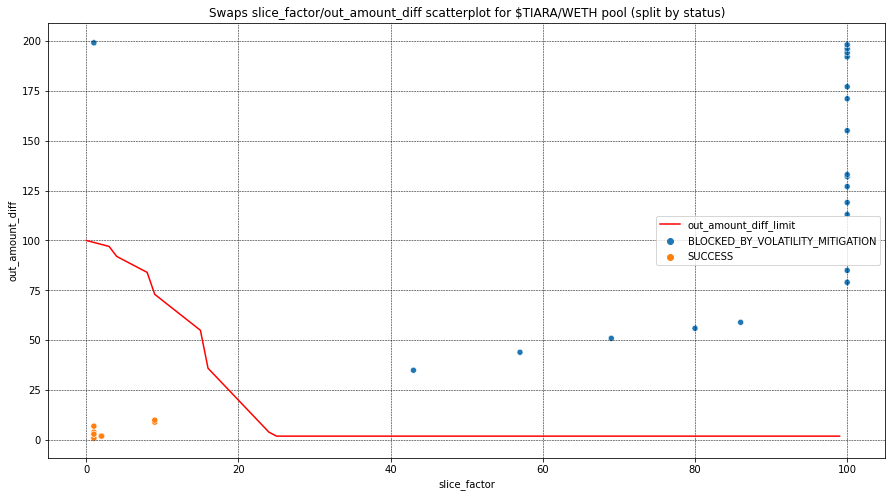

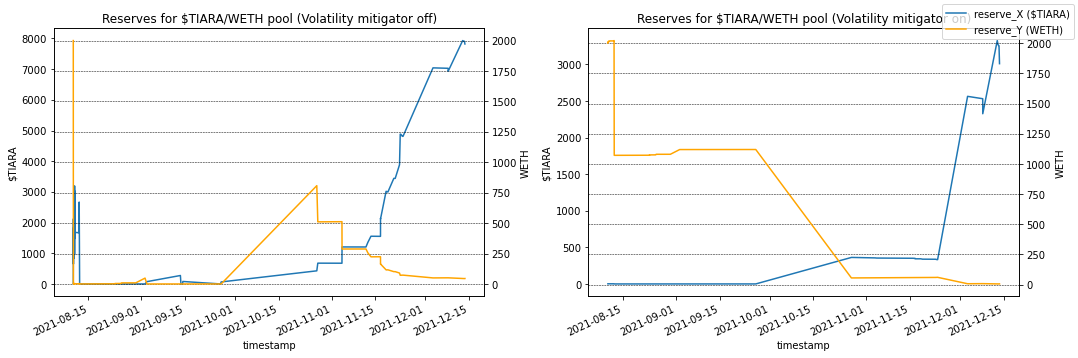

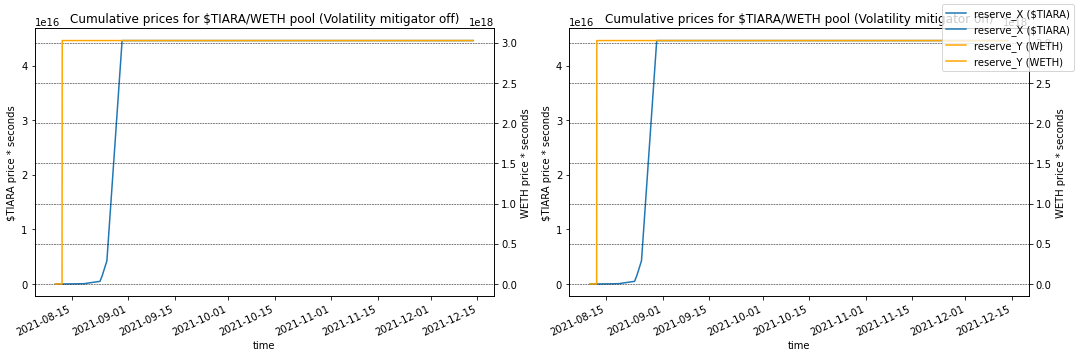

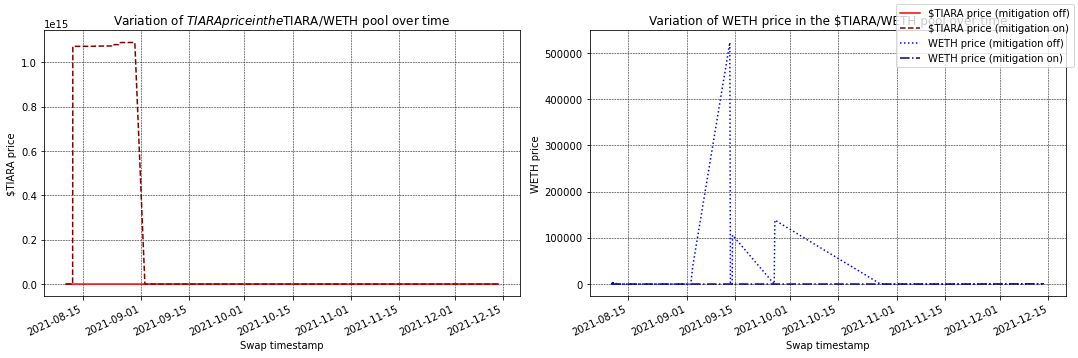

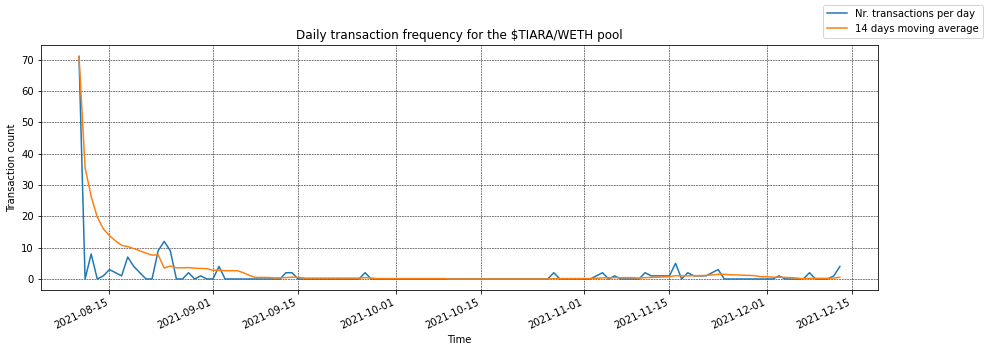

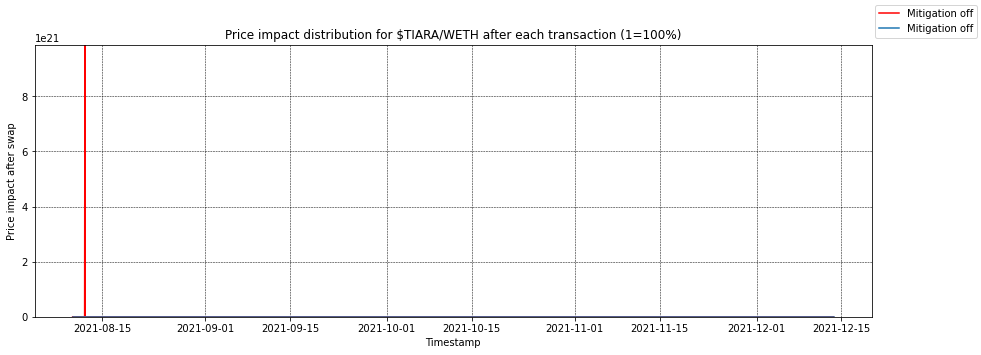

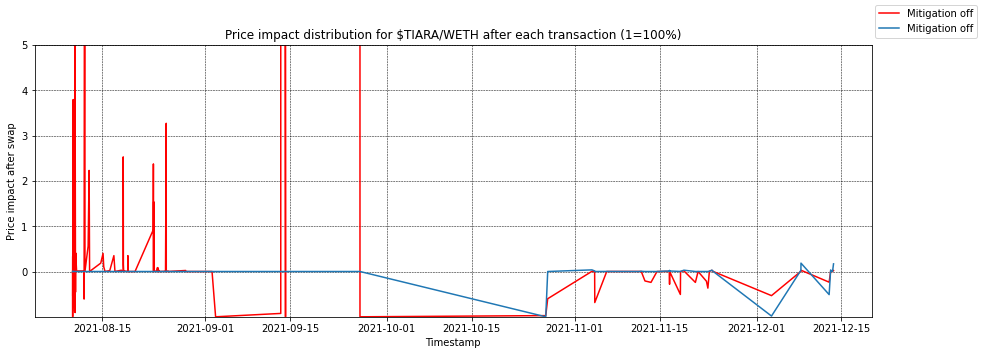

In [94]:
tiara_weth_sim.show_mitigation_comparison(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.px_hist_blocked_transactions_slice(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.px_hist_blocked_transactions_difference_from_oracle(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_slice_distribution_and_diff_limit_line(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_reserves_with_and_without_mitigation(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_cumulative_prices_with_and_without_mitigation(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_off_df, make_big_num_convert=True)
tiara_weth_sim.plot_price_distribution(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df, separate_plots=True)
tiara_weth_sim.plot_frequency_distribution(tiara_weth_swaps_mitigation_on_df)
tiara_weth_sim.plot_price_impact(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df, # original max value is extremely big 
                                smallest_y=tiara_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=tiara_weth_swaps_mitigation_off_df['price_diff'].max())

tiara_weth_sim.plot_price_impact(tiara_weth_swaps_mitigation_off_df, tiara_weth_swaps_mitigation_on_df,
                                smallest_y=tiara_weth_swaps_mitigation_off_df['price_diff'].min(), 
                                biggest_y=5)

In [95]:
tiara_weth_blocked_df = tiara_weth_swaps_mitigation_on_df[tiara_weth_swaps_mitigation_on_df['status'] == 'BLOCKED_BY_VOLATILITY_MITIGATION']
tiara_weth_blocked_mevs_df = pd.merge(tiara_weth_blocked_df, tiara_weth_mevs_df, on='txd')
print(f"there are {len(tiara_weth_mevs_df)} MEV transactions and {len(tiara_weth_blocked_mevs_df)} were blocked out of them")
tiara_weth_blocked_mevs_df

there are 22 MEV transactions and 8 were blocked out of them


id token_in_x token_out_x  token_in_amount  token_out_amount_min  \
0    6     $TIARA        WETH        13.938633                   0.0   
1    7     $TIARA        WETH         7.097912                   0.0   
2   20     $TIARA        WETH       107.519003                   0.0   
3   29     $TIARA        WETH       503.248072                   0.0   
4   44     $TIARA        WETH         7.838707                   0.0   
5   57     $TIARA        WETH         7.939504                   0.0   
6   64     $TIARA        WETH        23.793047                   0.0   
7  160     $TIARA        WETH       299.939739                   0.0   

   token_out_amount  system_fee mitigator_check_status  oracle_amount_out  \
0       1748.575596         NaN                CHECKED       13940.708742   
1       1558.574276         NaN                CHECKED        7099.476956   
2       1967.756719         NaN                CHECKED      107722.437911   
3       1998.139150         NaN                CHECKED      504665.216634   
4       1601.438433         NaN                CHECKED        7880.544767   
5       1606.884775         NaN                CHECKED        8030.446783   
6       1860.692116         NaN                CHECKED       24088.850929   
7         26.585438         NaN                CHECKED          49.253794   

   out_amount_diff  slice_factor  slice_factor_curve  \
0            155.0         100.0                98.0   
1            127.0         100.0                98.0   
2            192.0         100.0                98.0   
3            198.0         100.0                98.0   
4            132.0         100.0                98.0   
5            133.0         100.0                98.0   
6            171.0         100.0                98.0   
7             59.0          86.0                98.0   

                             status  block_number     block_timestamp  \
0  BLOCKED_BY_VOLATILITY_MITIGATION         116.0 2021-08-10 04:04:13   
1  BLOCKED_BY_VOLATILITY_MITIGATION         120.0 2021-08-10 04:05:13   
2  BLOCKED_BY_VOLATILITY_MITIGATION         176.0 2021-08-10 04:19:13   
3  BLOCKED_BY_VOLATILITY_MITIGATION         224.0 2021-08-10 04:31:13   
4  BLOCKED_BY_VOLATILITY_MITIGATION         386.0 2021-08-10 05:11:43   
5  BLOCKED_BY_VOLATILITY_MITIGATION        1755.0 2021-08-10 10:53:58   
6  BLOCKED_BY_VOLATILITY_MITIGATION        2383.0 2021-08-10 13:30:58   
7  BLOCKED_BY_VOLATILITY_MITIGATION      567314.0 2021-11-16 15:23:43   

  transaction_timestamp                                                txd  \
0   2021-08-10 04:04:08  0xca9370cbfda2d7cd74c62eed2545bdf4917e8c789d2a...   
1   2021-08-10 04:05:12  0x75b2df96180509439595d2eb032fe84f44921b0738dc...   
2   2021-08-10 04:19:04  0xe1abb2bfad37bebbbf5df24f7d9ef74723c4a41bb204...   
3   2021-08-10 04:31:11  0x0264ee2c3652fec9ddd40ffaf550a31d266317bfb5d8...   
4   2021-08-10 05:11:34  0x8ac177bcfcdb578493a272f3feb898b2f6693bcf9e23...   
5   2021-08-10 10:53:57  0xfa0460b32e032386039440efde20fbf6098c241828c2...   
6   2021-08-10 13:30:45  0x5e40d08ea9199fe1253278c24bc0bf914fefc5a210f2...   
7   2021-11-16 15:23:43  0x880a37cea26aa107a7864c79036bcbe417e131de16ee...   

                                     sender_x  \
0  0x00000000500e2fece27a7600435d0c48d64e0c00   
1  0x00000000003b3cc22af3ae1eac0440bcee416b40   
2  0x00000000500e2fece27a7600435d0c48d64e0c00   
3  0x00000000003b3cc22af3ae1eac0440bcee416b40   
4  0x00000000003b3cc22af3ae1eac0440bcee416b40   
5  0x00000000003b3cc22af3ae1eac0440bcee416b40   
6  0x00000000500e2fece27a7600435d0c48d64e0c00   
7  0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d   

                                         to_x  transaction_id  \
0  0x00000000500e2fece27a7600435d0c48d64e0c00               6   
1  0x00000000003b3cc22af3ae1eac0440bcee416b40               7   
2  0x00000000500e2fece27a7600435d0c48d64e0c00              20   
3  0x00000000003b3cc22af3ae1eac0440bcee416b40              29   
4  0x00000000003b3cc22af3ae1